# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

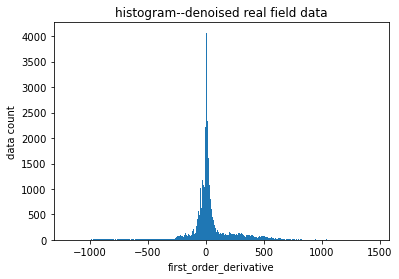

[(24833, 24872), (5698, 5833), (14471, 14575), (10149, 10224)]
47.913402758931625
-12.103679078019923
111.47517980463454
97.0315455031132


In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [11]:
# %store

Stored variables and their in-db values:
First_FOD                           -> [[32, 38, 39, 41, 55, 78, 143, 266, 287, 434, 508,
Max_FOD                             -> [[32, 38, 39, 43, 57, 79, 143, 275, 287, 434, 508,
breakPoints_grountTruth             -> [1, 32, 272, 384, 443, 526, 608, 722, 2252, 2473, 


In [2]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [3]:
# method="PatternRecogintion_AvgDerivative_FFOD"
method="PatternRecogintion_MFOD_FFOD"
method="PatternRecogintion_MFOD"
# method="AvgDerivative_PatternRecogintion_FFOD"
# method="PatternRecogintion_FFOD"

In [14]:
# %store -r buildup_PR
# %store -r drawdown_PR
# points=buildup_PR+drawdown_PR
# deltaDerivative_tuning=0.02
# # points=[index for index in range(len(pressure_measure))]
# point_halfWindow=15
# time_halfWindow=None
# # point_halfWindow=None
# # time_halfWindow=0.3
# detect_useDerivative=DerivativeMethod(pressure_df,colum_names)
# buildup_DRI, drawdown_DRI=detect_useDerivative.detect_breakpoints_deltaAvgFOD(points,
#                                                                     deltaDerivative_tuning,
#                                                                    point_halfWindow,
#                                                                    time_halfWindow)
# len(buildup_DRI),len(drawdown_DRI)

(2322, 955)

In [4]:
# time_halfWindow=None
# point_halfWindow=10
# polynomial_order=1
# tangent_type="single_point"
# # tangent_type="average"
# # deltaTangent_criterion=40
# deltaTangent_criterion=10
# # points=[index for index in range(len(pressure_measure))]
# %run detect_useDeltaTangent.ipynb

start to predict using tangent, the length of input points: 17888
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 3985 buildups and 1025 drawdowns 
===============output==================
'buildup_DT: 3985,drawdown_DT: 1025'


<Figure size 1440x720 with 0 Axes>

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
pattern learned: {'buildUp': {'left_top': array([-2.8204190e+02, -3.6527046e+02, -1.4062192e+02, -4.6410000e-02]), 'left_bottom': array([121.5484 , 261.44881, 161.1871 ,   2.63124]), 'right_top': array([-158.13055, -118.03974,  643.9731 ,    5.02701]), 'right_bottom': array([ 52.98722, -52.74598,  29.84924,  -3.26558])}, 'drawDown': {'left_top': array([-173.51

<Figure size 1440x720 with 0 Axes>

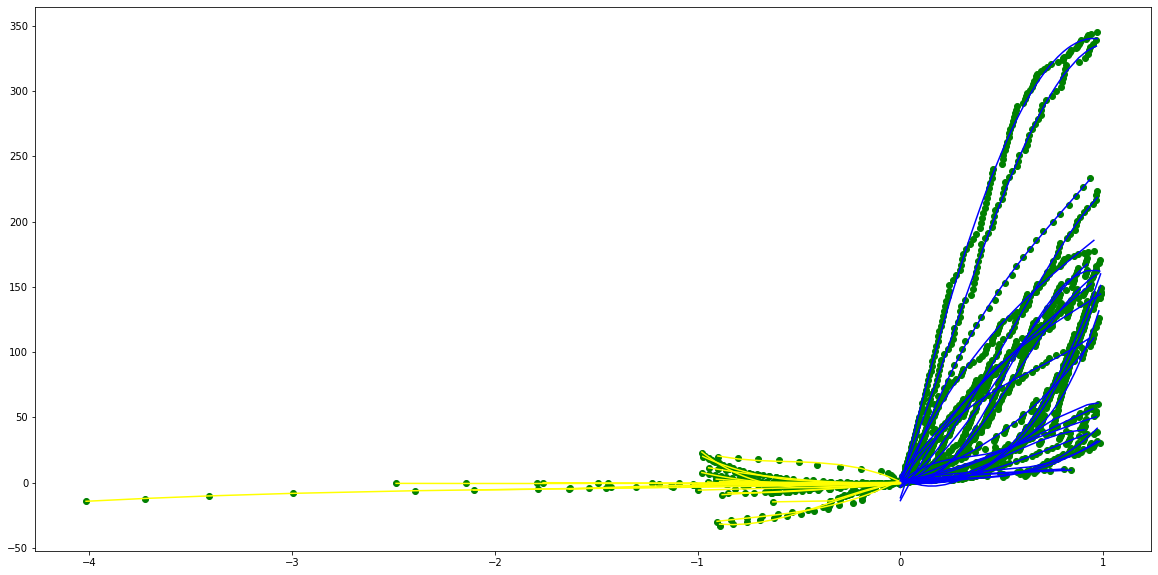

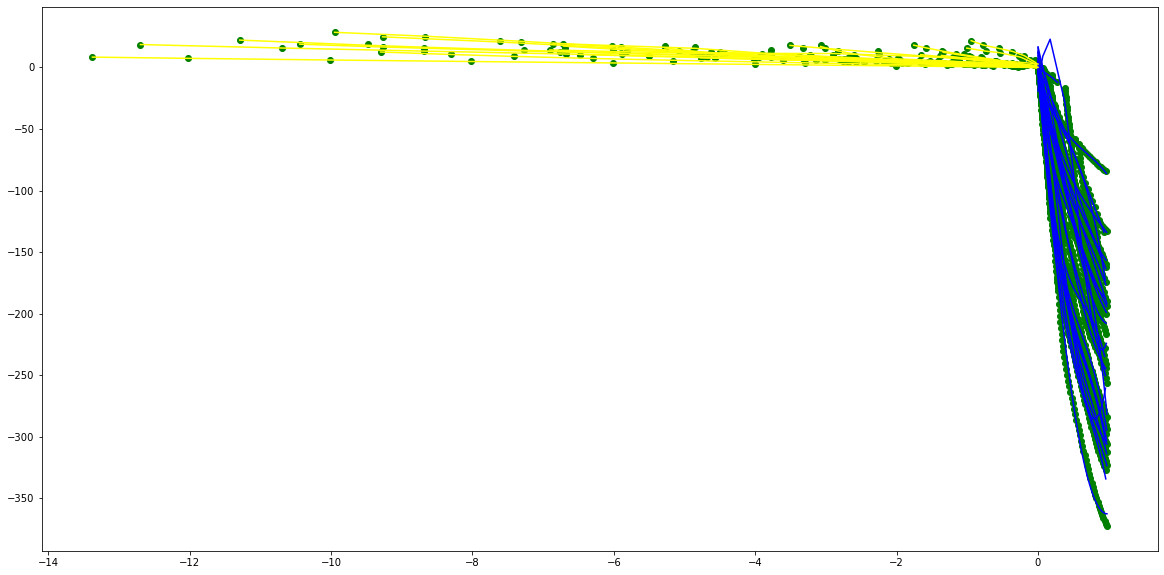

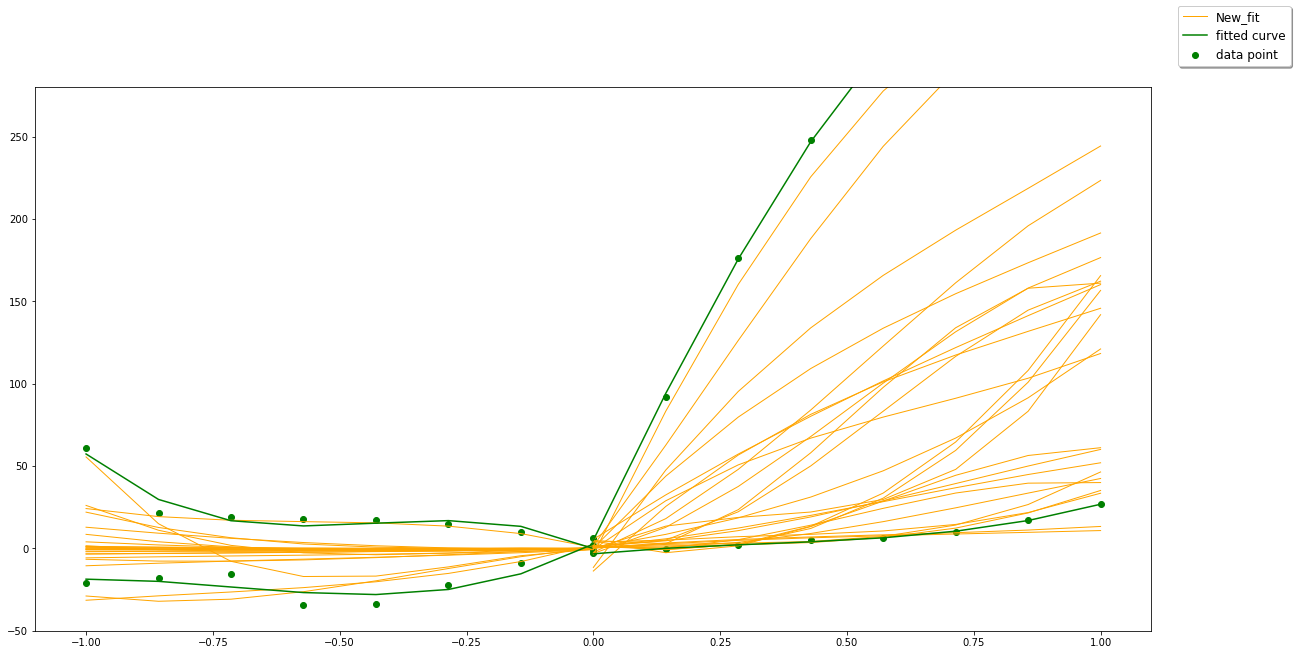

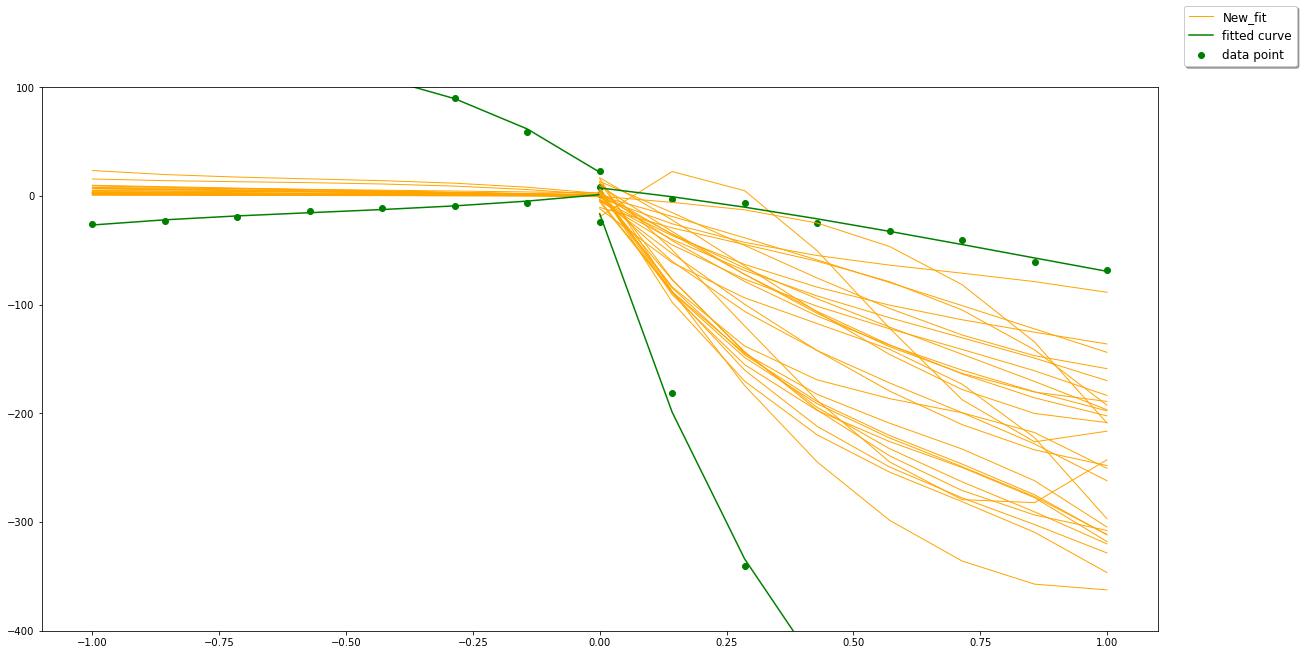

In [5]:
# points=buildup_DRI+drawdown_DRI
# points=buildup_DT+drawdown_DT
time_halfWindow_forLearn=1
point_halfWindow_forPredict=15
fitting_type="polynomial"
# points=[index for index in range(len(pressure_measure))]
%run detect_usePatternRecognition.ipynb

In [13]:
# %store buildup_PR
# %store drawdown_PR
# %store [buildup_PR,drawdown_PR] >points_PR.txt

Stored 'buildup_PR' (list)
Stored 'drawdown_PR' (list)
Writing '[buildup_PR,drawdown_PR]' (list) to file 'points_PR.txt'.


In [23]:
# points=[buildup_DRI,drawdown_DRI]
%store -r buildup_PR
%store -r drawdown_PR
points=[buildup_PR,drawdown_PR]
time_step=0.3
%run detect_FirstFOD.ipynb
# %run detect_MaxFOD.ipynb

'len(buildUp_df): 4173,len(buildUp_first_FOD): 815'
'len(drawDown_df): 2713,len(drawDown_first_FOD): 259'
===============output==================
First_FOD


# spilit periods and find multi-rate break points

In [27]:
points_buildUp=First_FOD[0]
points_drawDown=First_FOD[1]
minor_threshold_shutIn=0.027
# minor_threshold_shutIn=0
minor_threshold_Flowing=0.02
# points_buildUp=Max_FOD[0]
# points_drawDown=Max_FOD[1]
%run store_transients.ipynb

====detected_shutIns 38
====filtered_shutIns 30
====len(flowingPeriods) 31
====finally detect buildUp:171,drawDown:30


# plot flowing & shut-in periods

'buildup:30, drawdown:30'
---initializing...
---plotting...


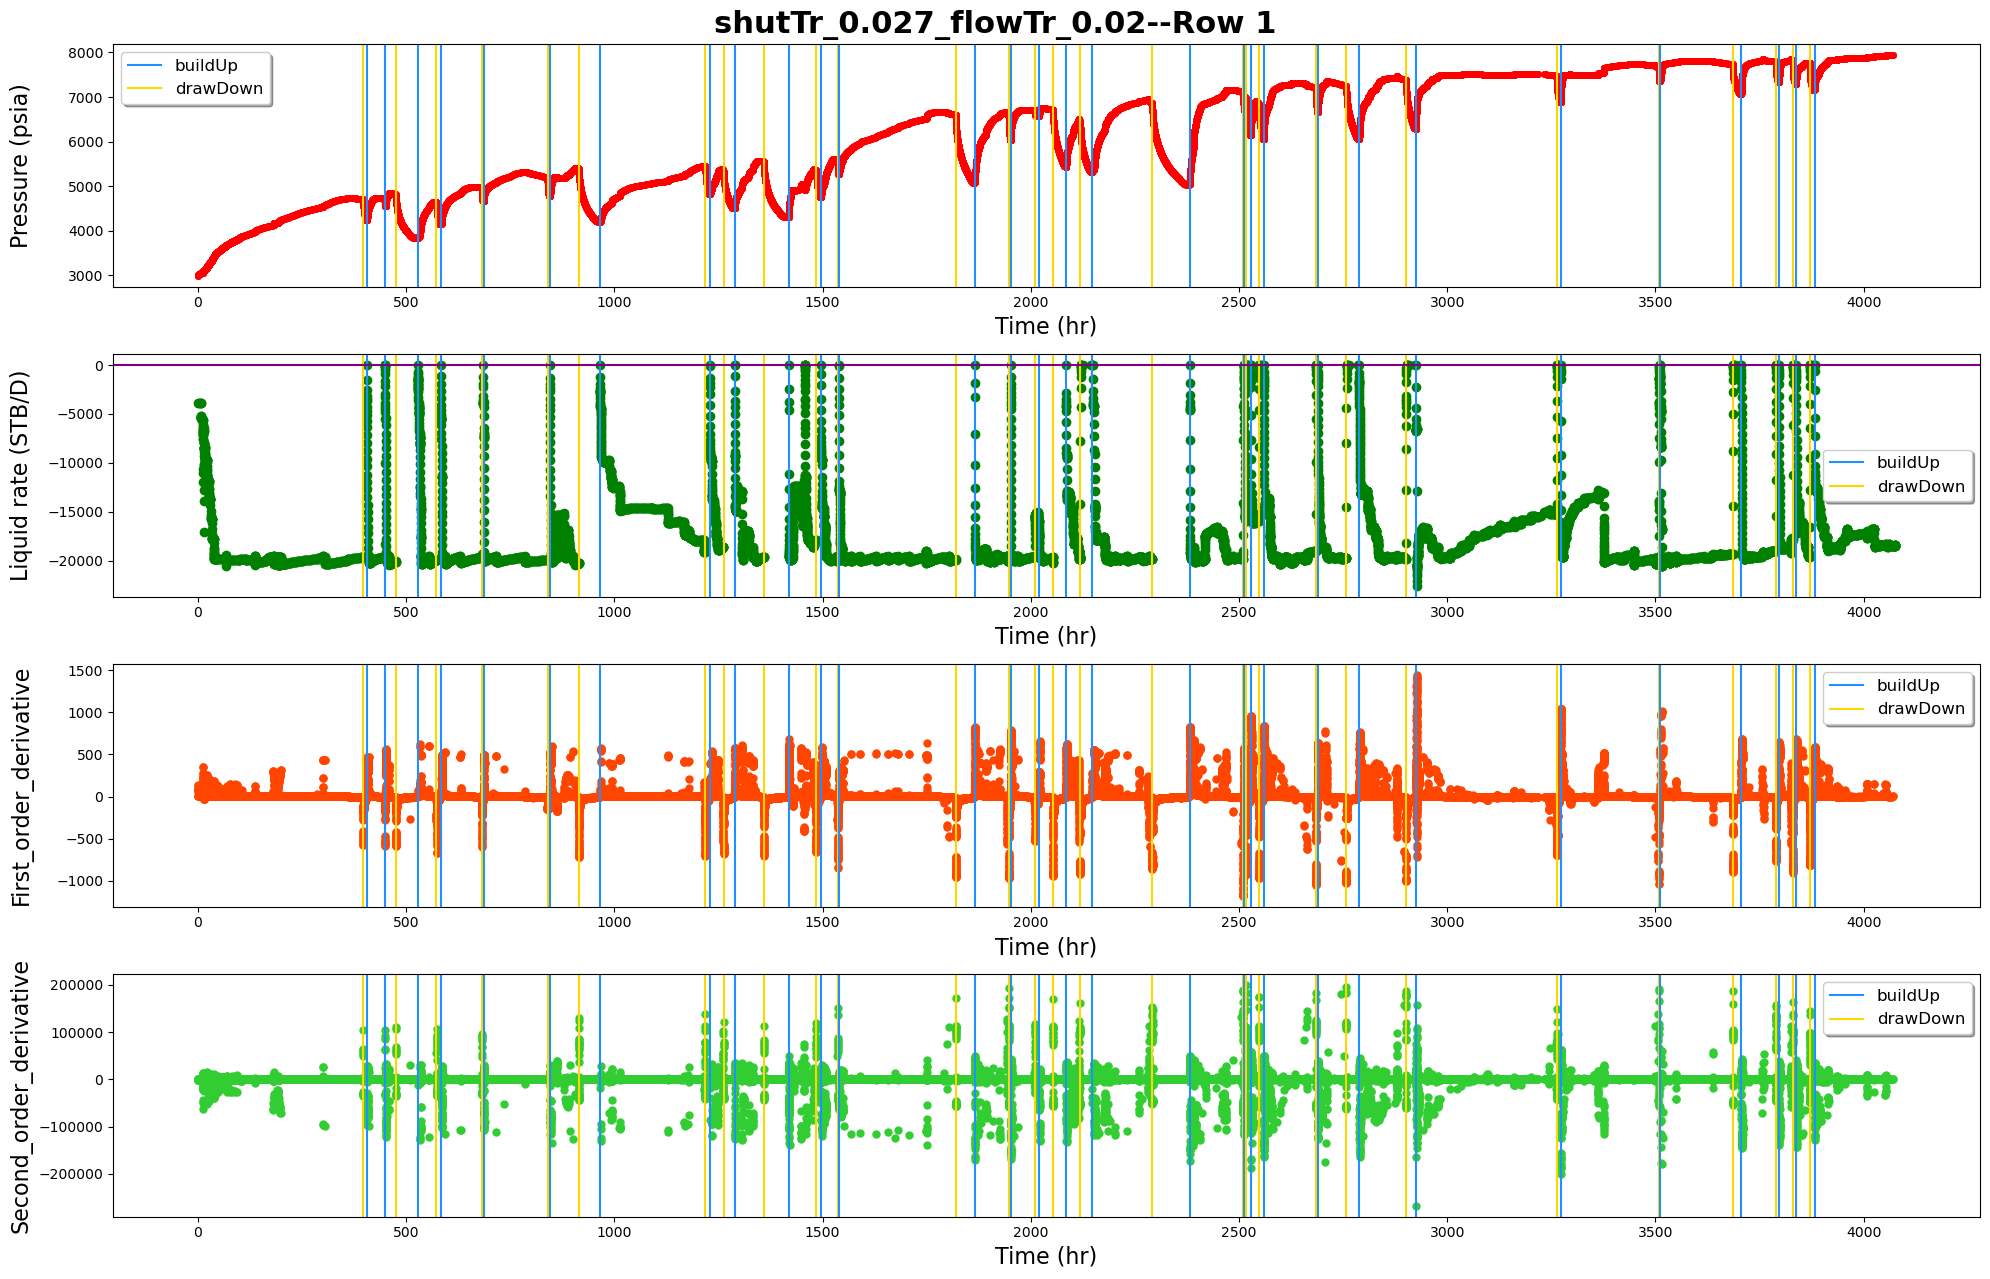

detected 60 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


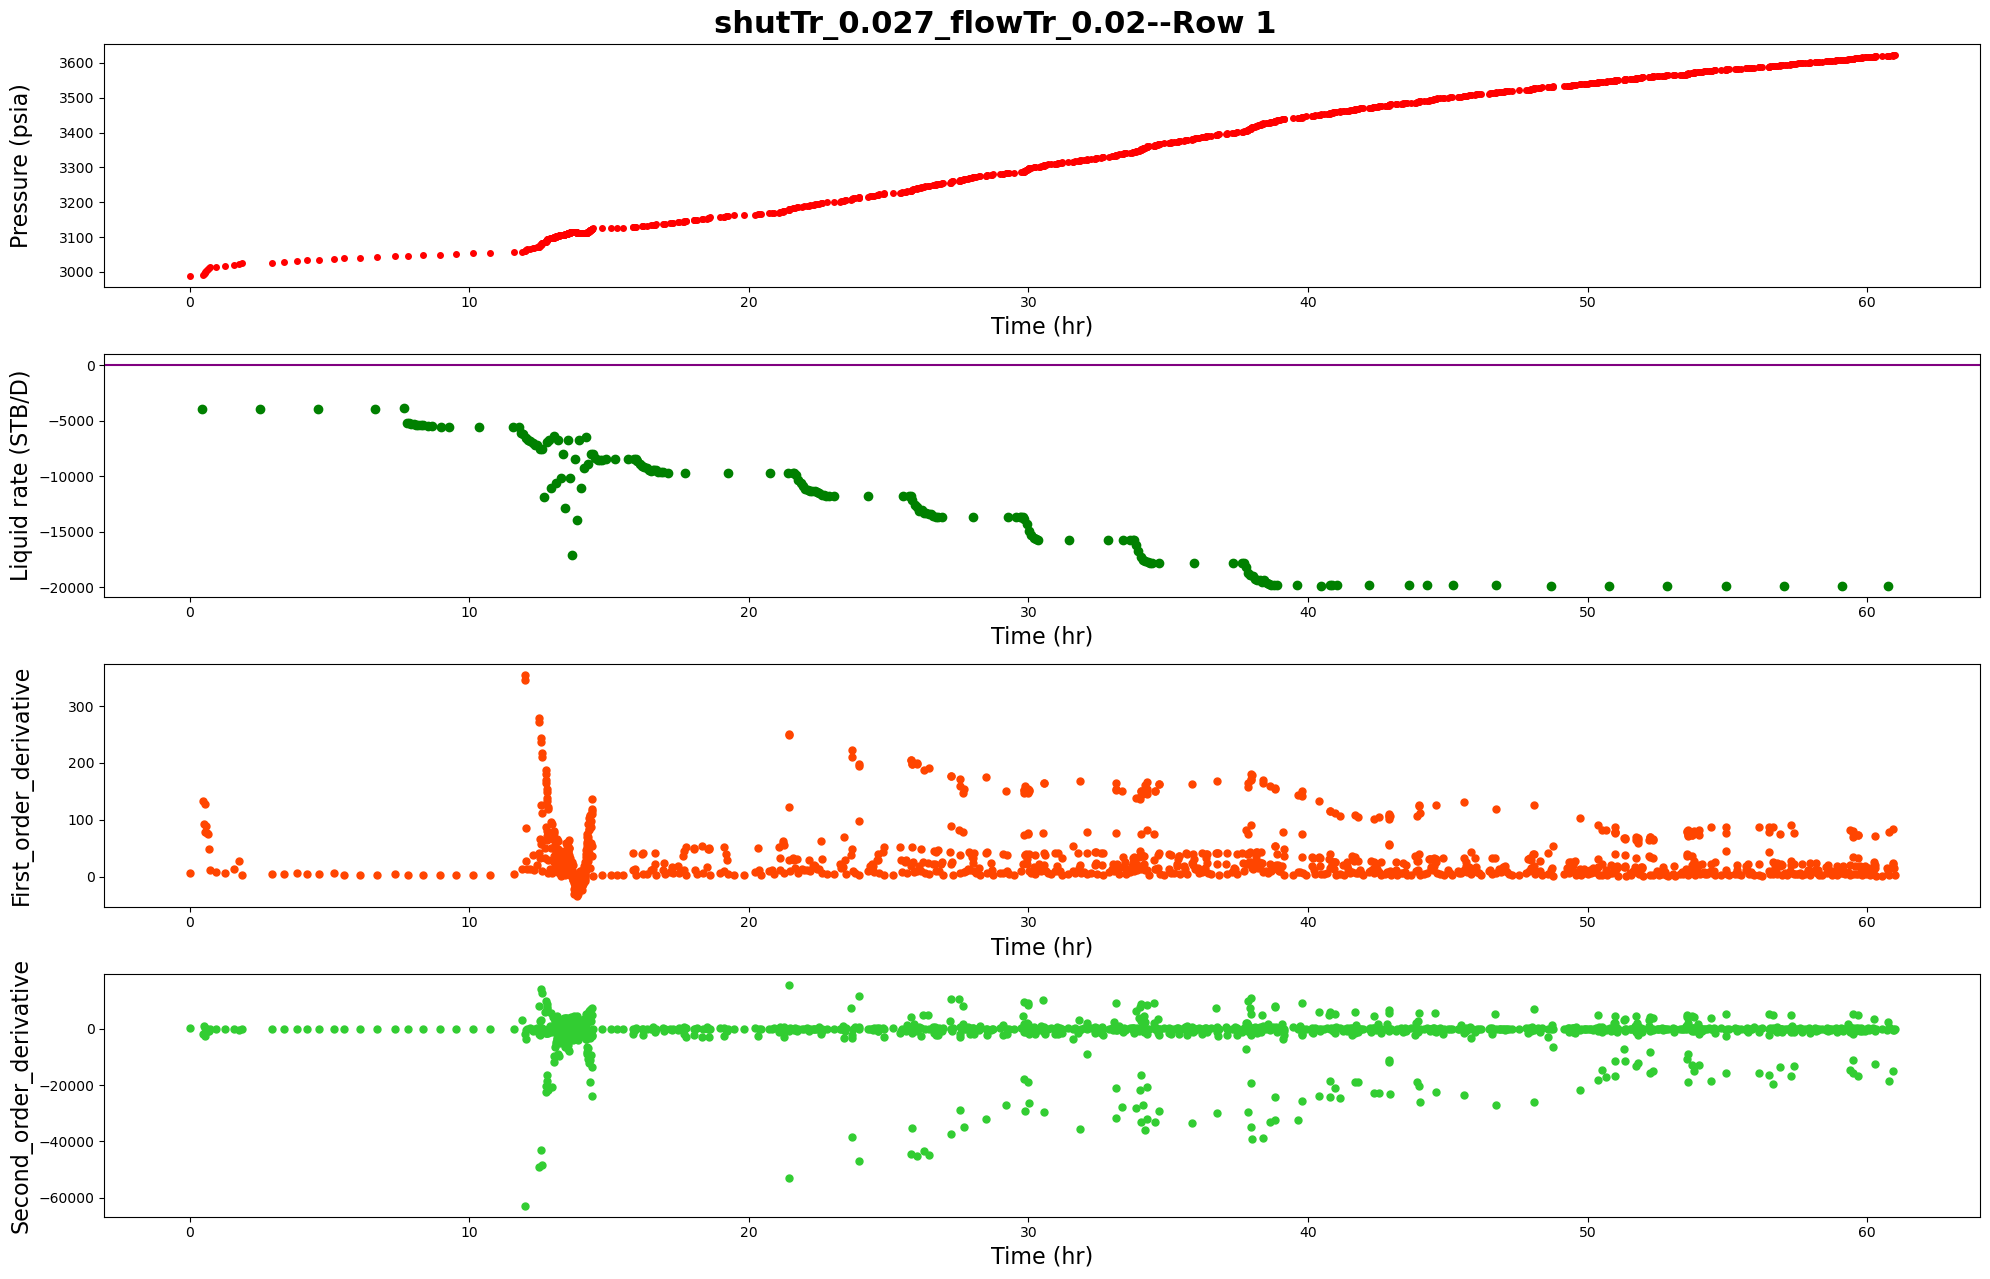

------row 2-----detected points:[2248]


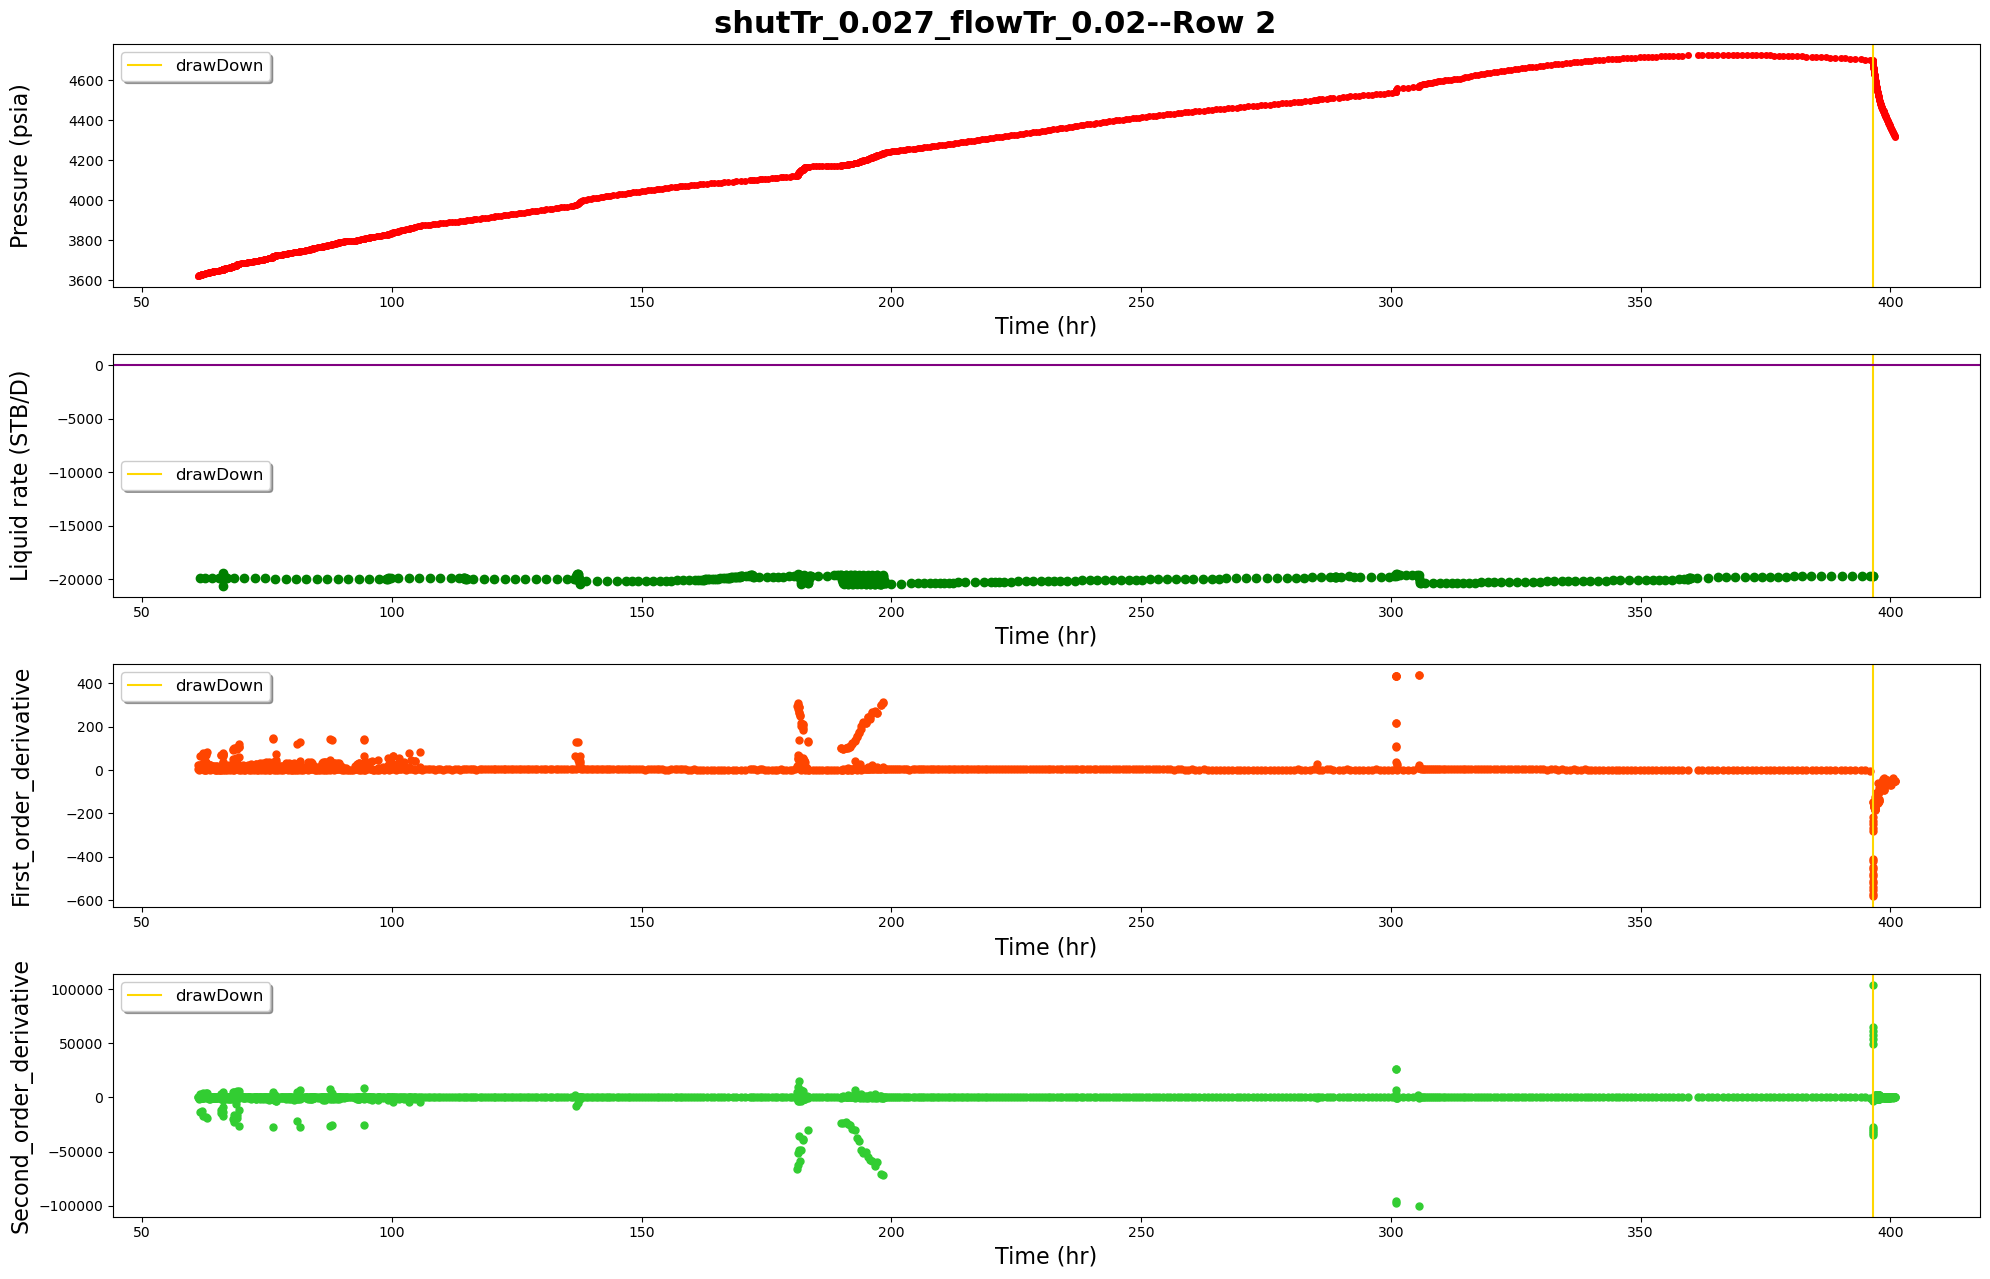

------row 3-----detected points:[2477, 2804, 2884, 3095, 3560]


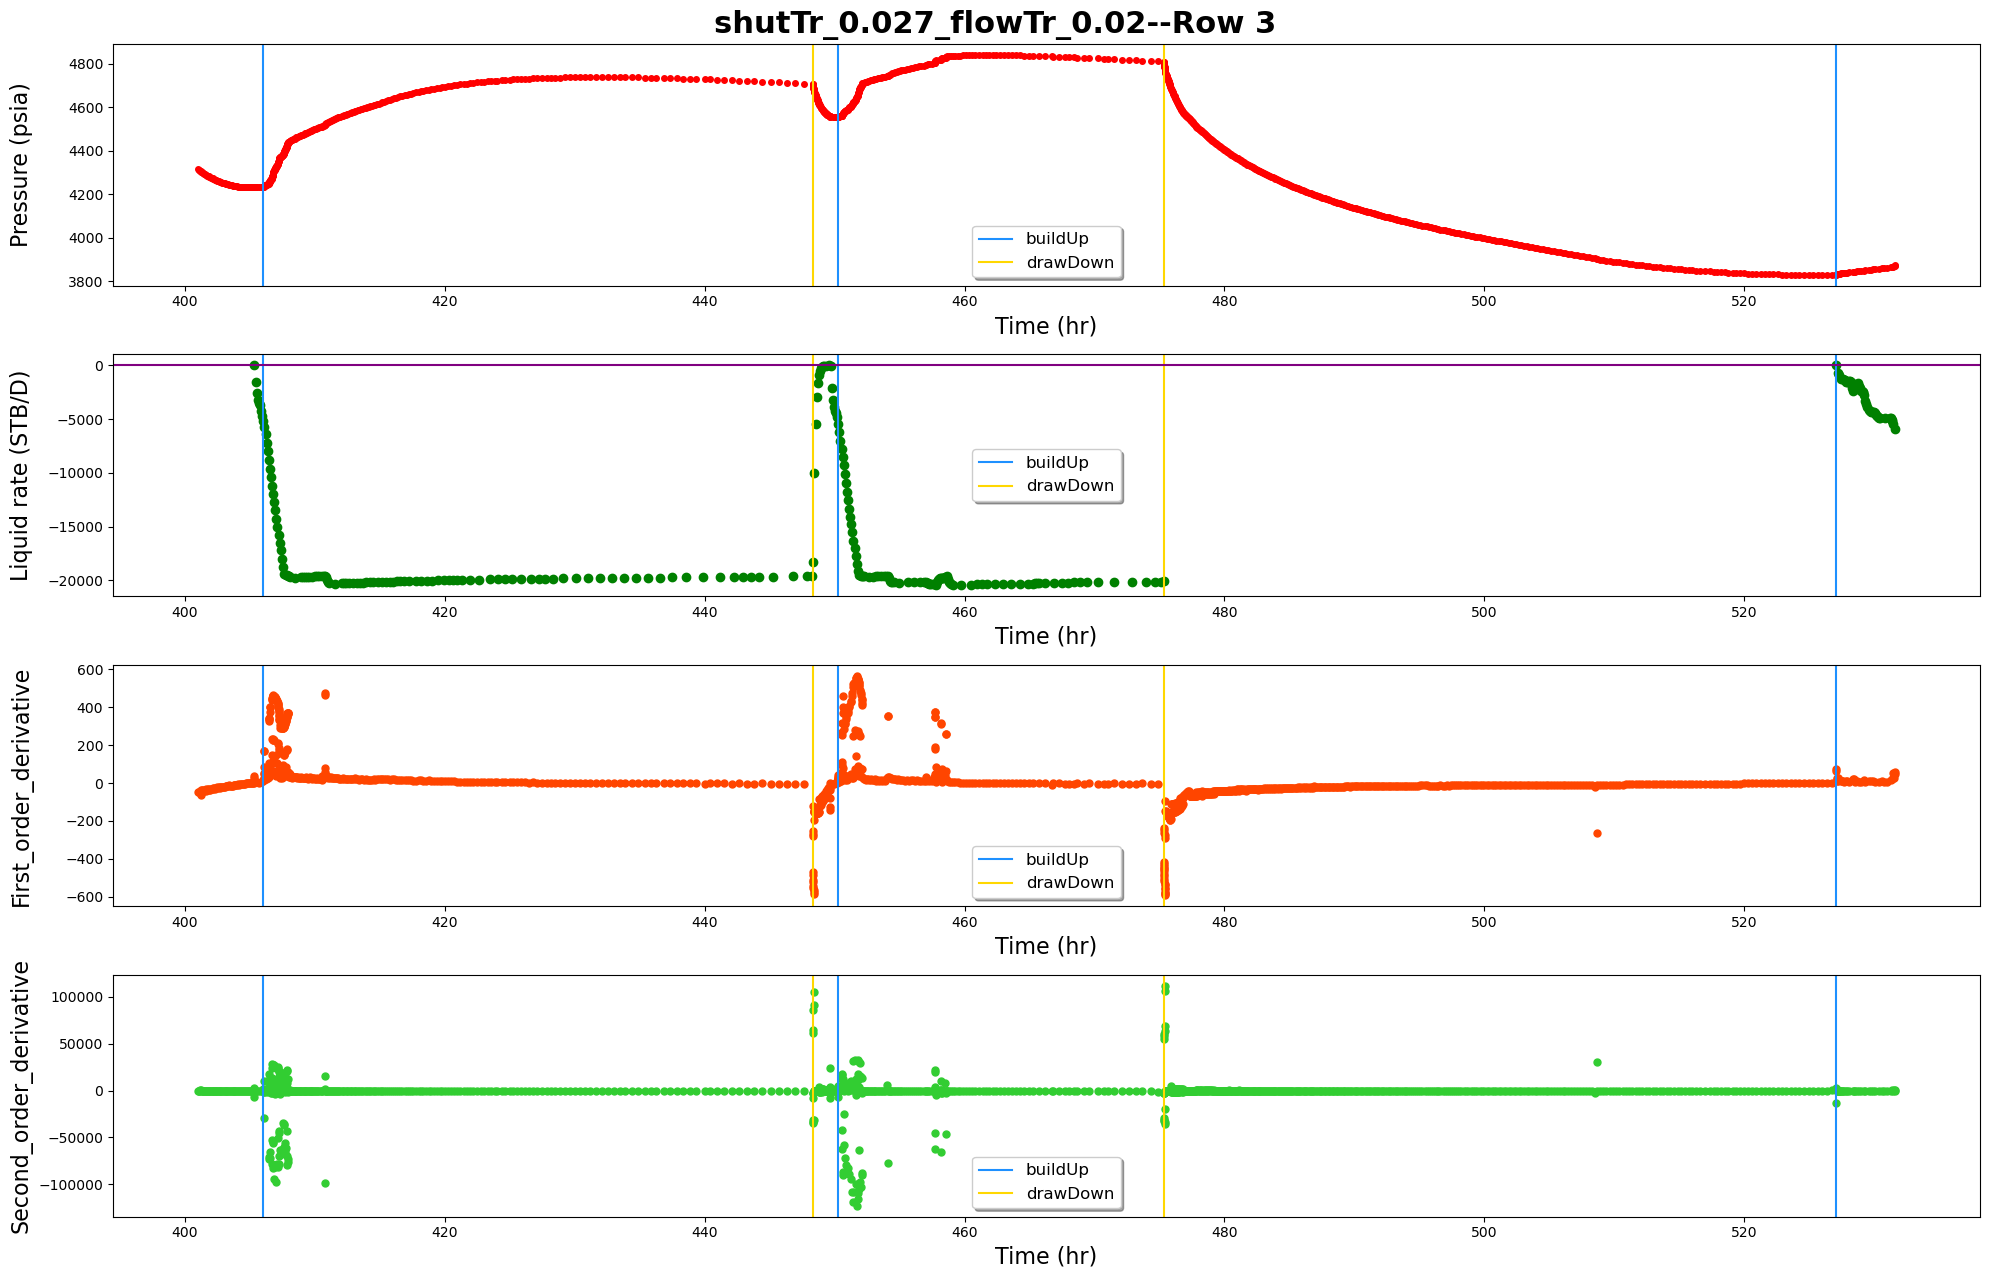

------row 4-----detected points:[3994, 4228, 4750]


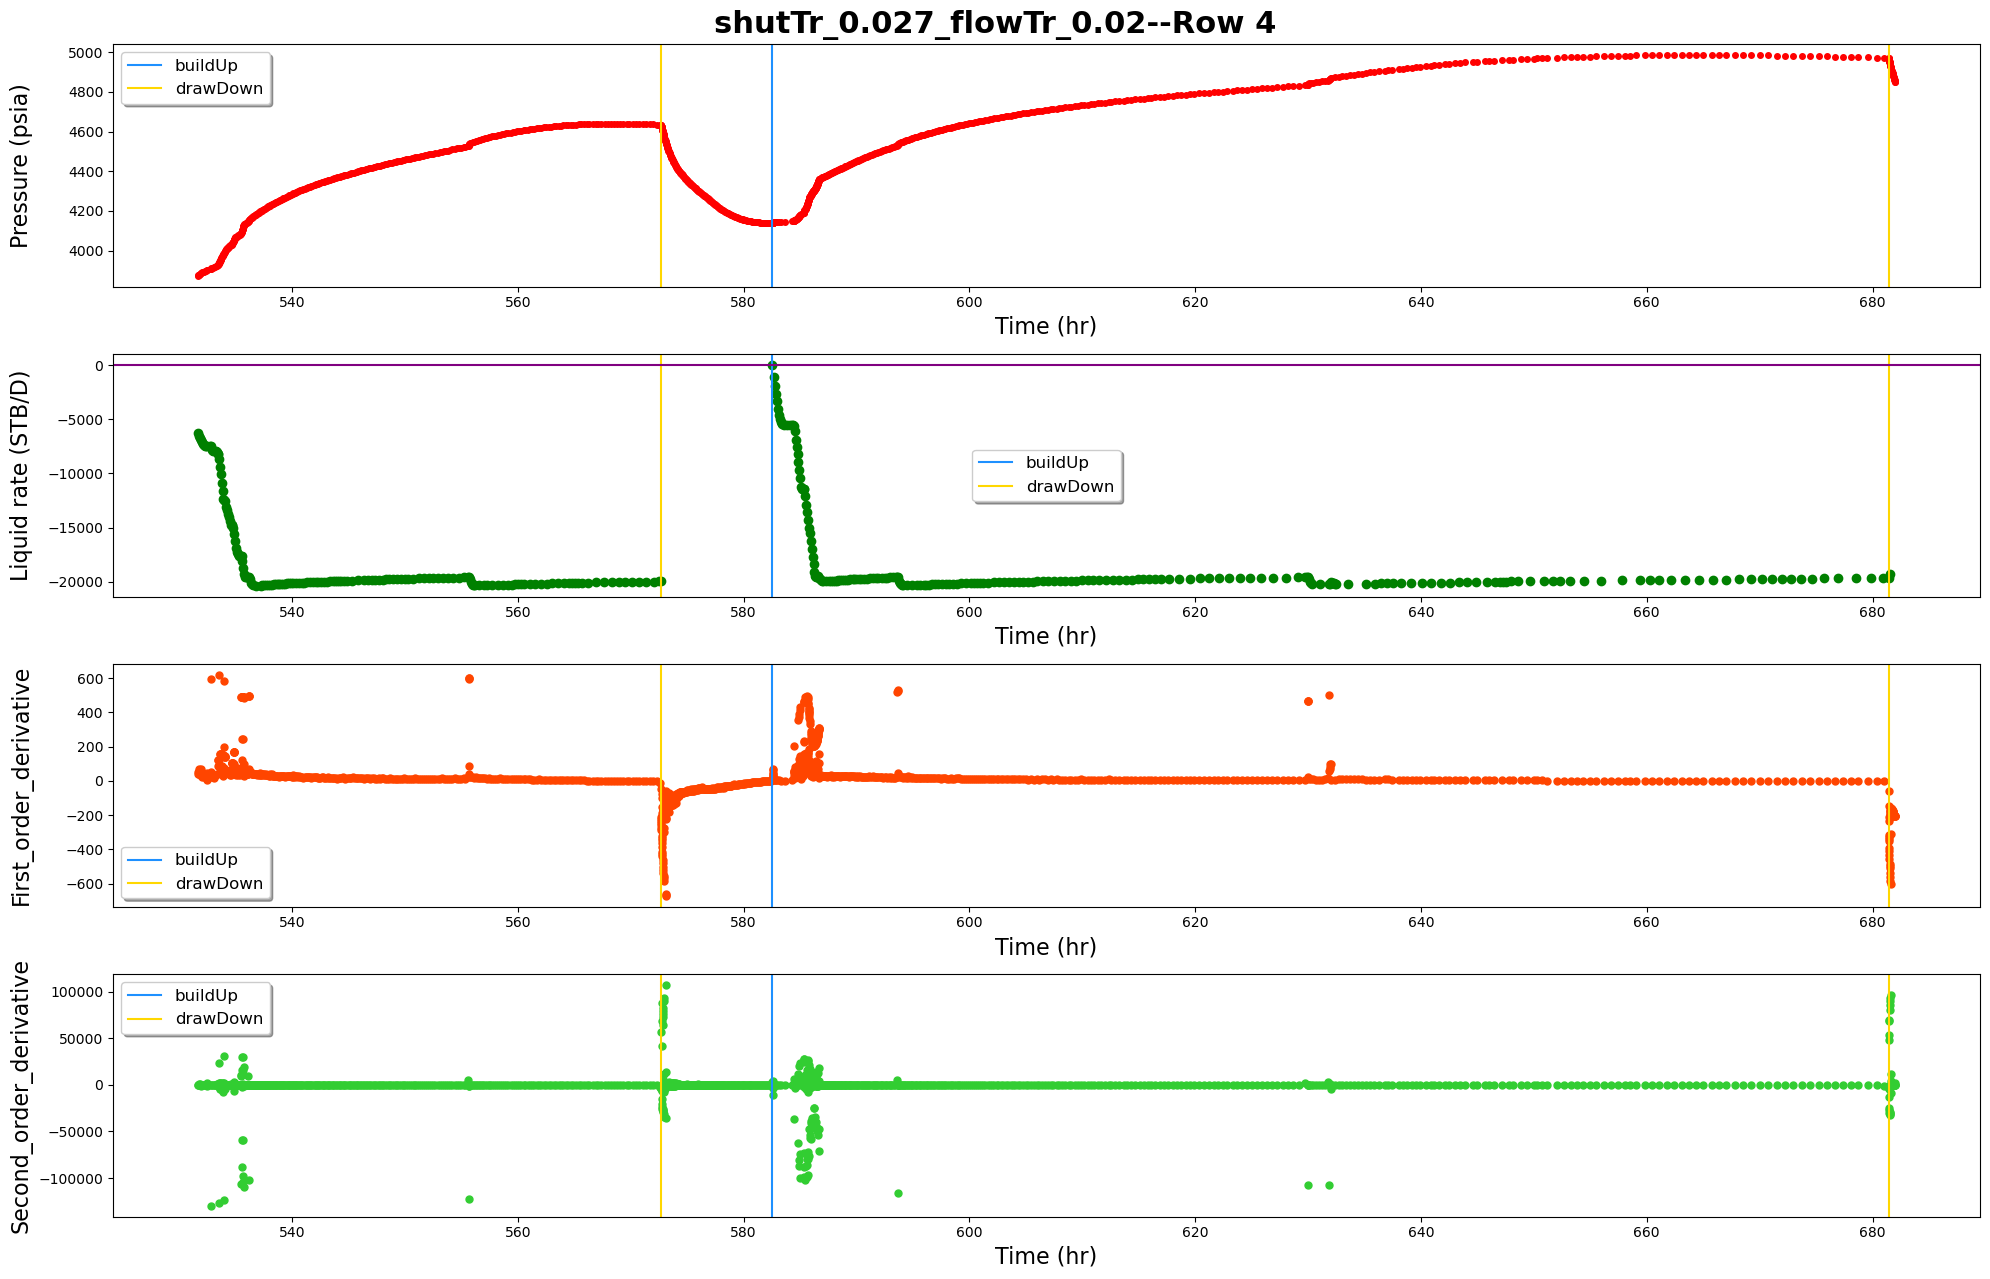

------row 5-----detected points:[4899, 5325, 5445]


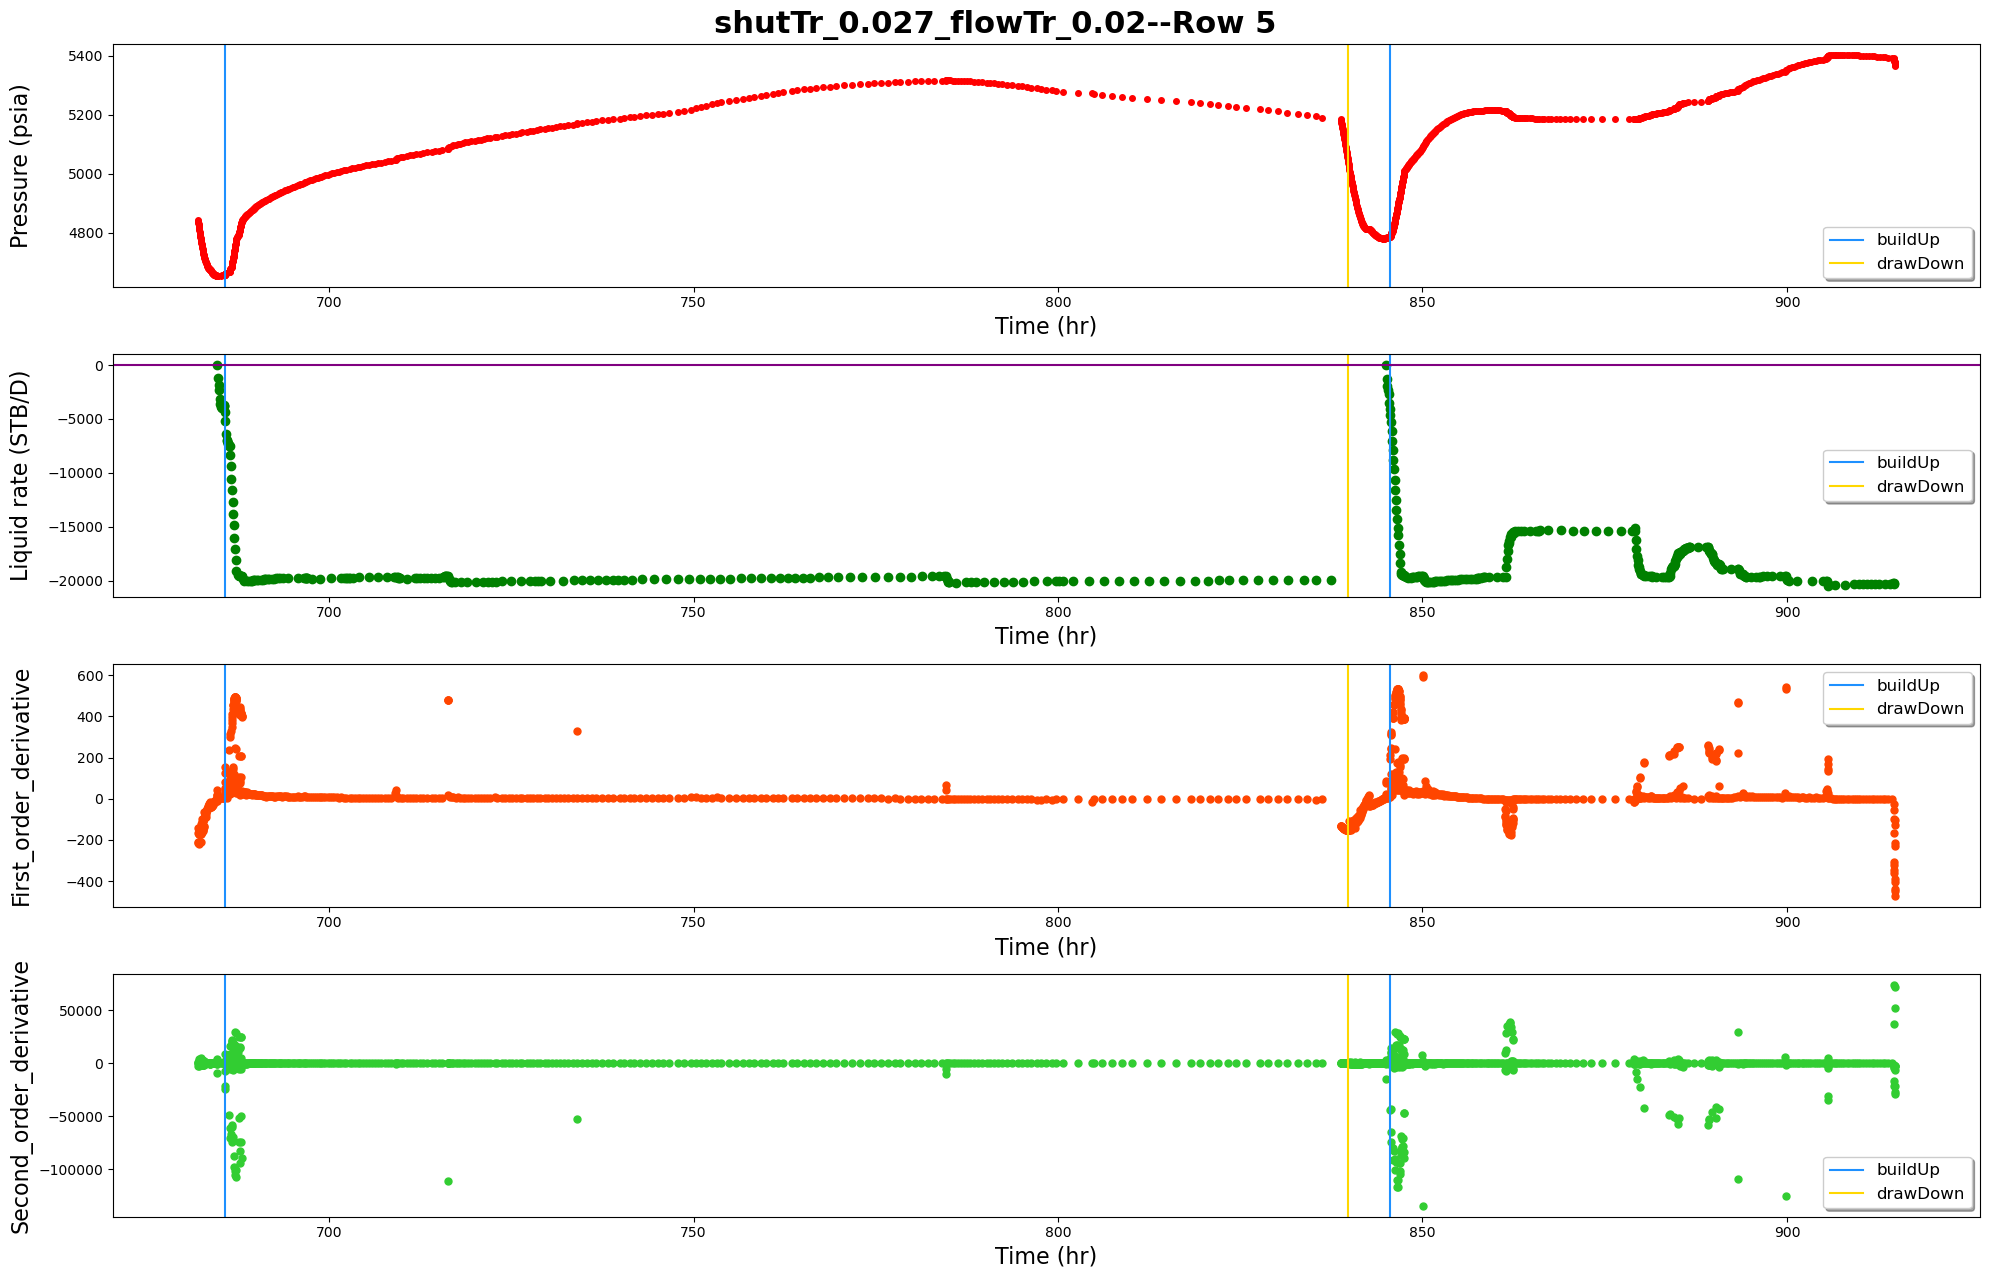

------row 6-----detected points:[6024, 6543]


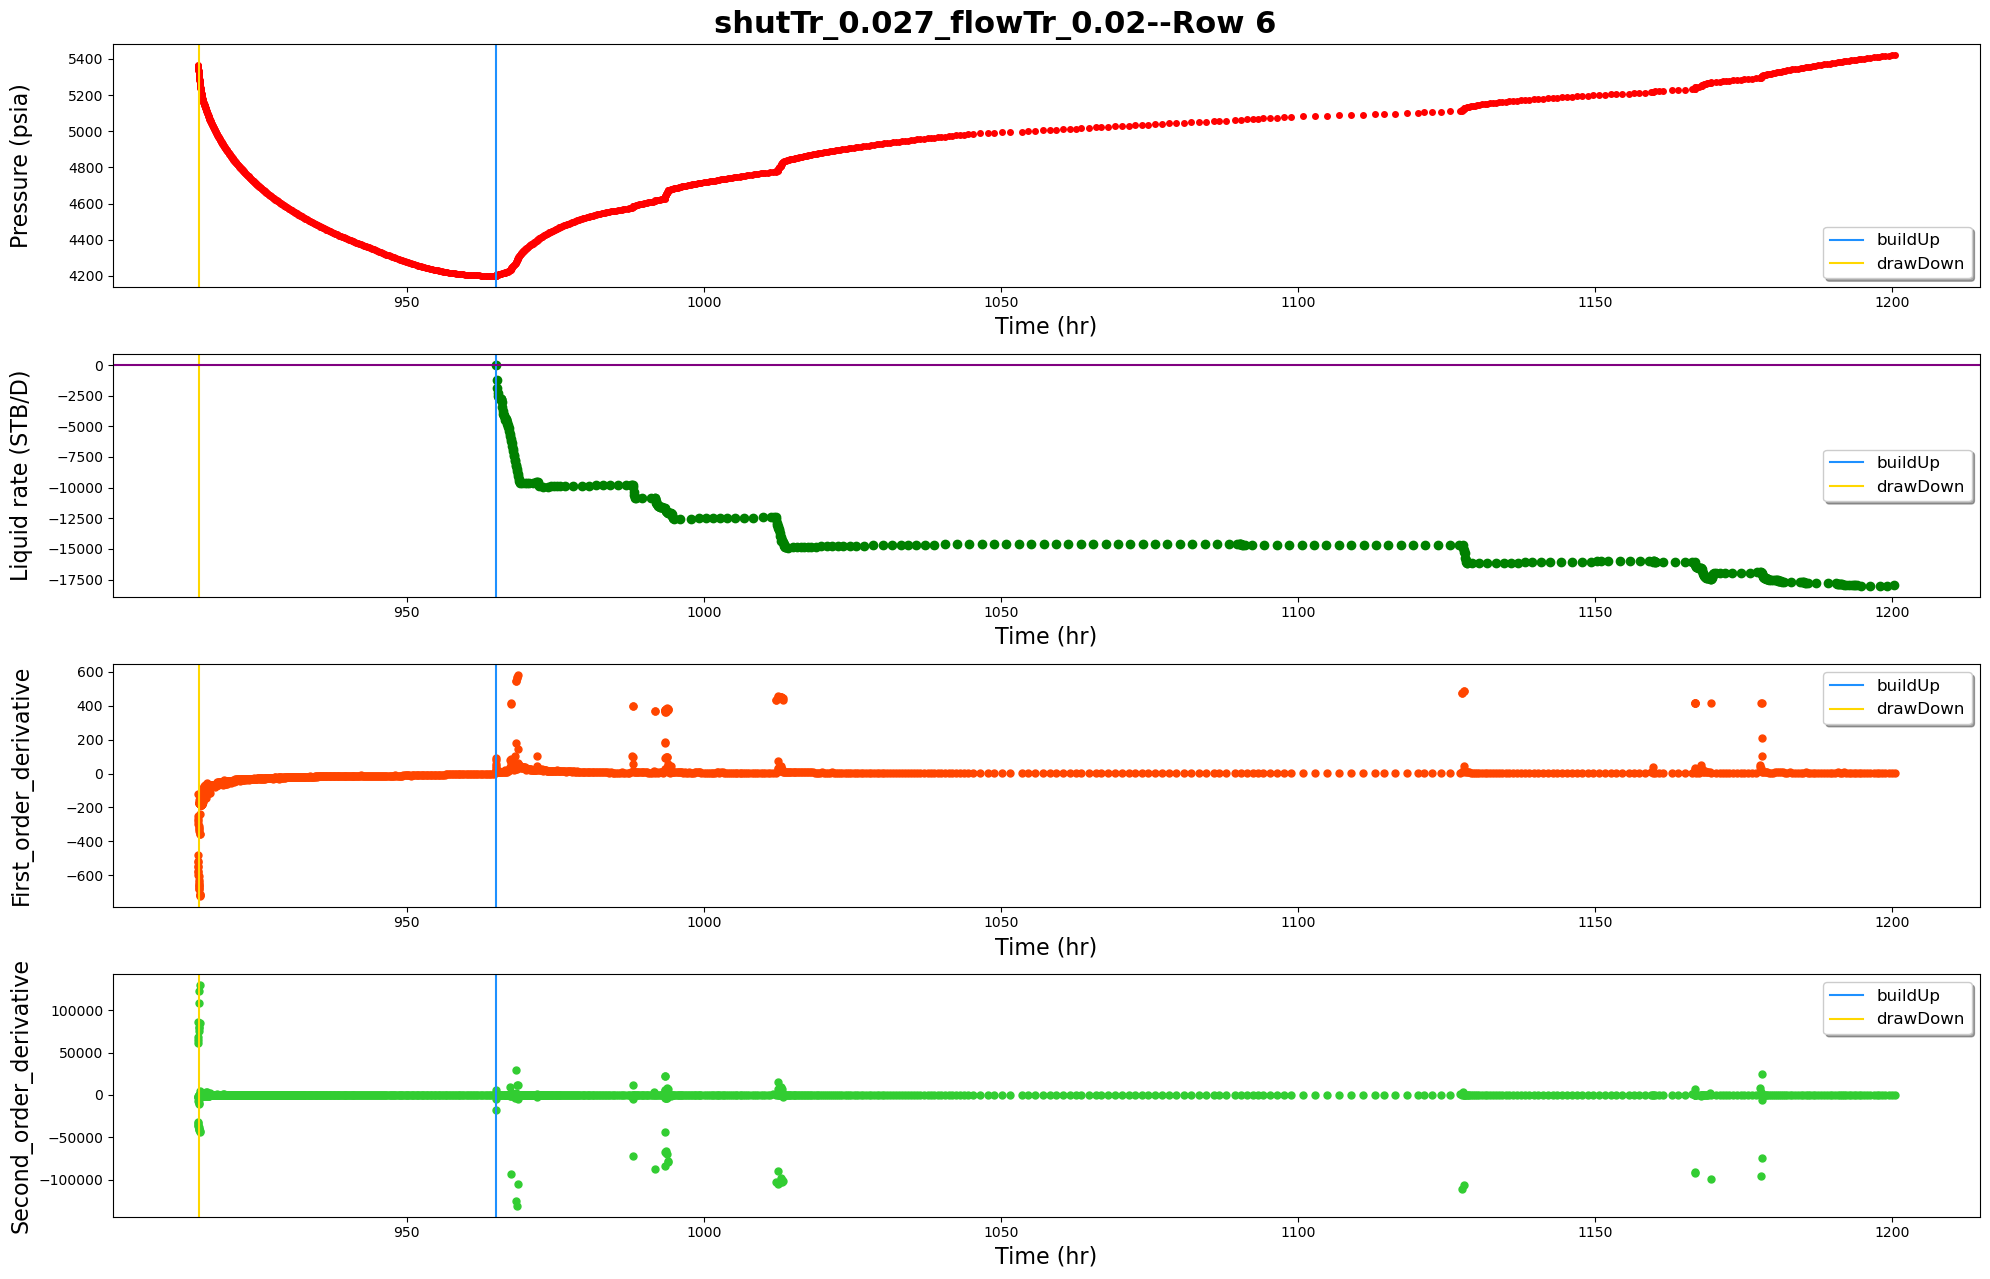

------row 7-----detected points:[7263, 7544, 8015, 8361]


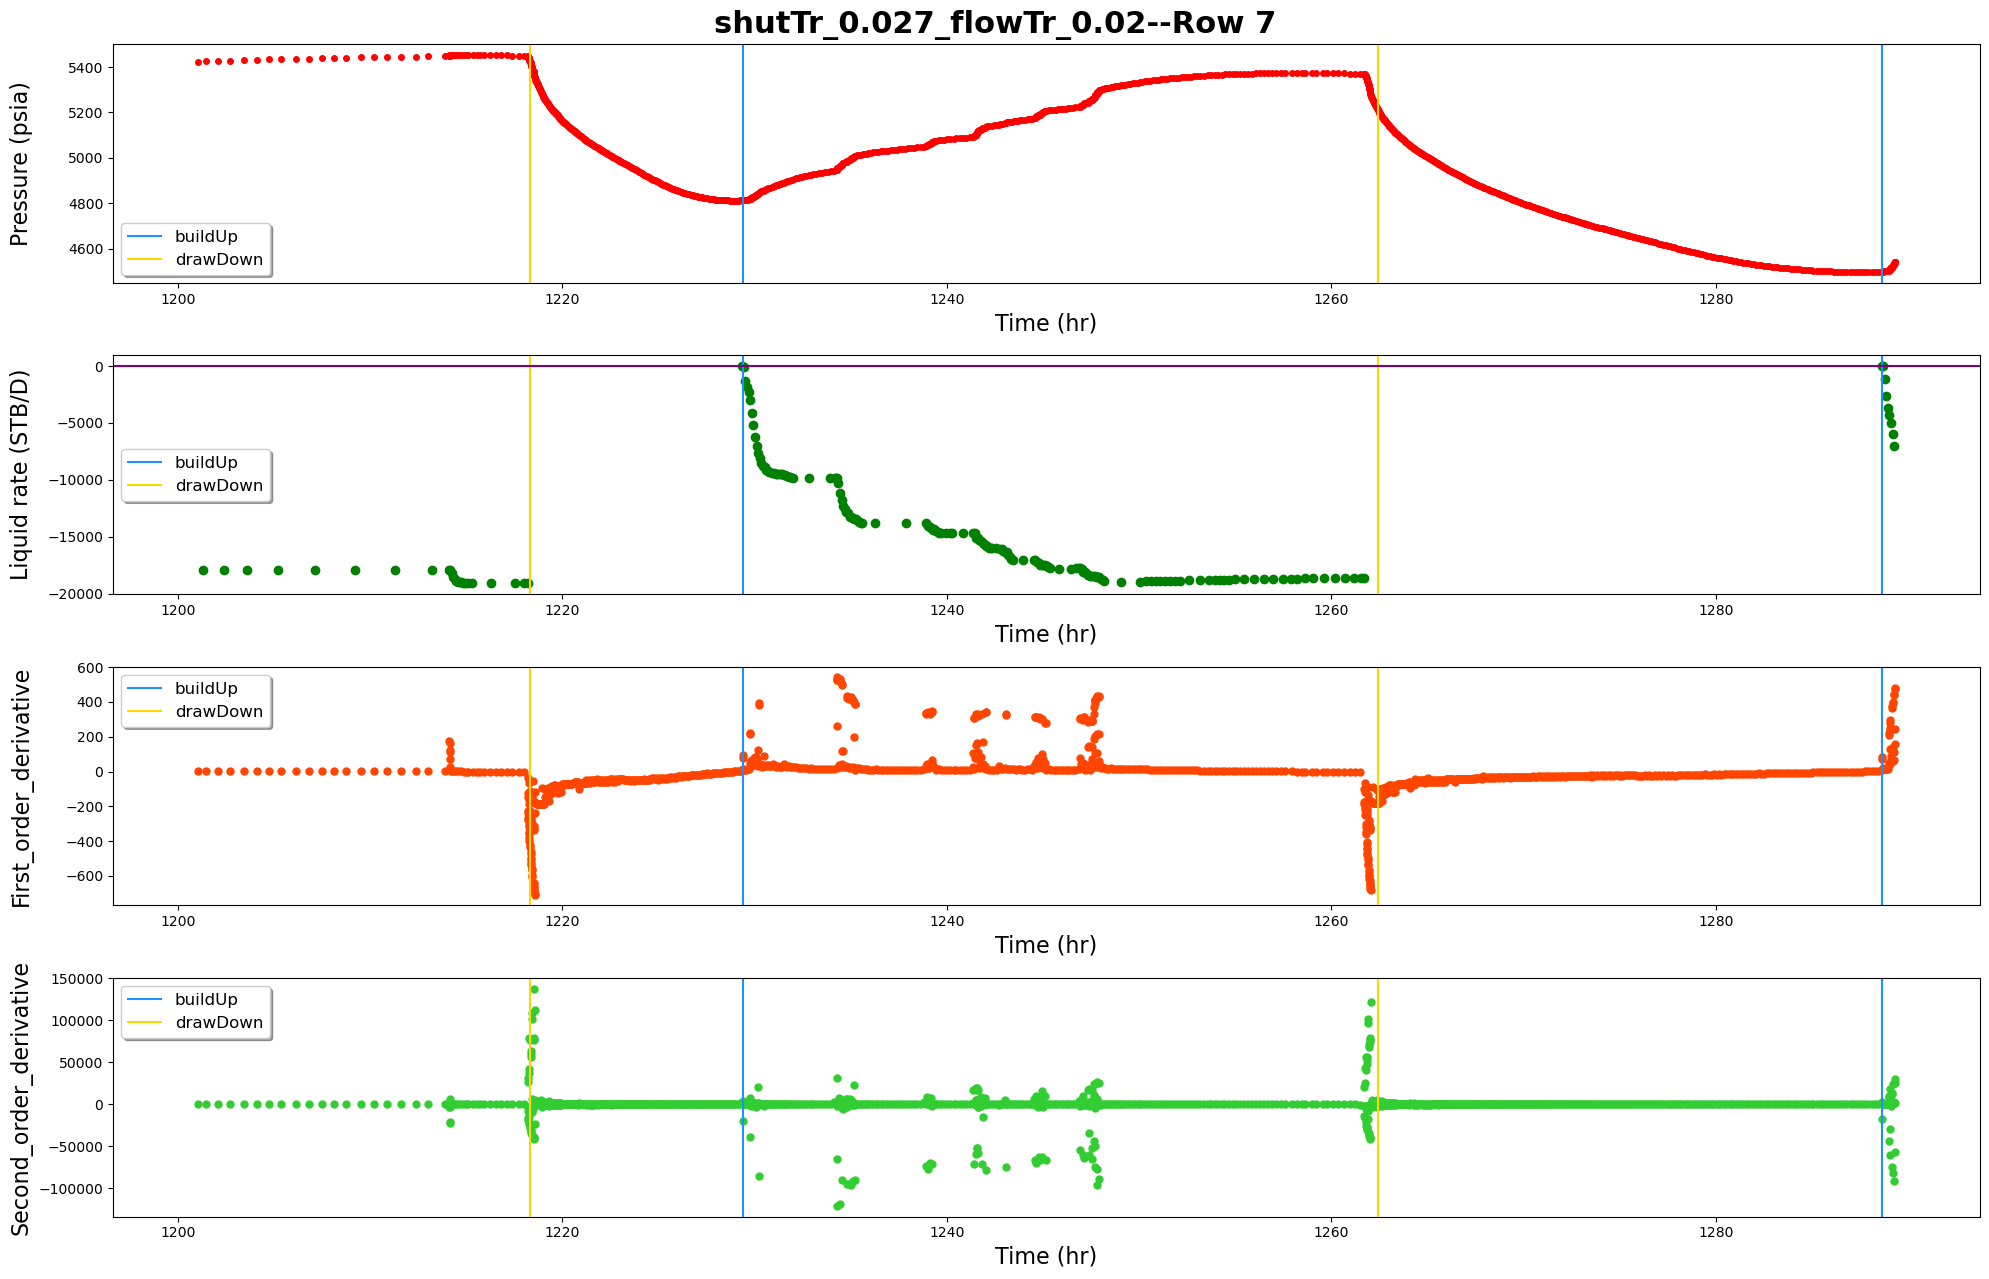

------row 8-----detected points:[9024]


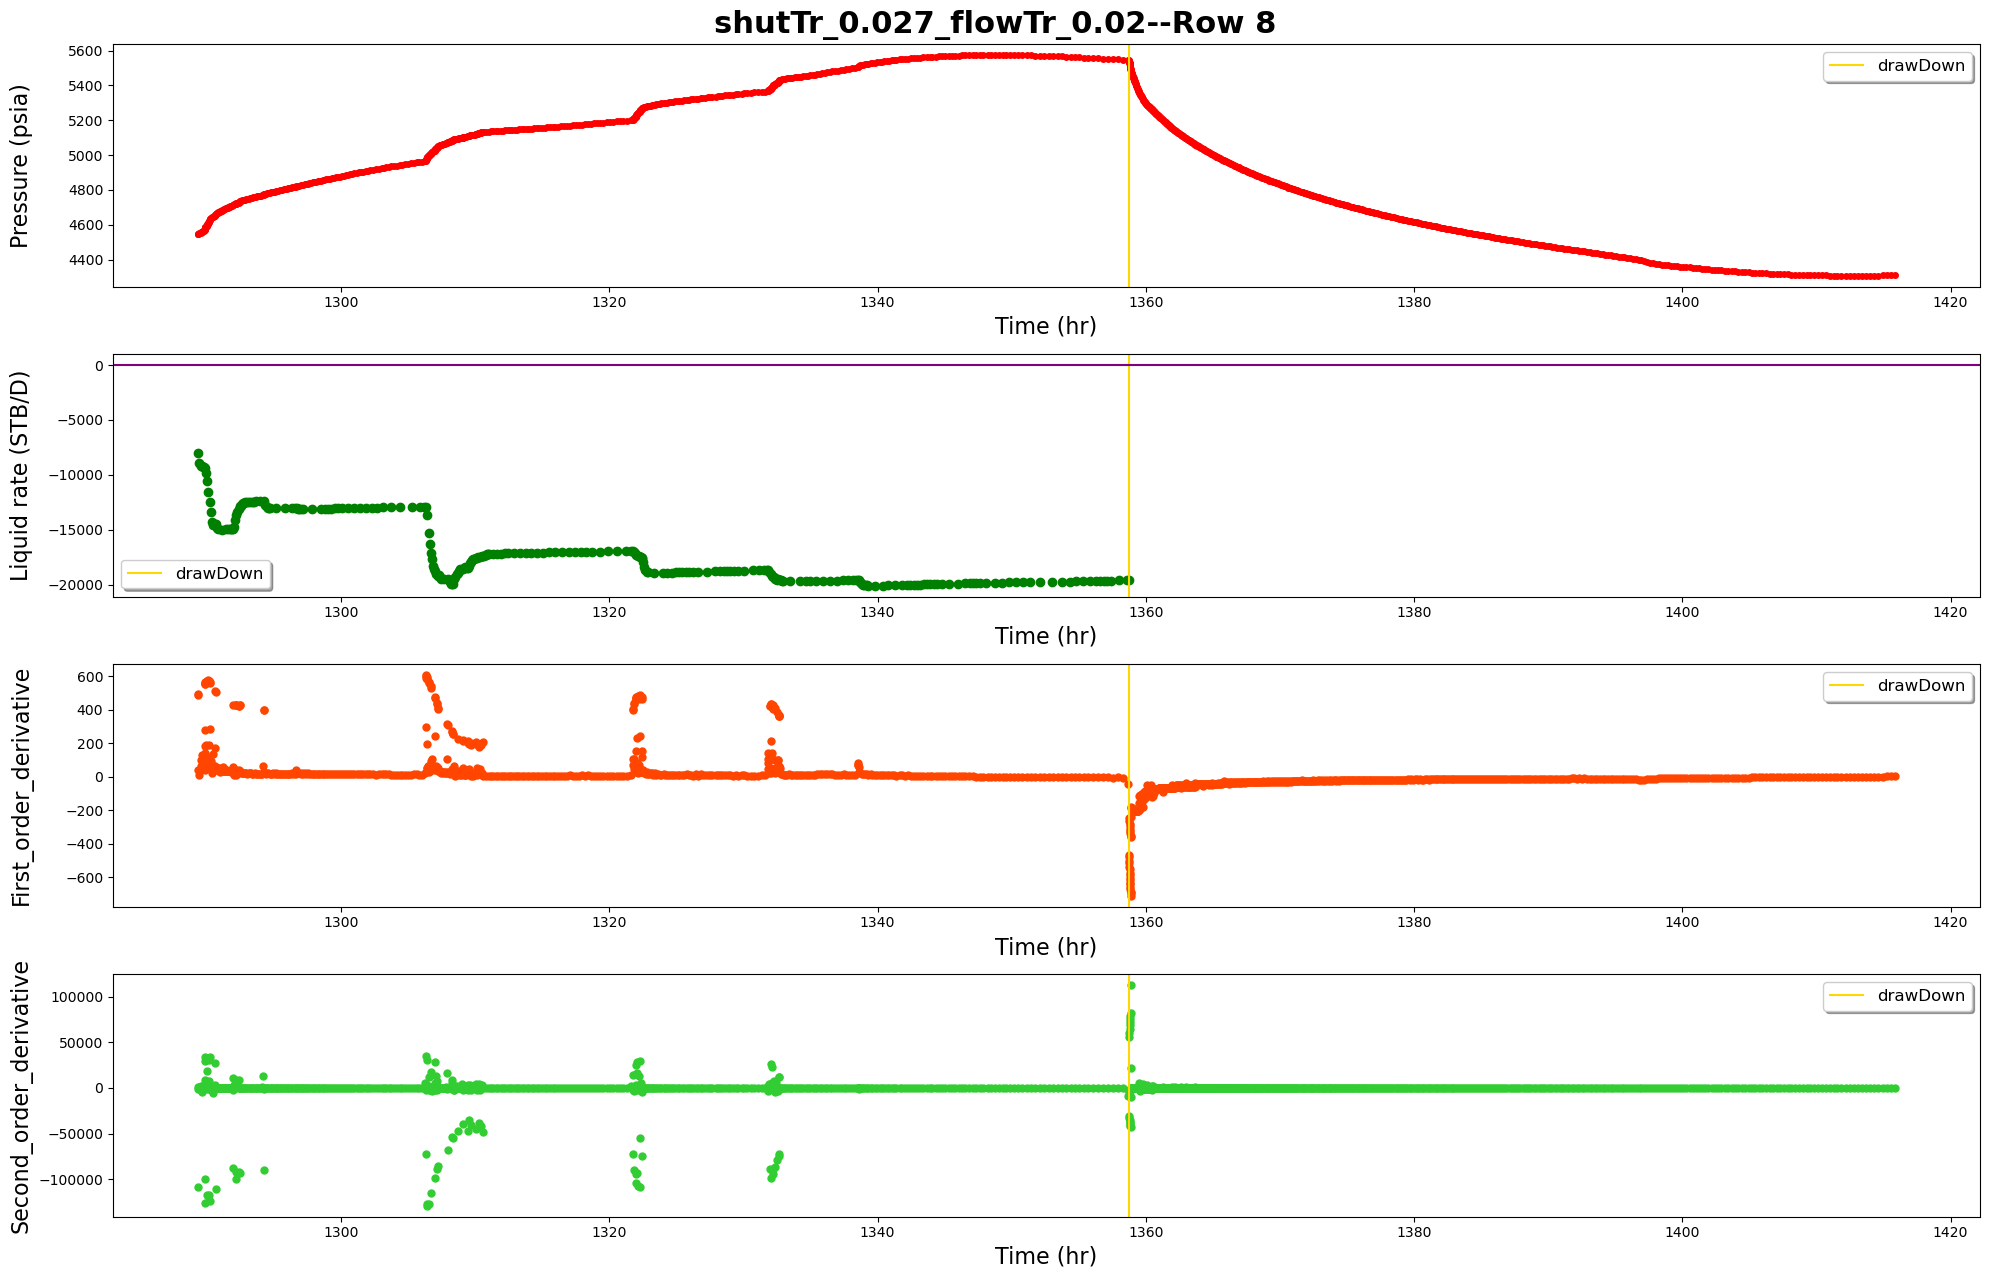

------row 9-----detected points:[9606, 10527]


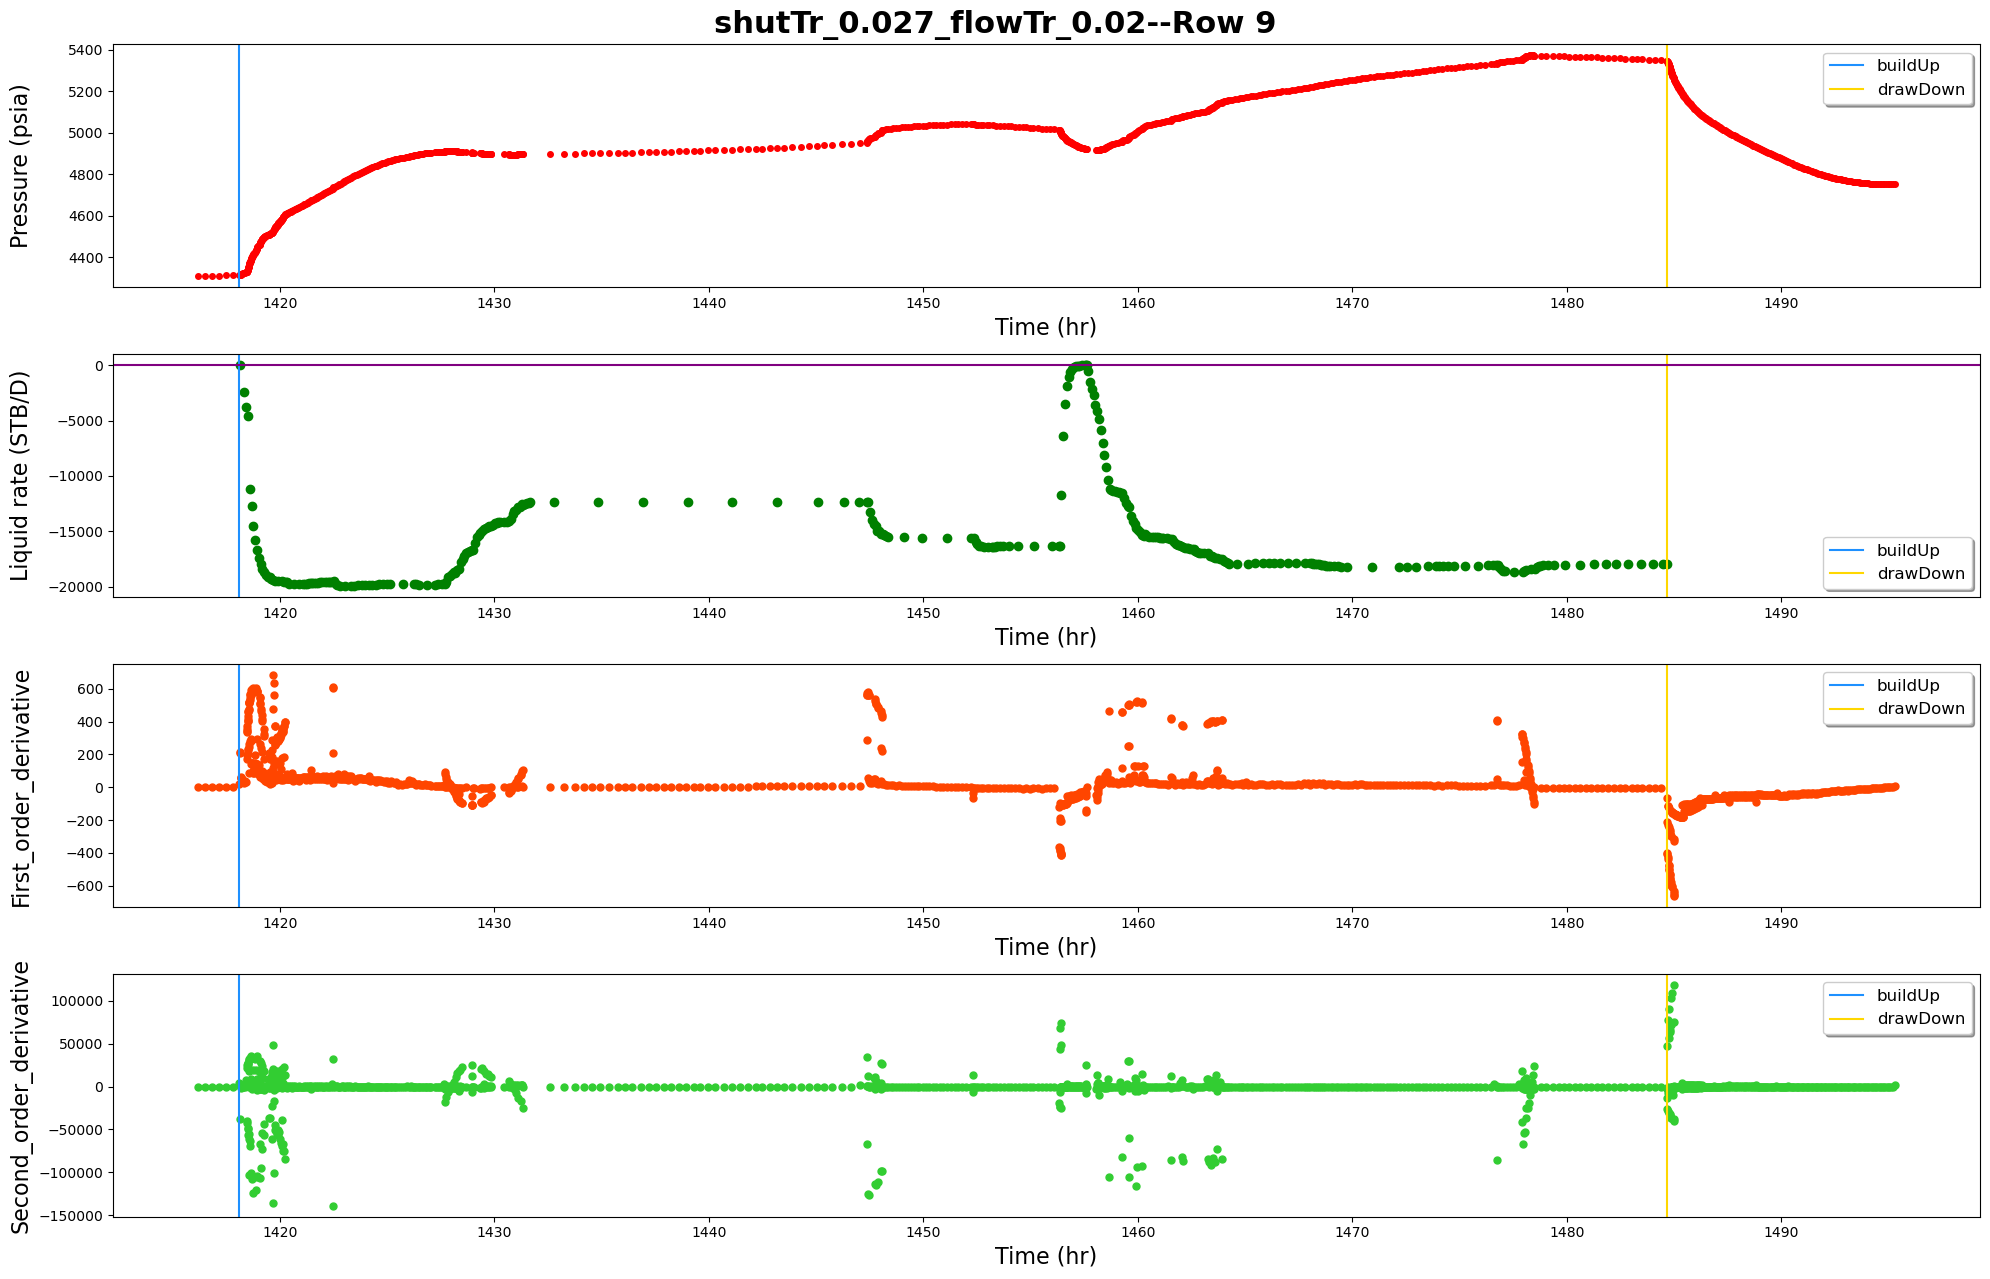

------row 10-----detected points:[10800, 11340, 11490]


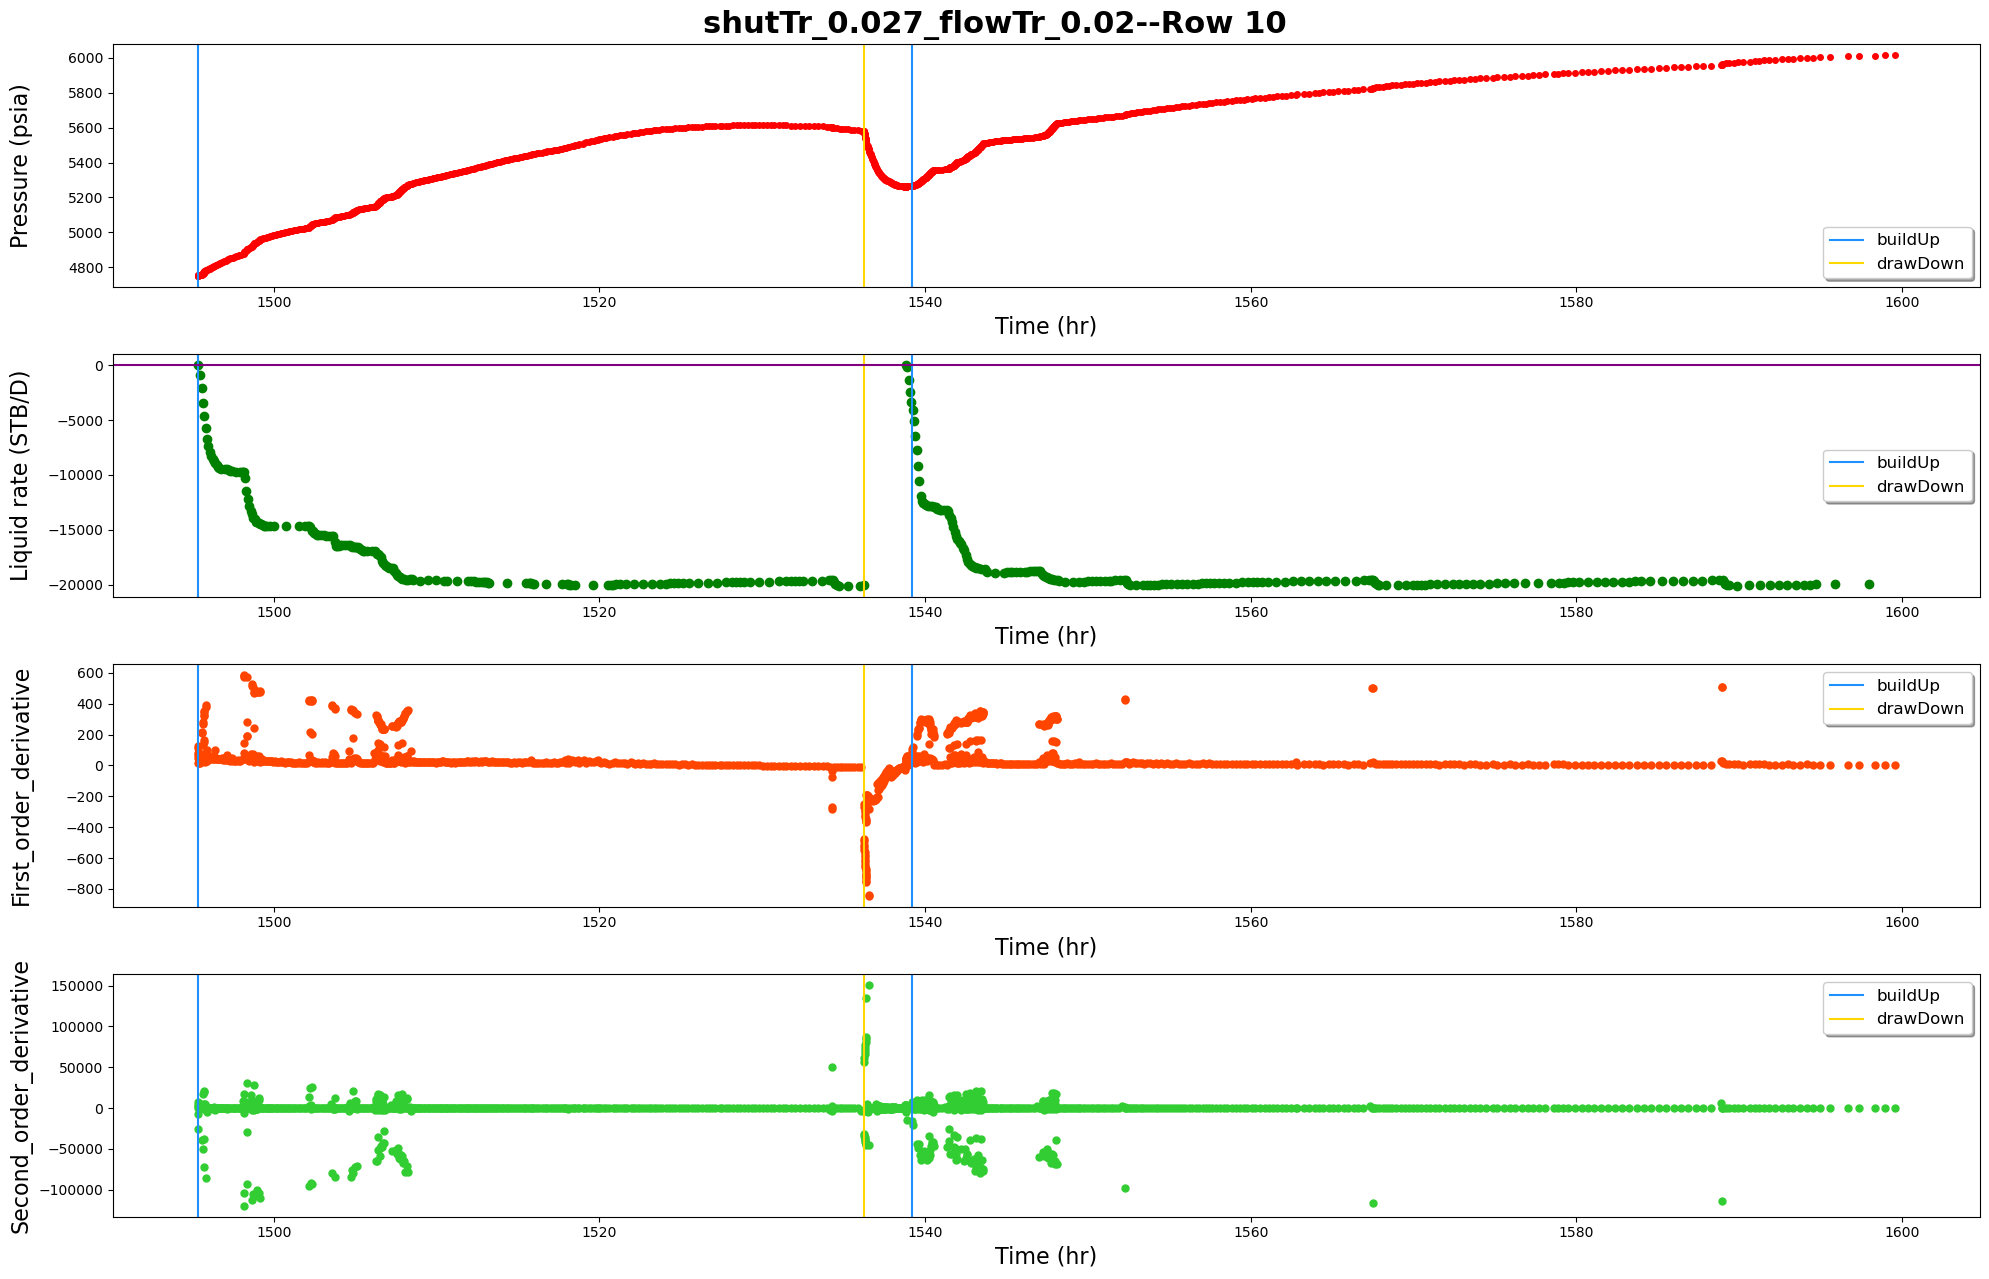

------row 11-----detected points:[12362, 13038]


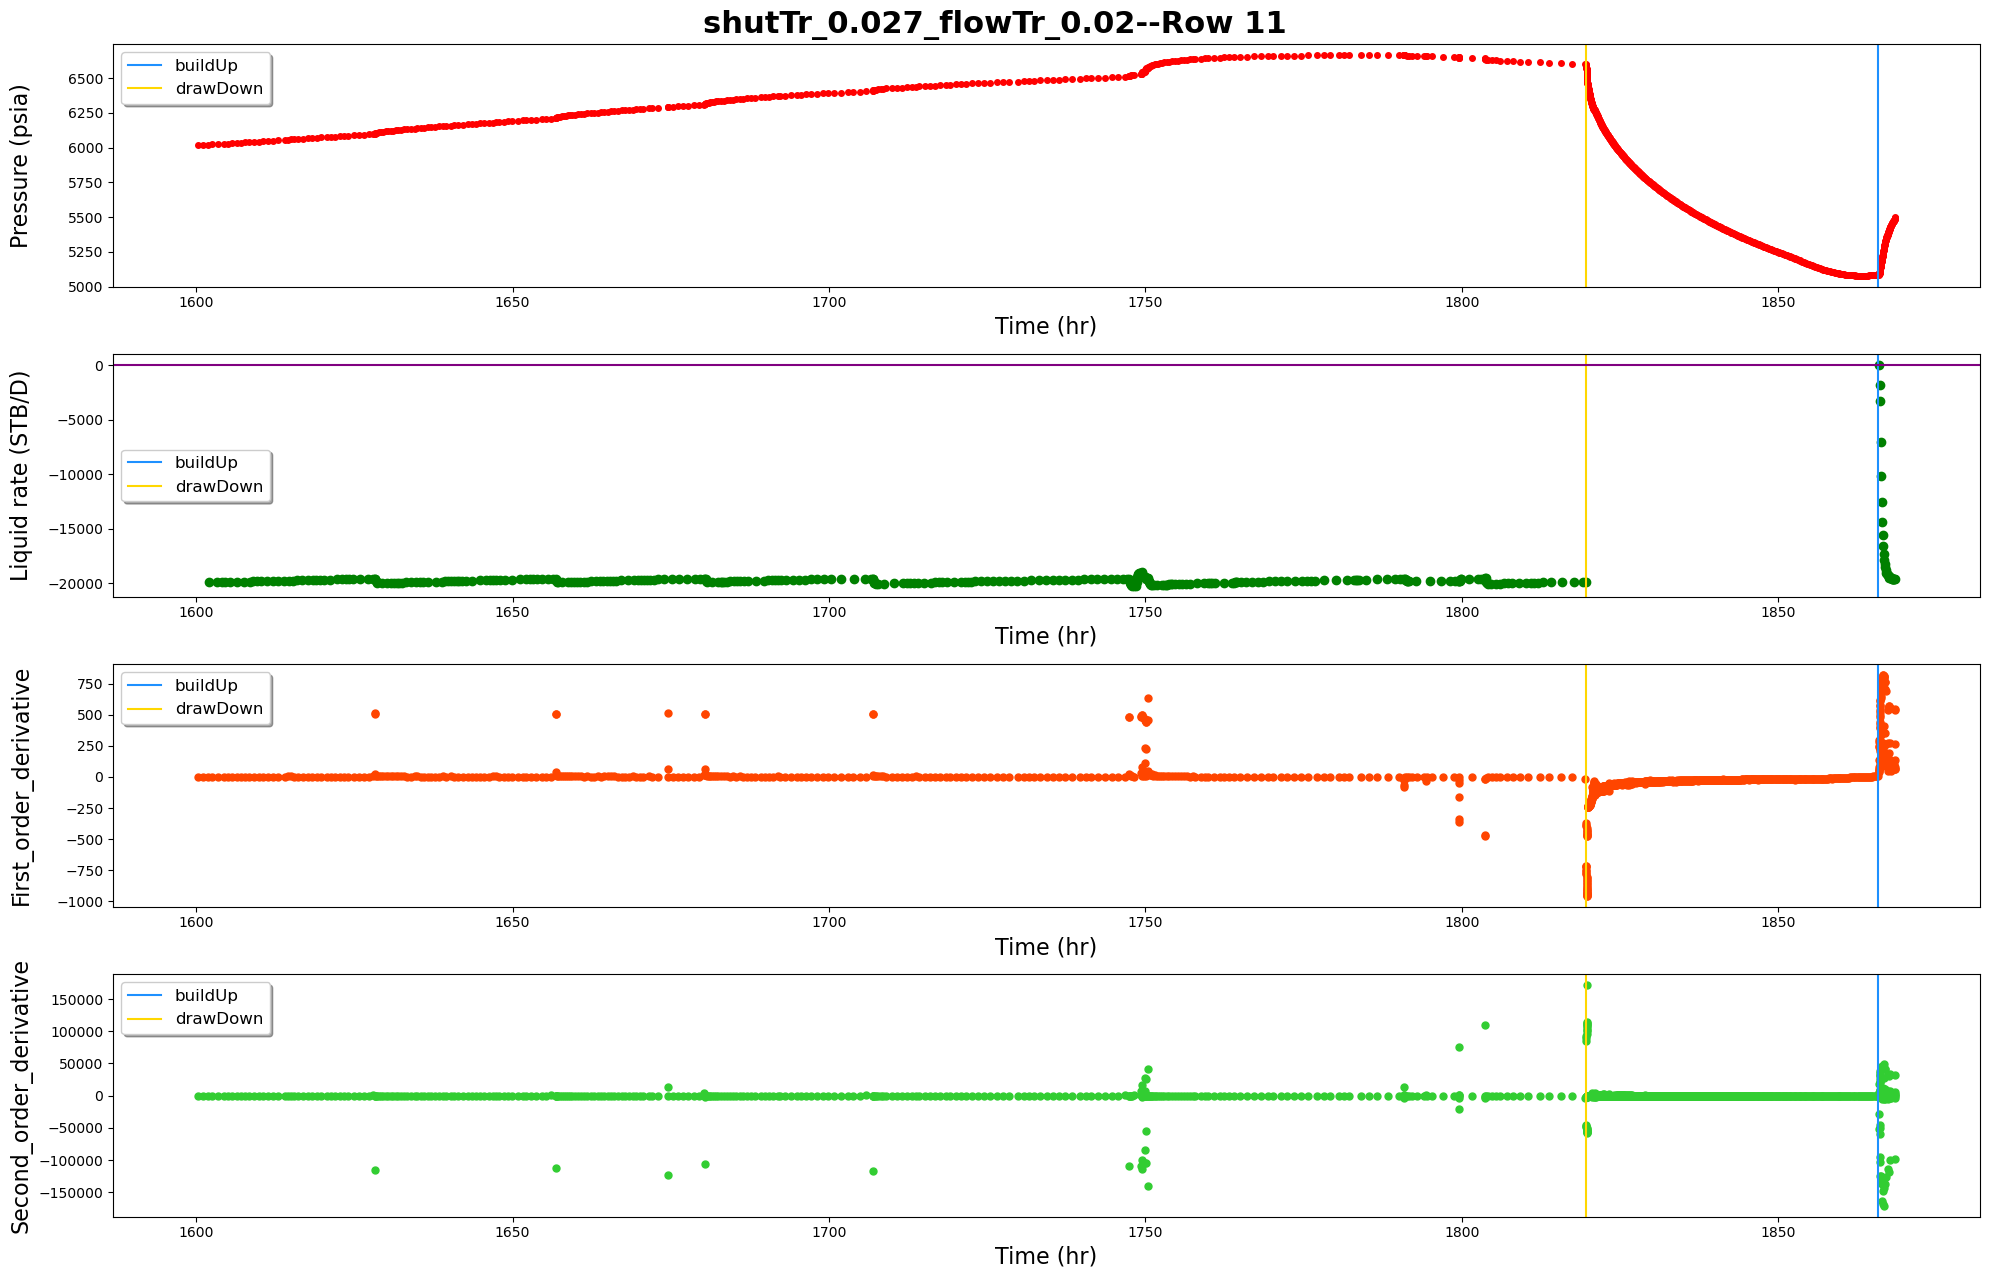

------row 12-----detected points:[13909, 14089]


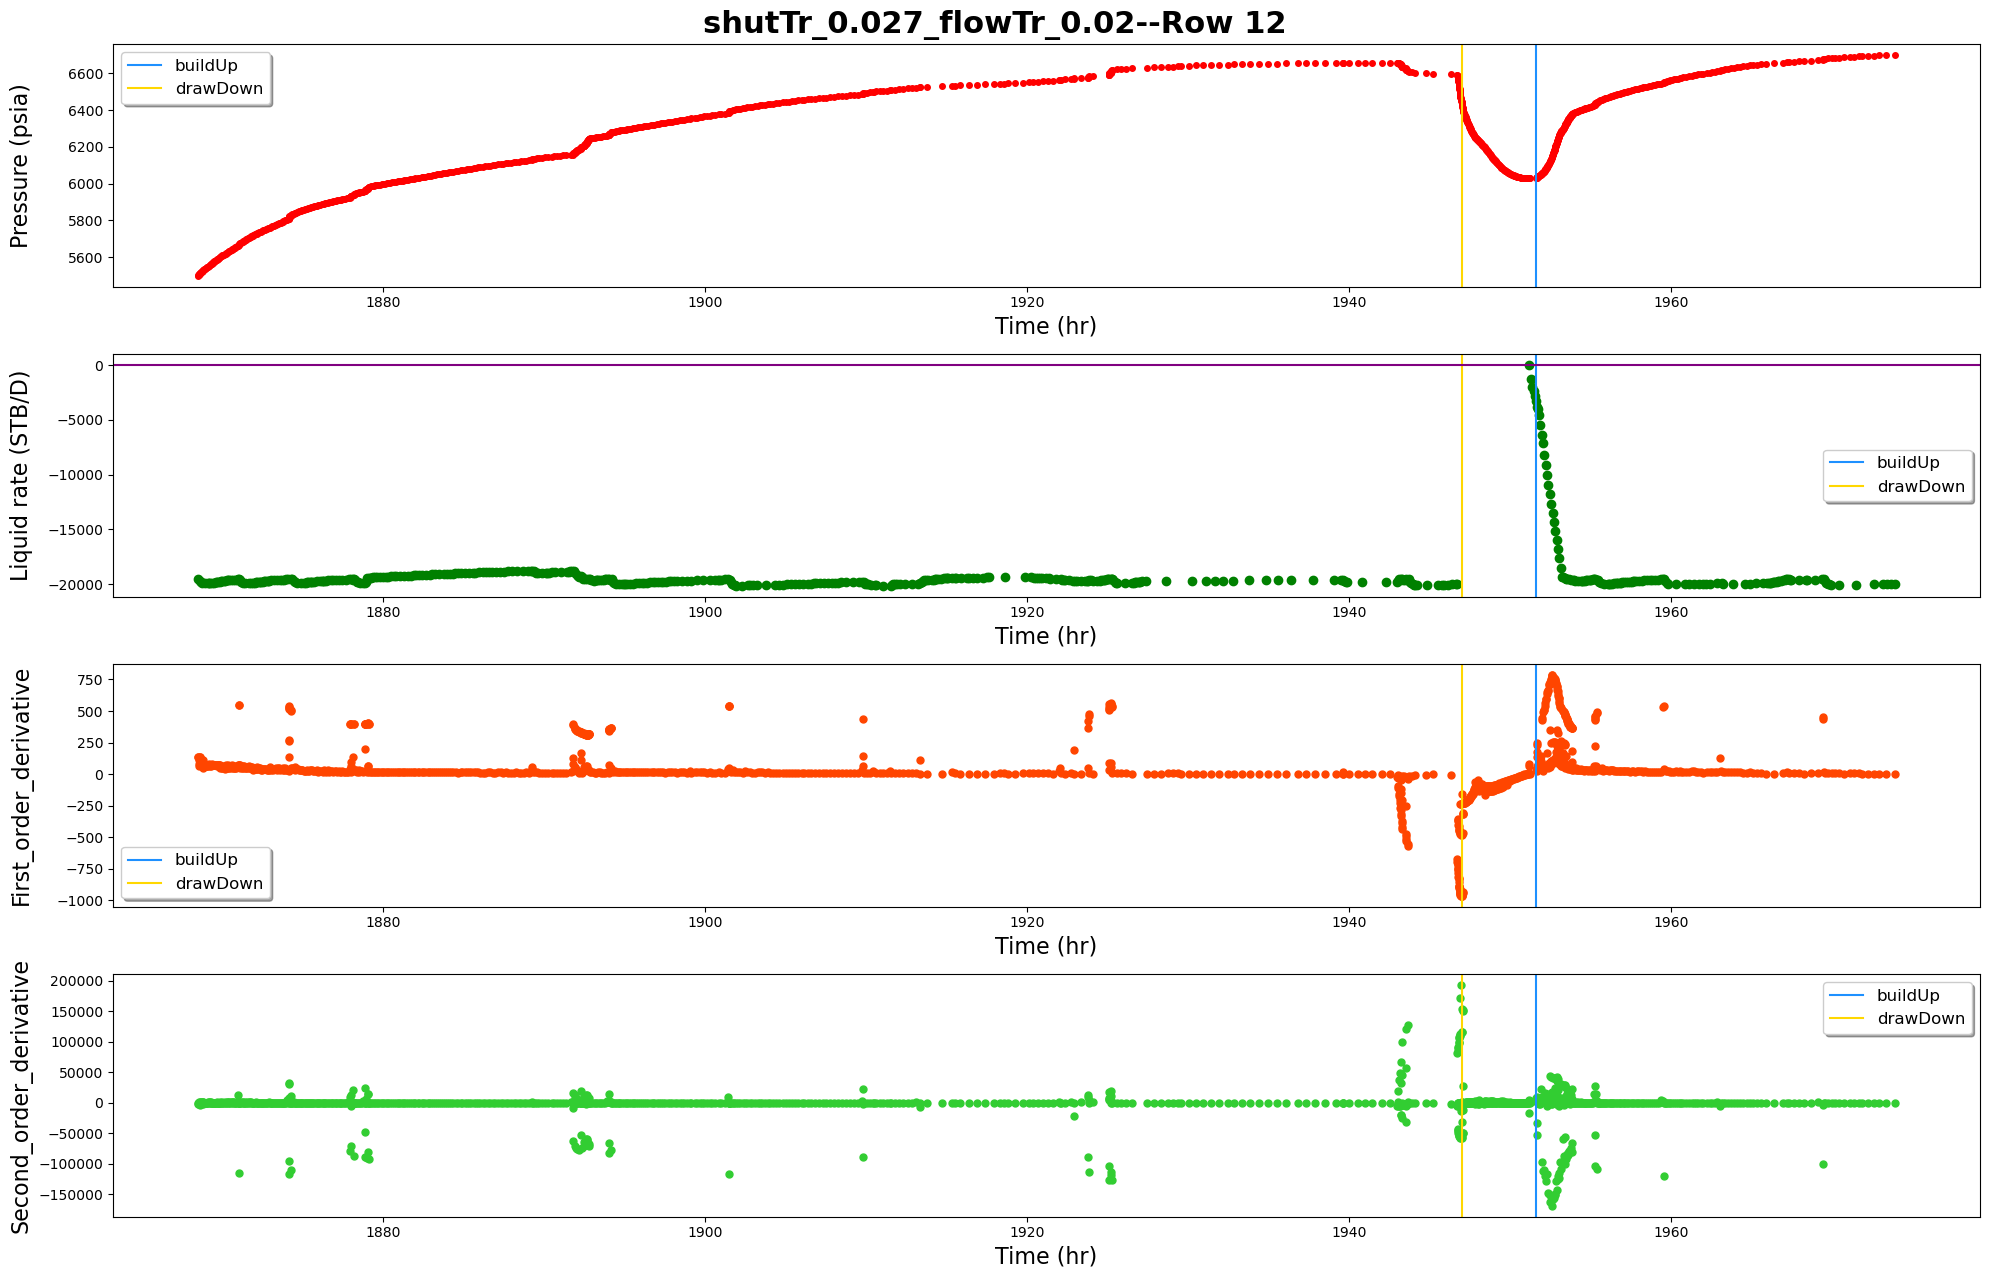

------row 13-----detected points:[14471, 14569, 14774, 15329]


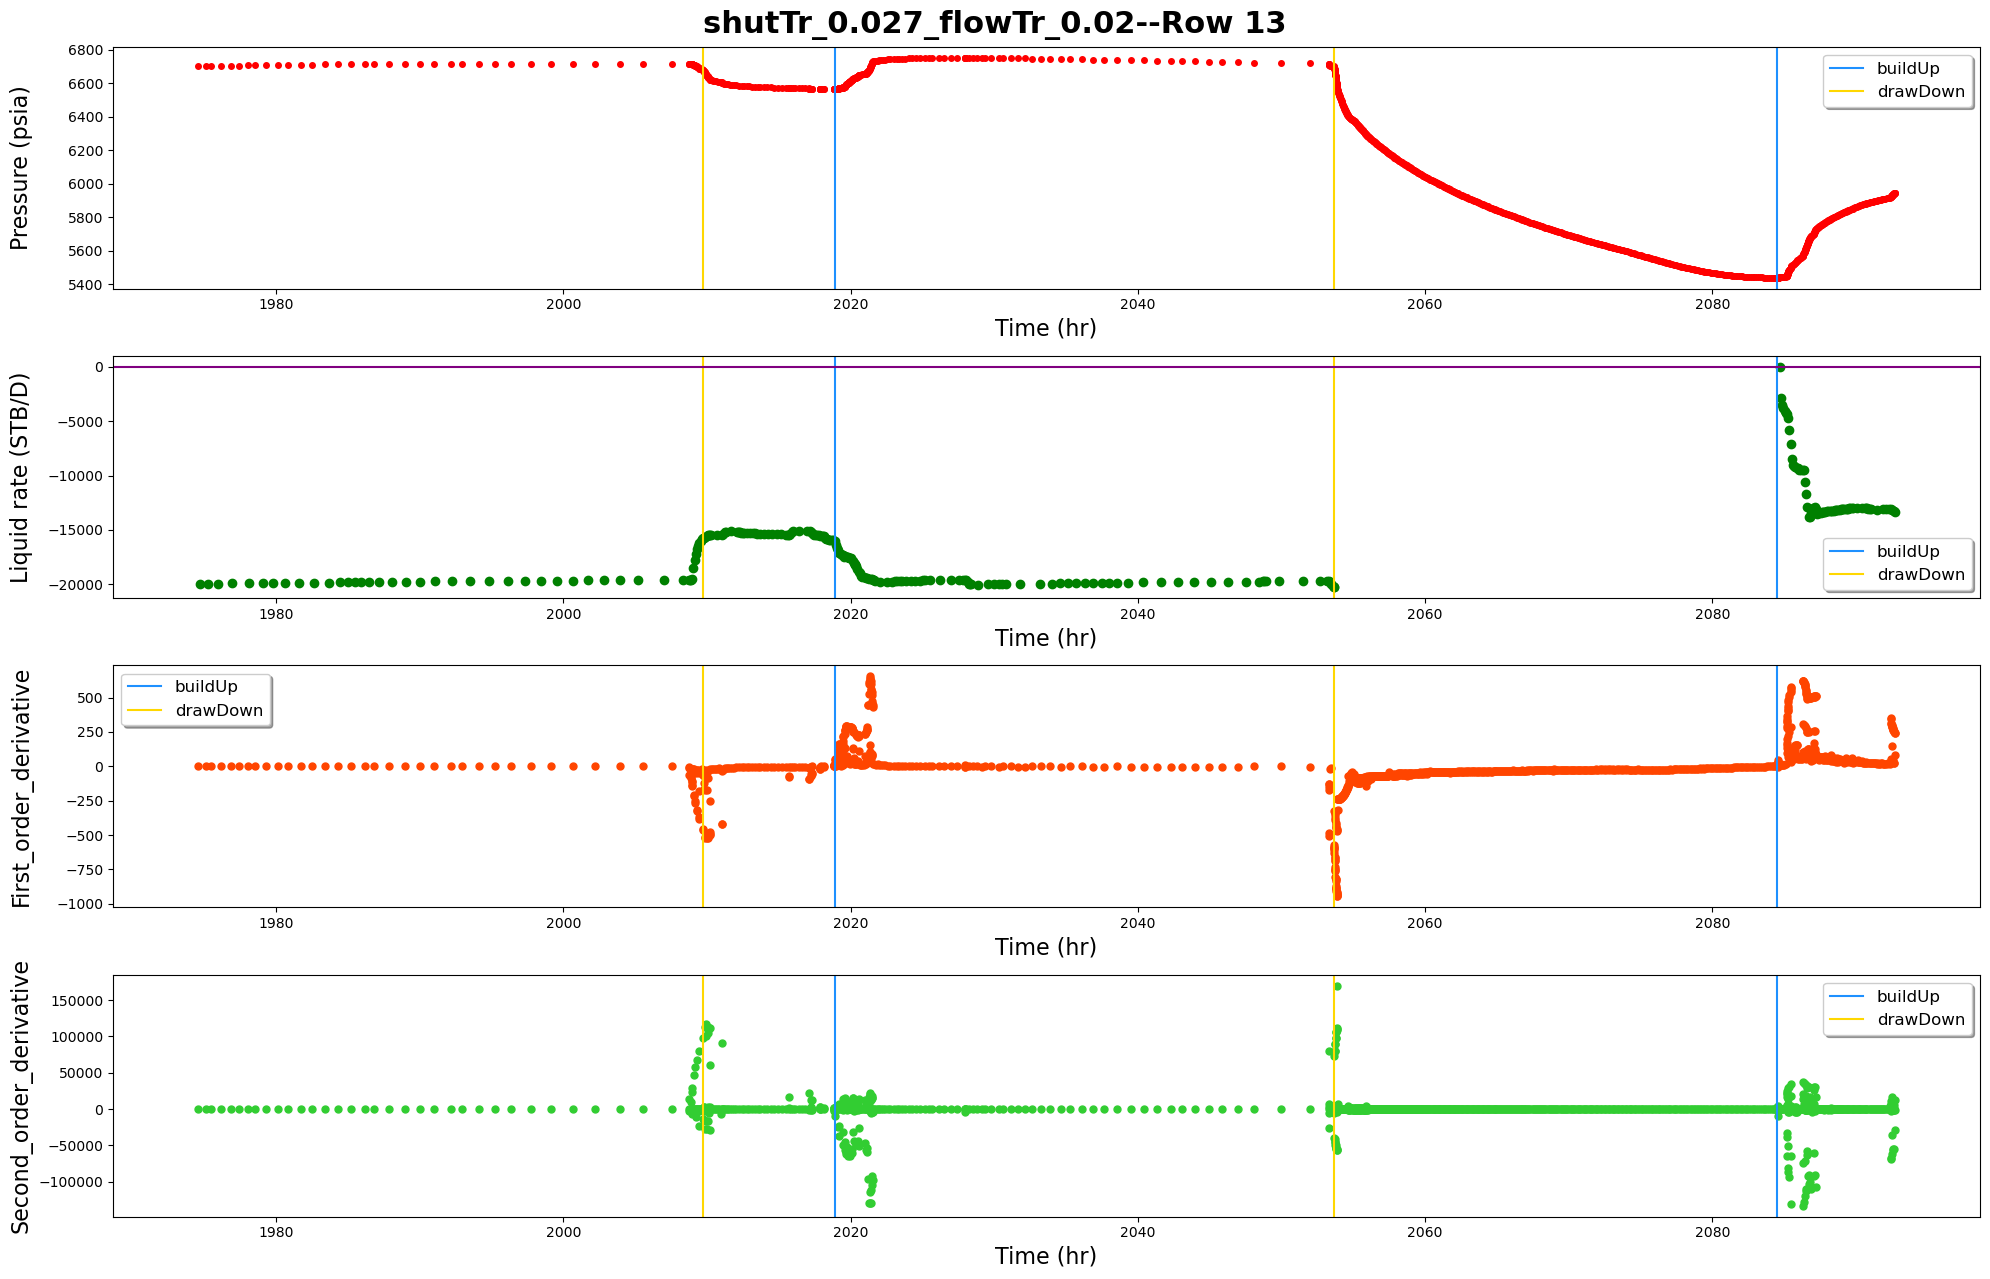

------row 14-----detected points:[16096, 16580]


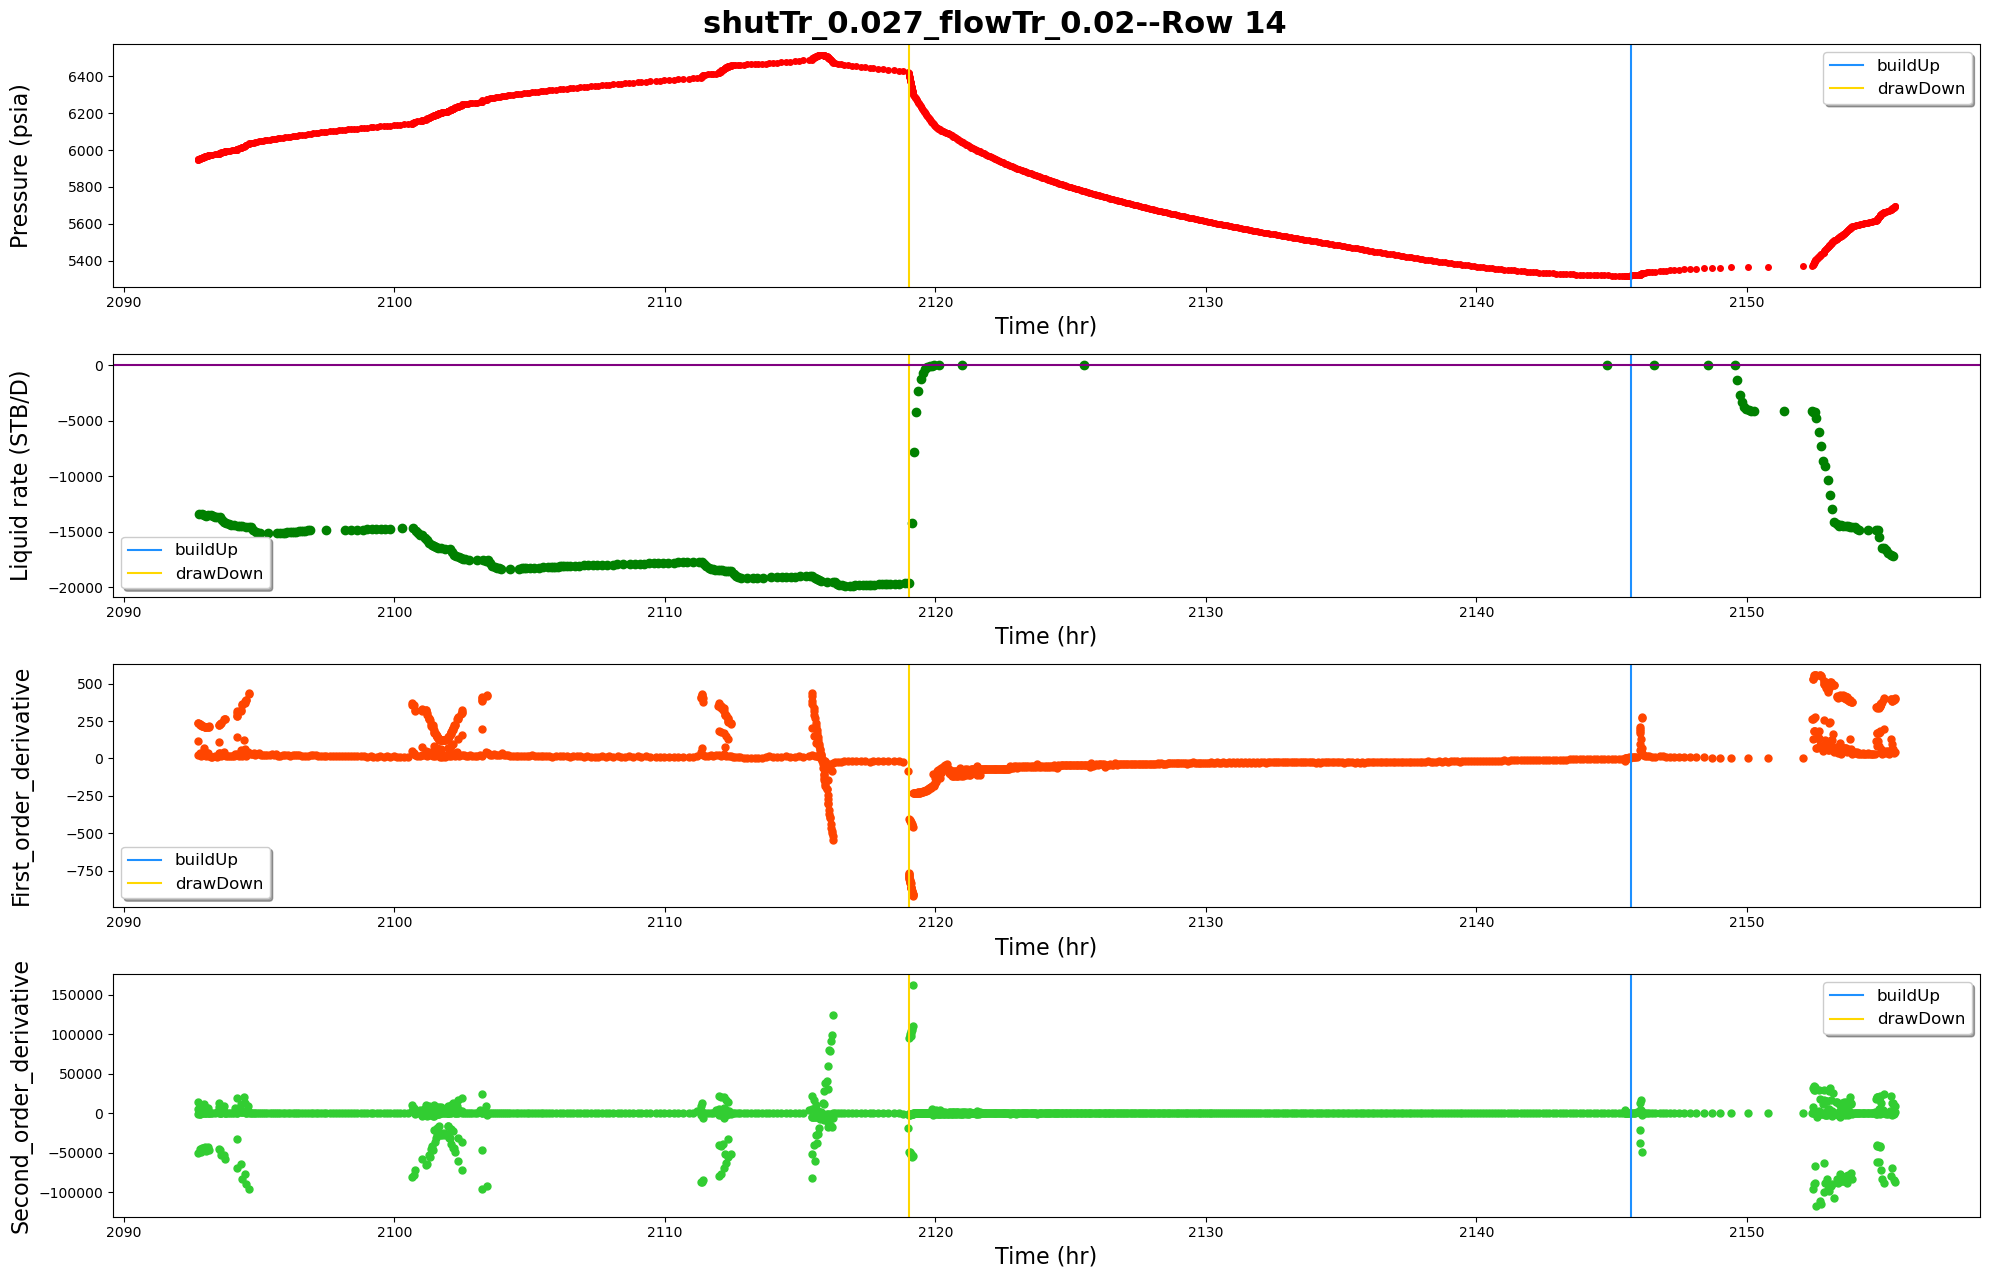

------row 15-----detected points:[17589]


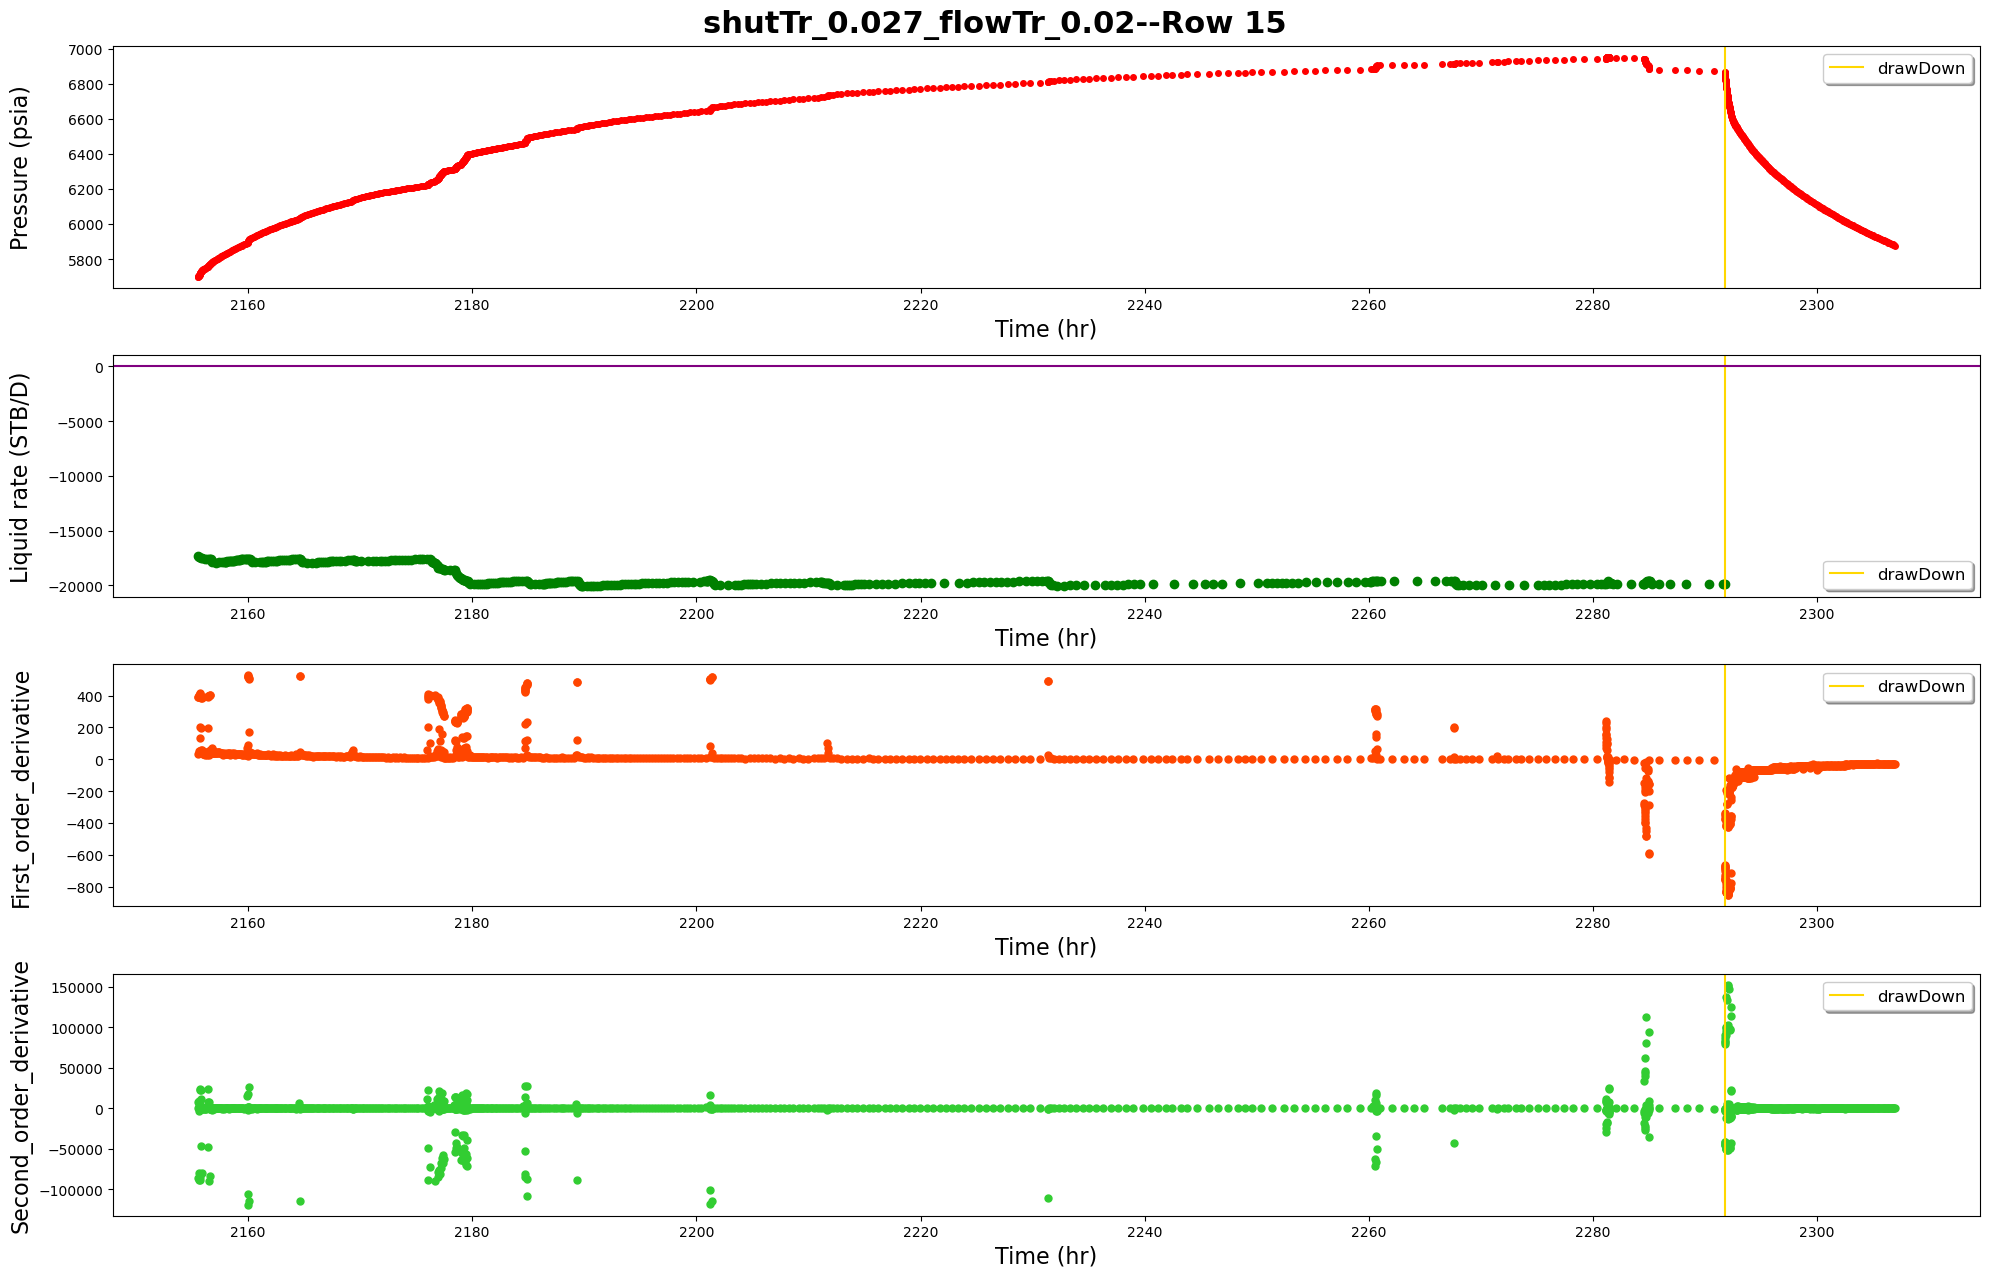

------row 16-----detected points:[18433]


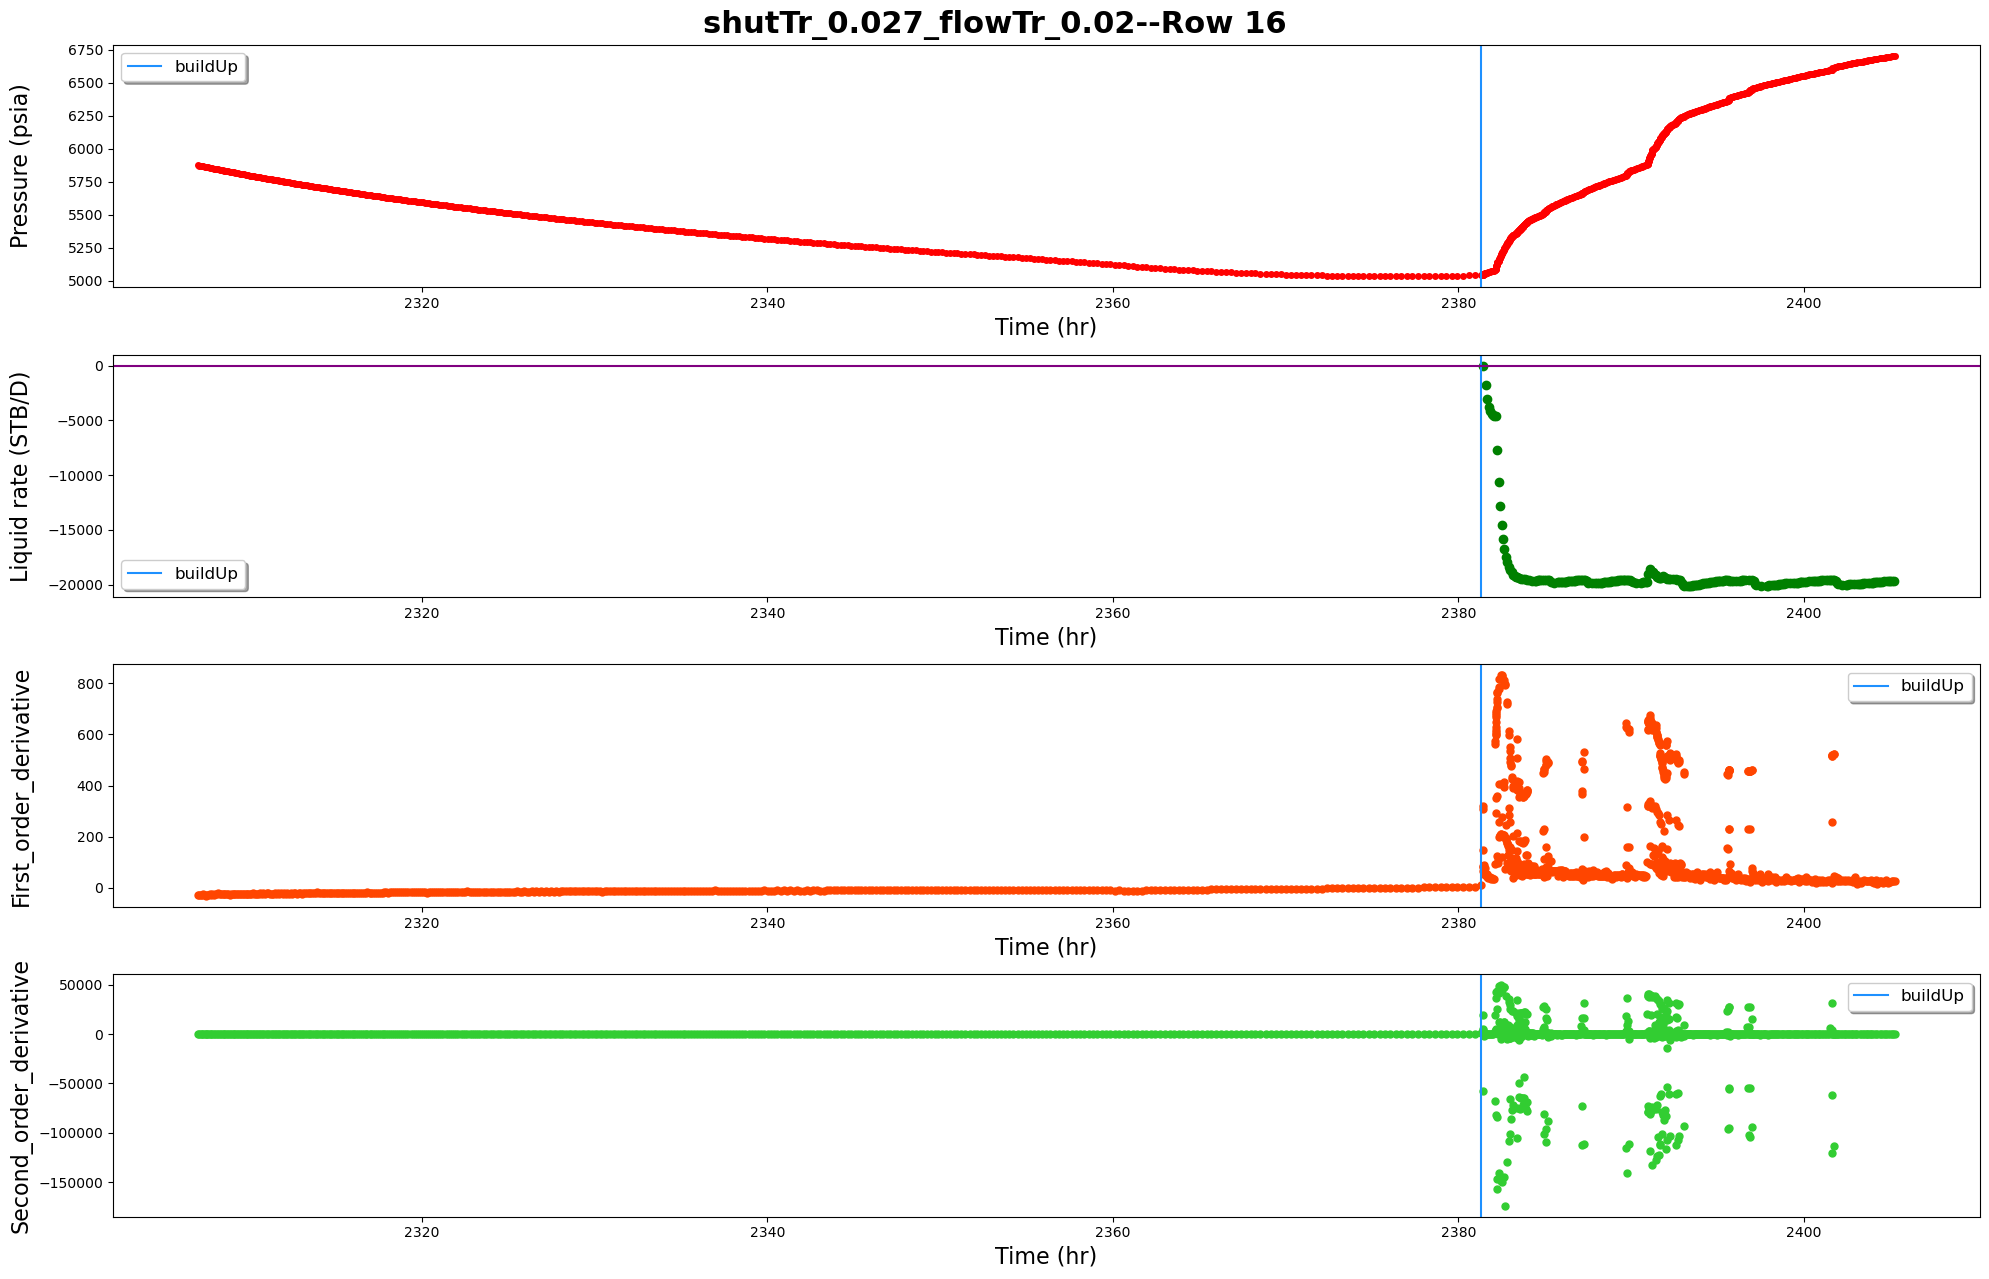

------row 17-----detected points:[19642, 19765, 20035, 20333]


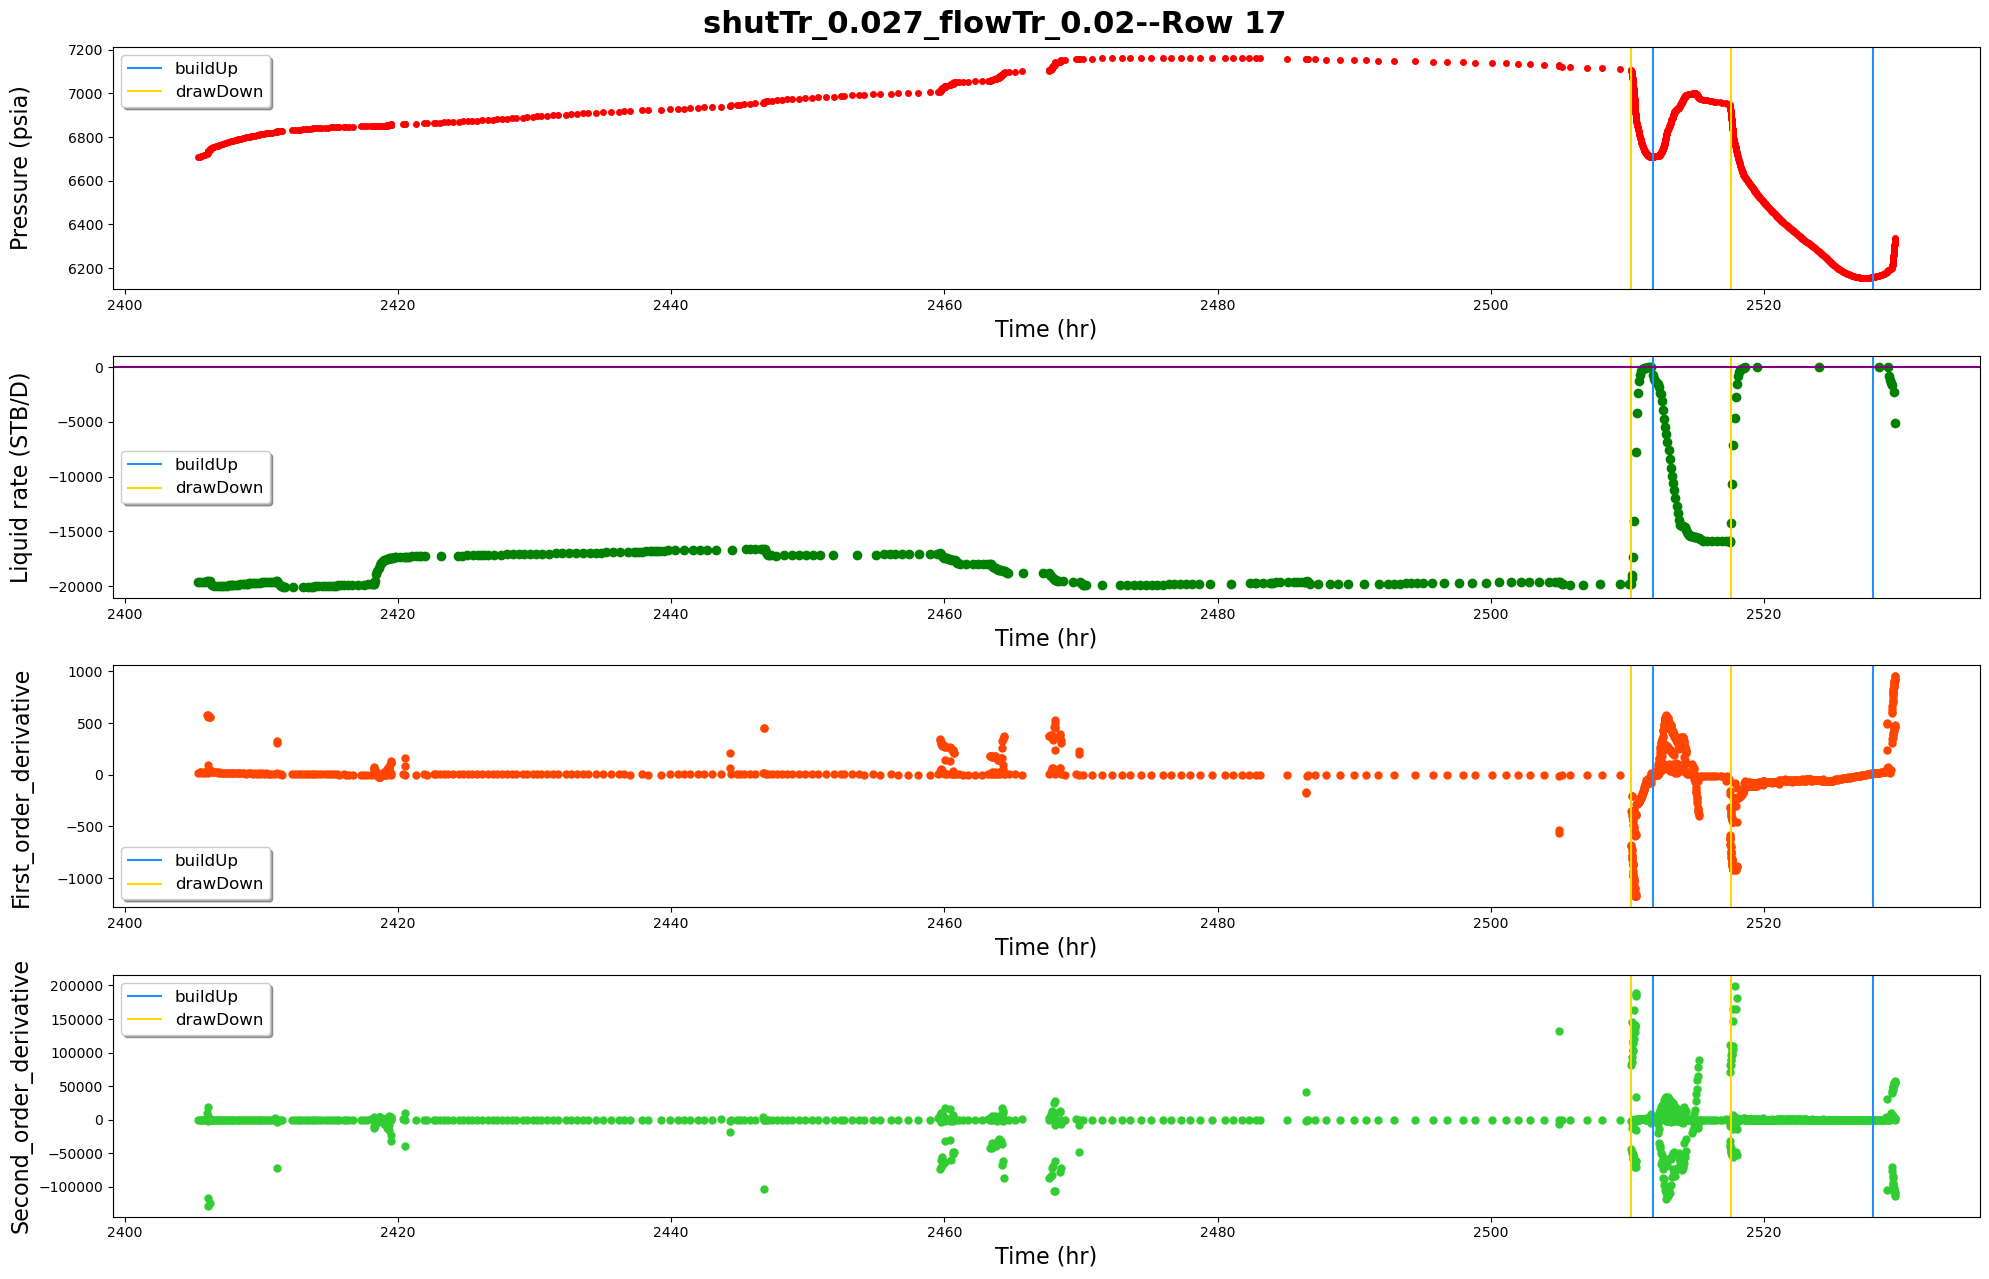

------row 18-----detected points:[20700, 21026]


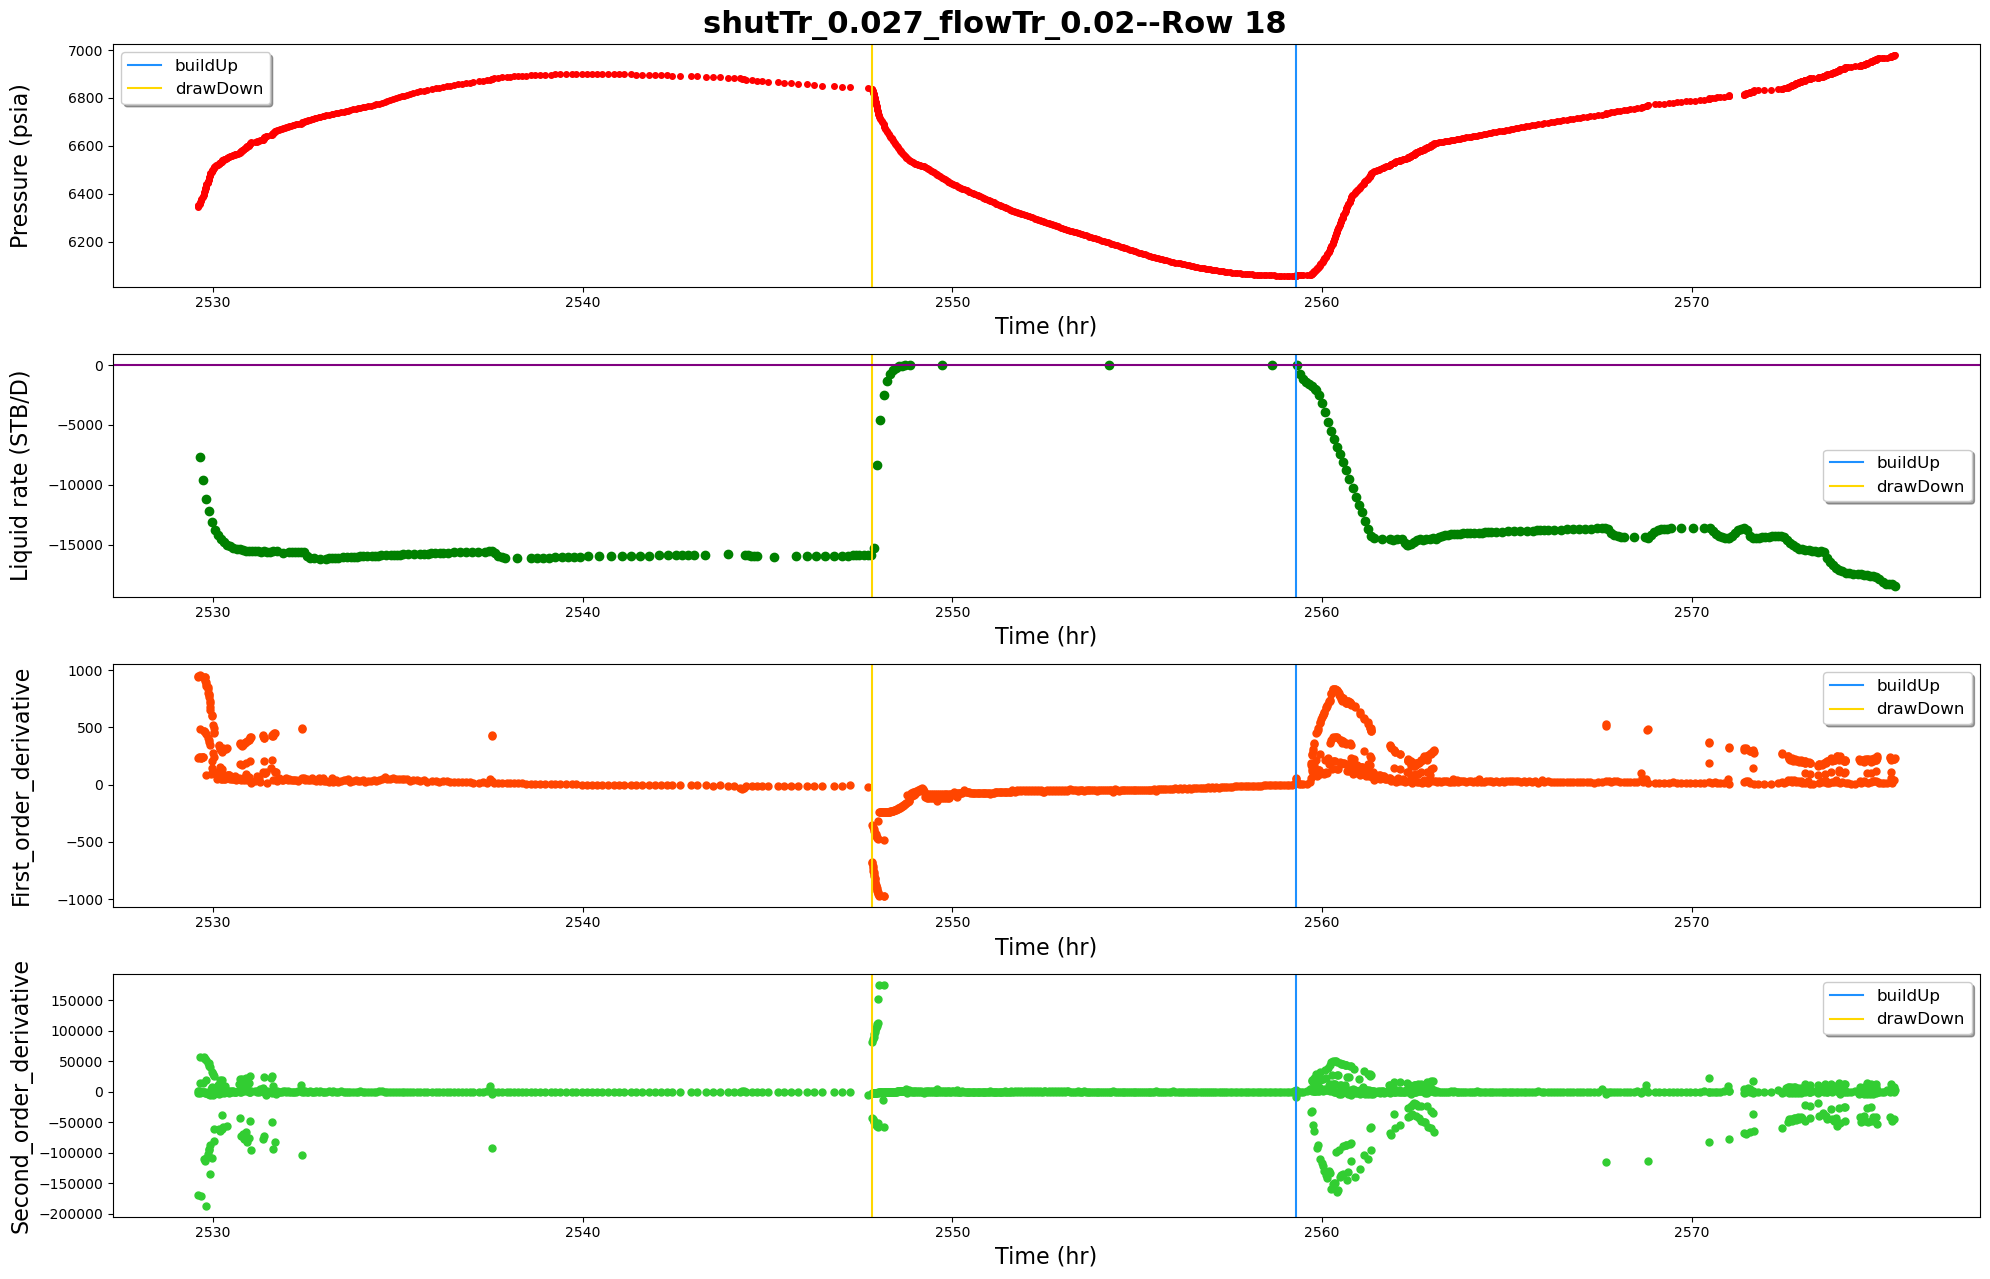

------row 19-----detected points:[21974, 22181, 22709]


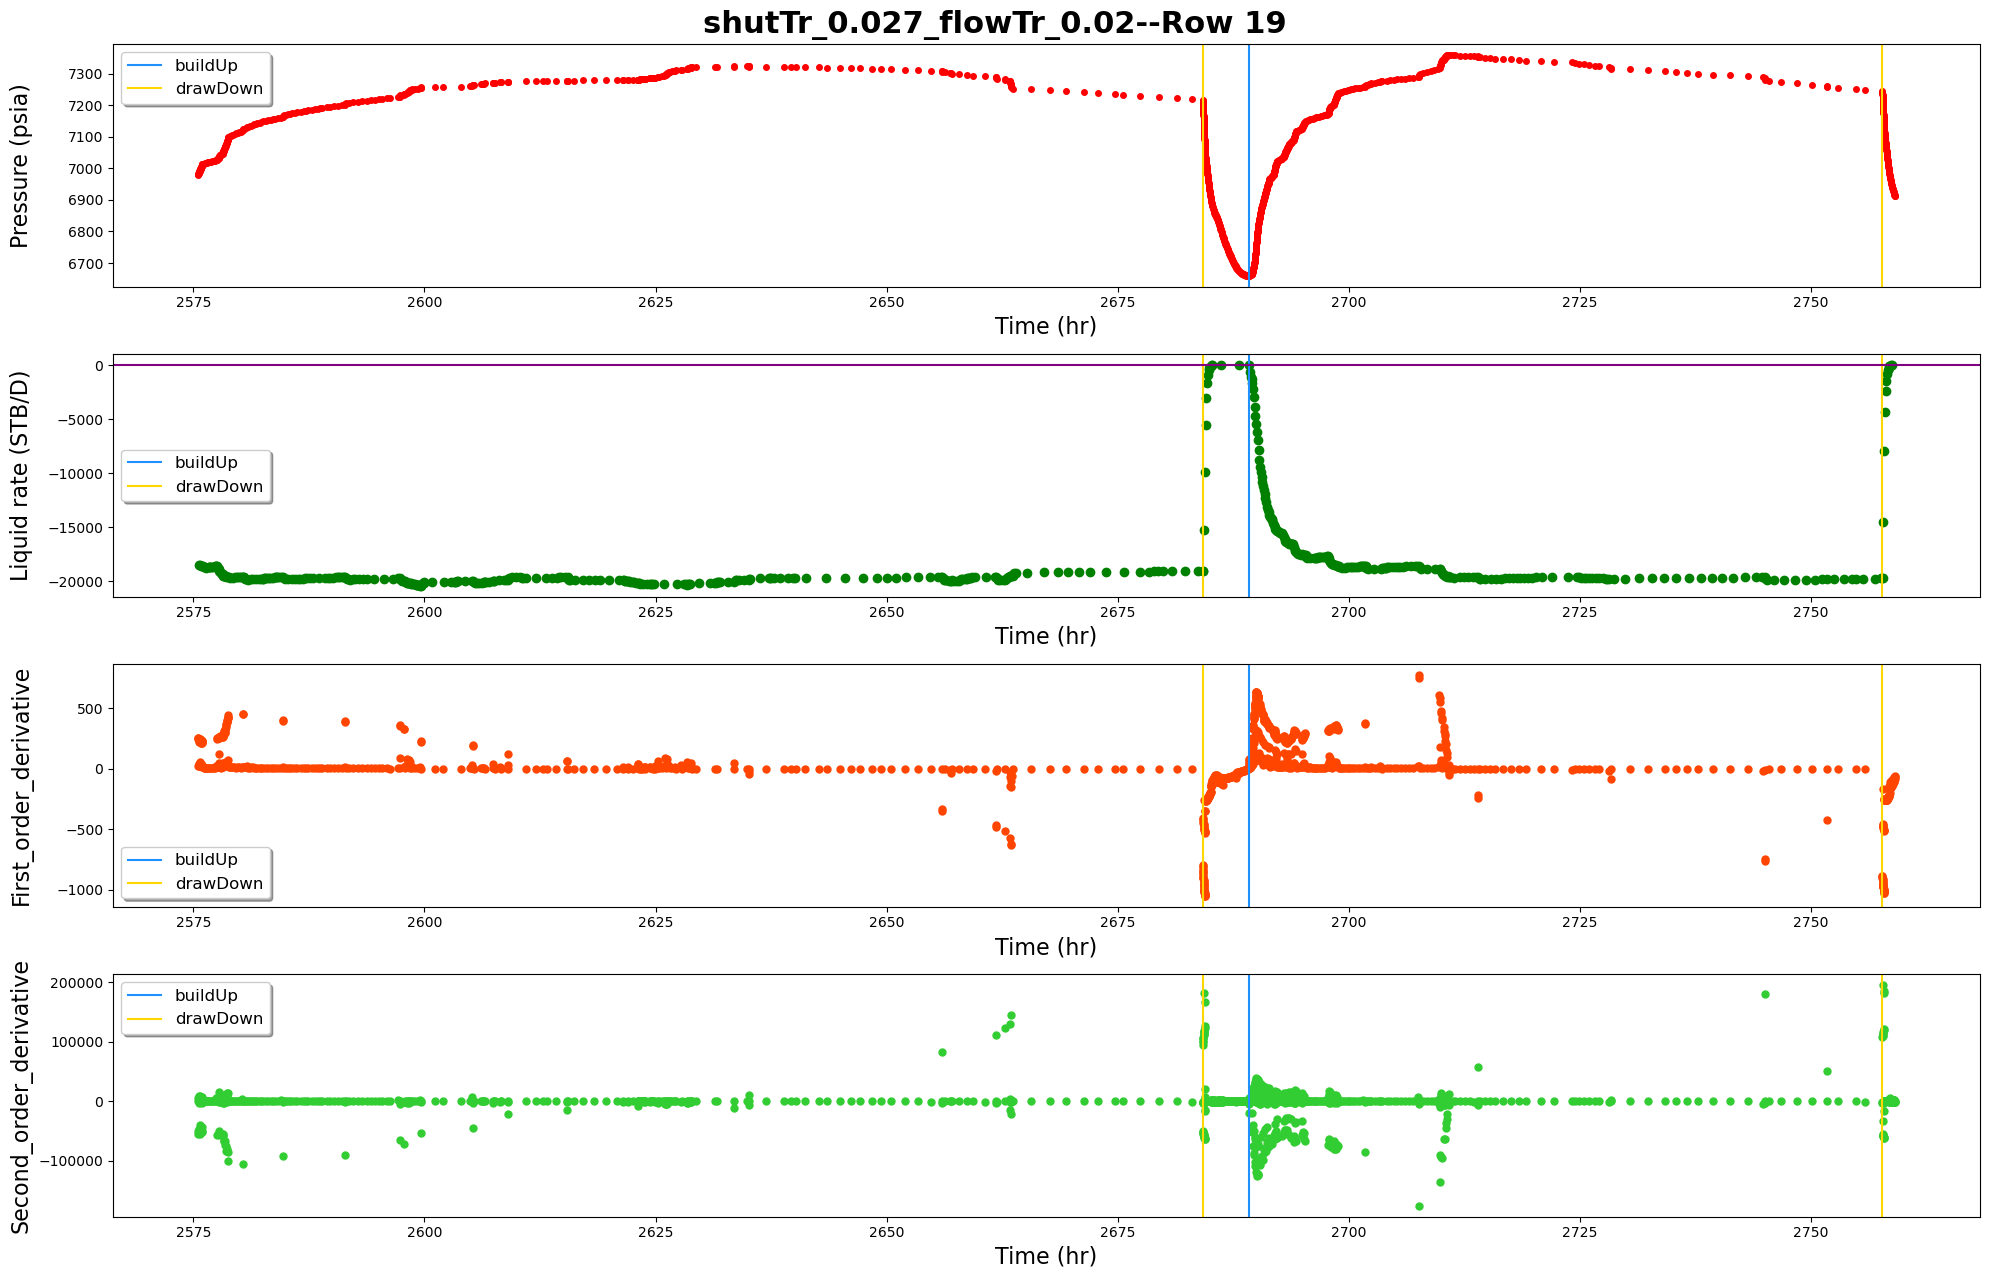

------row 20-----detected points:[23219]


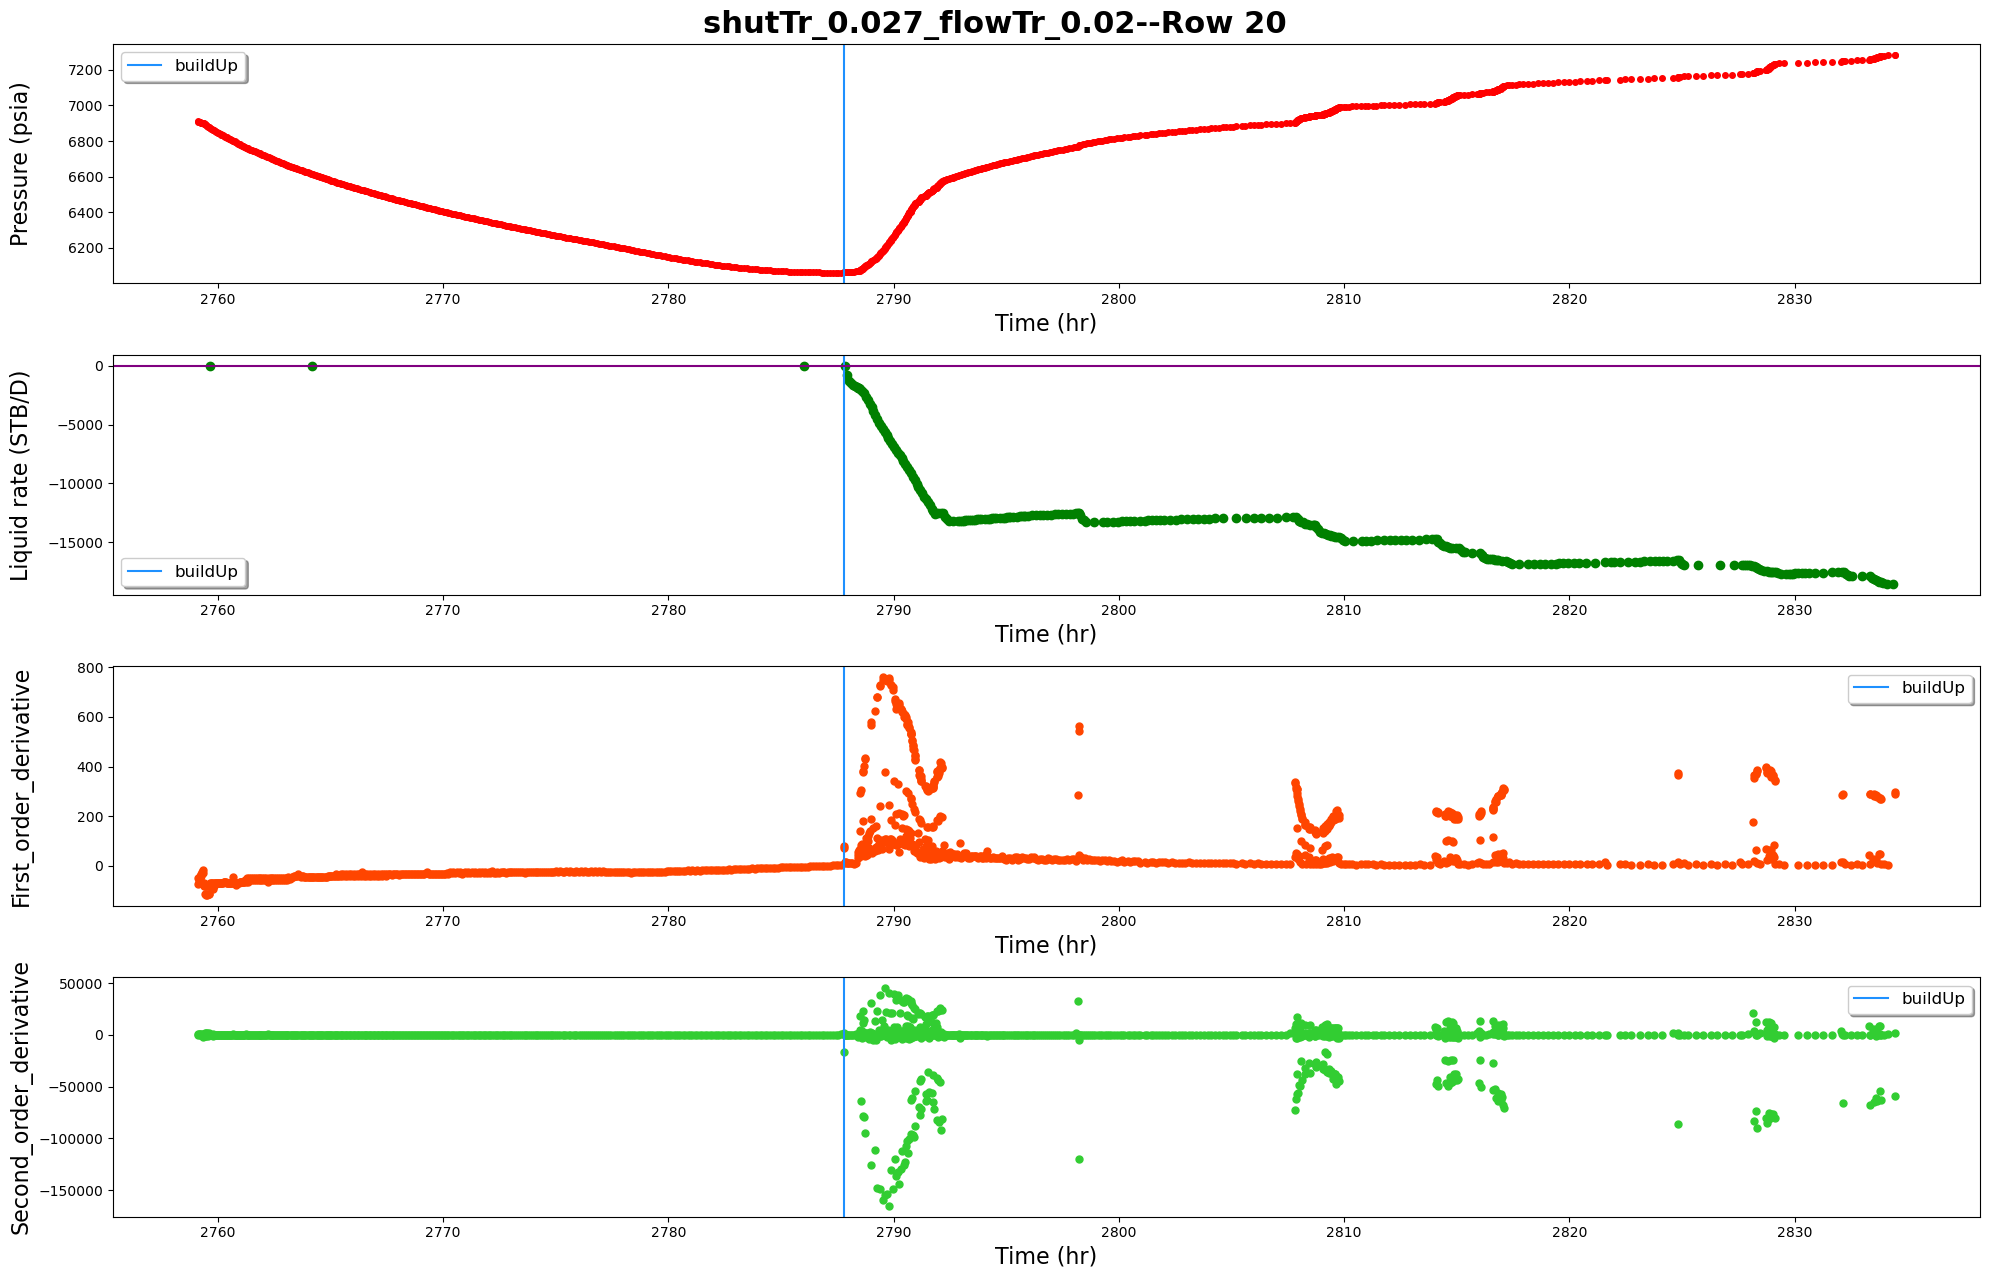

------row 21-----detected points:[24215, 24683]


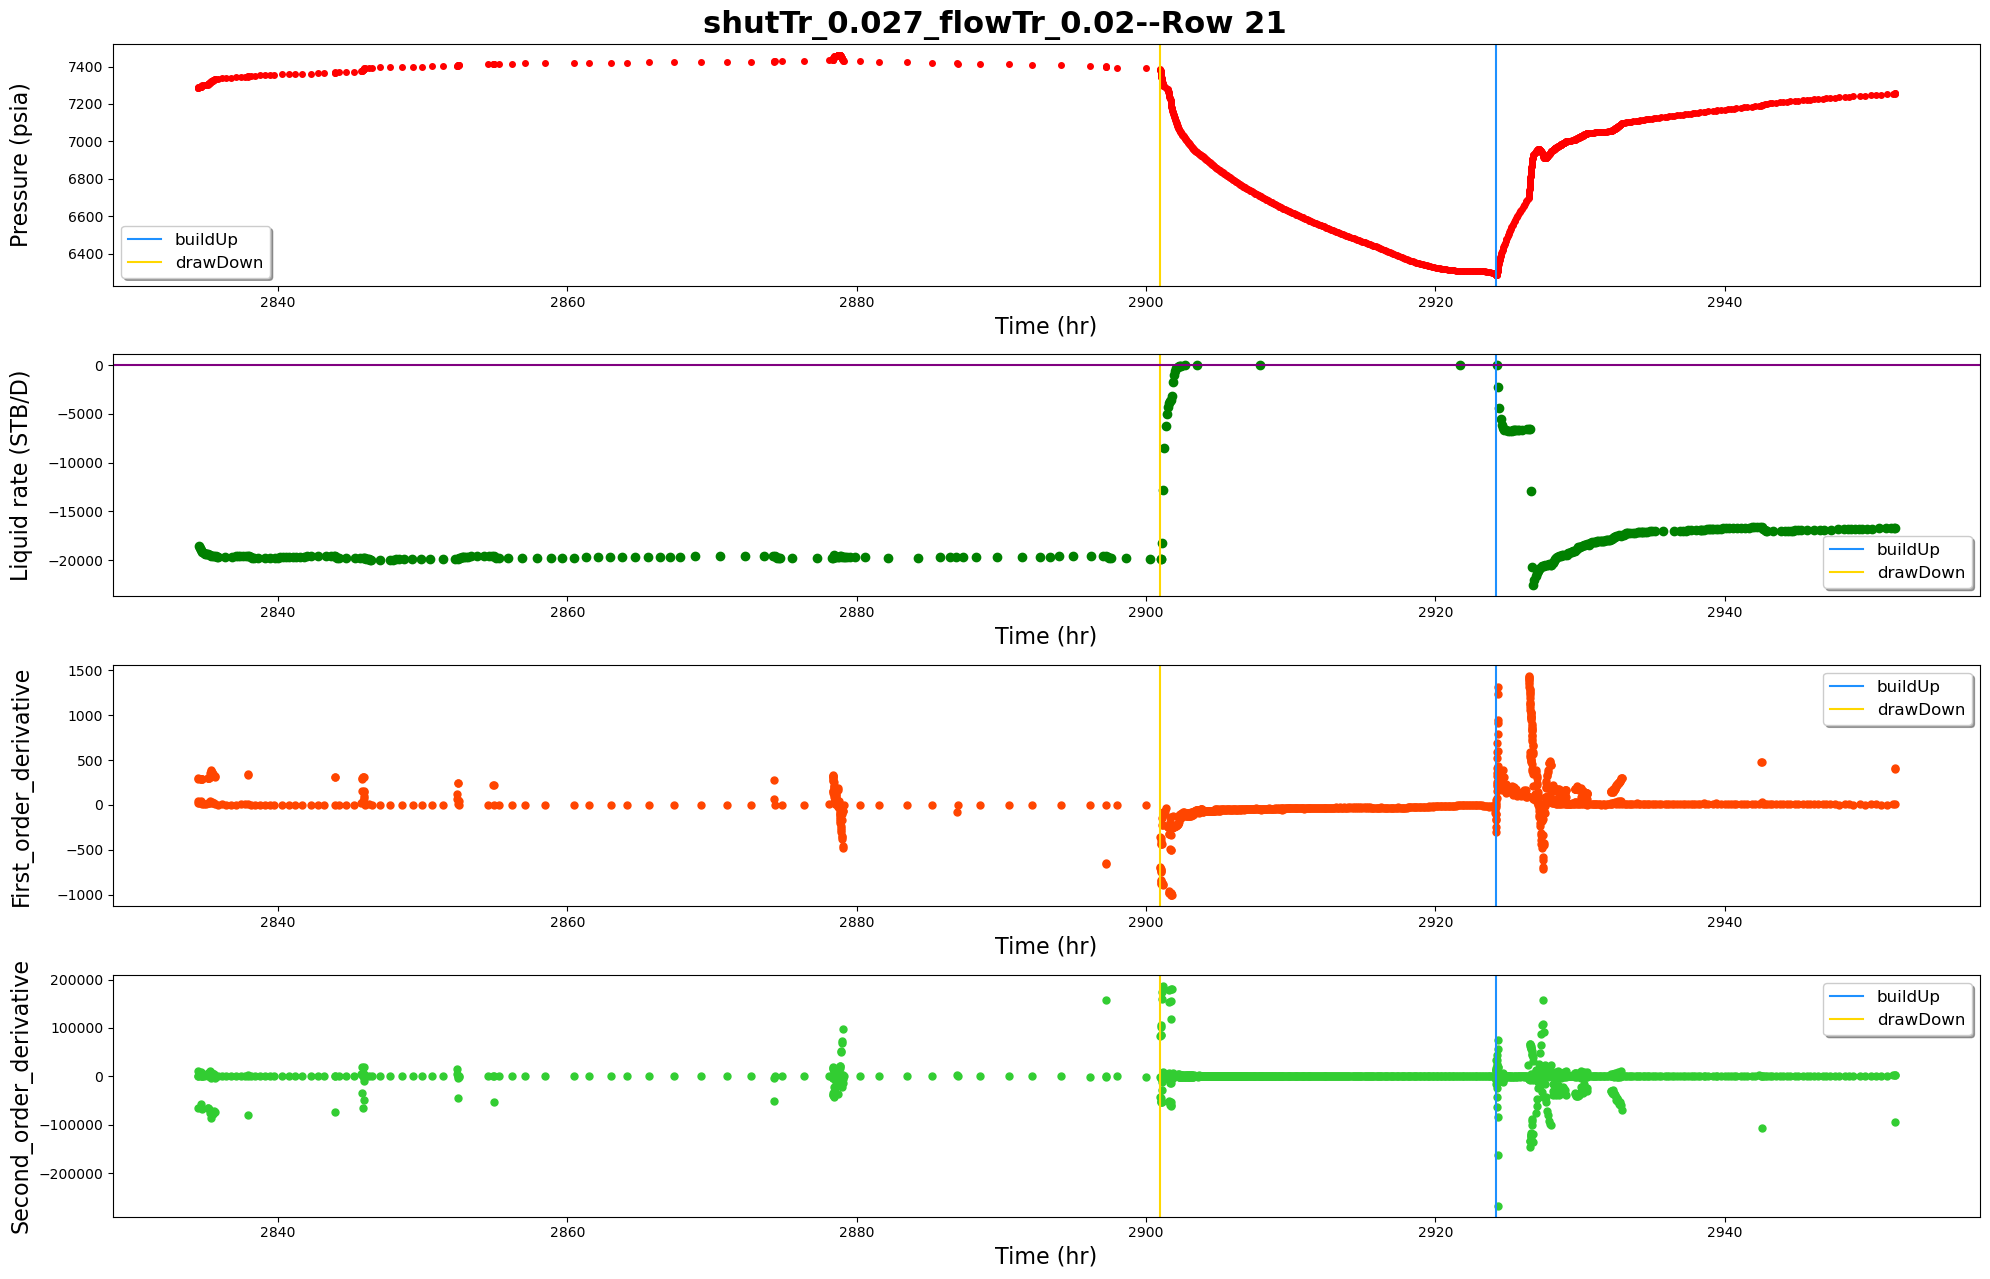

------row 22-----detected points:[25768, 25992]


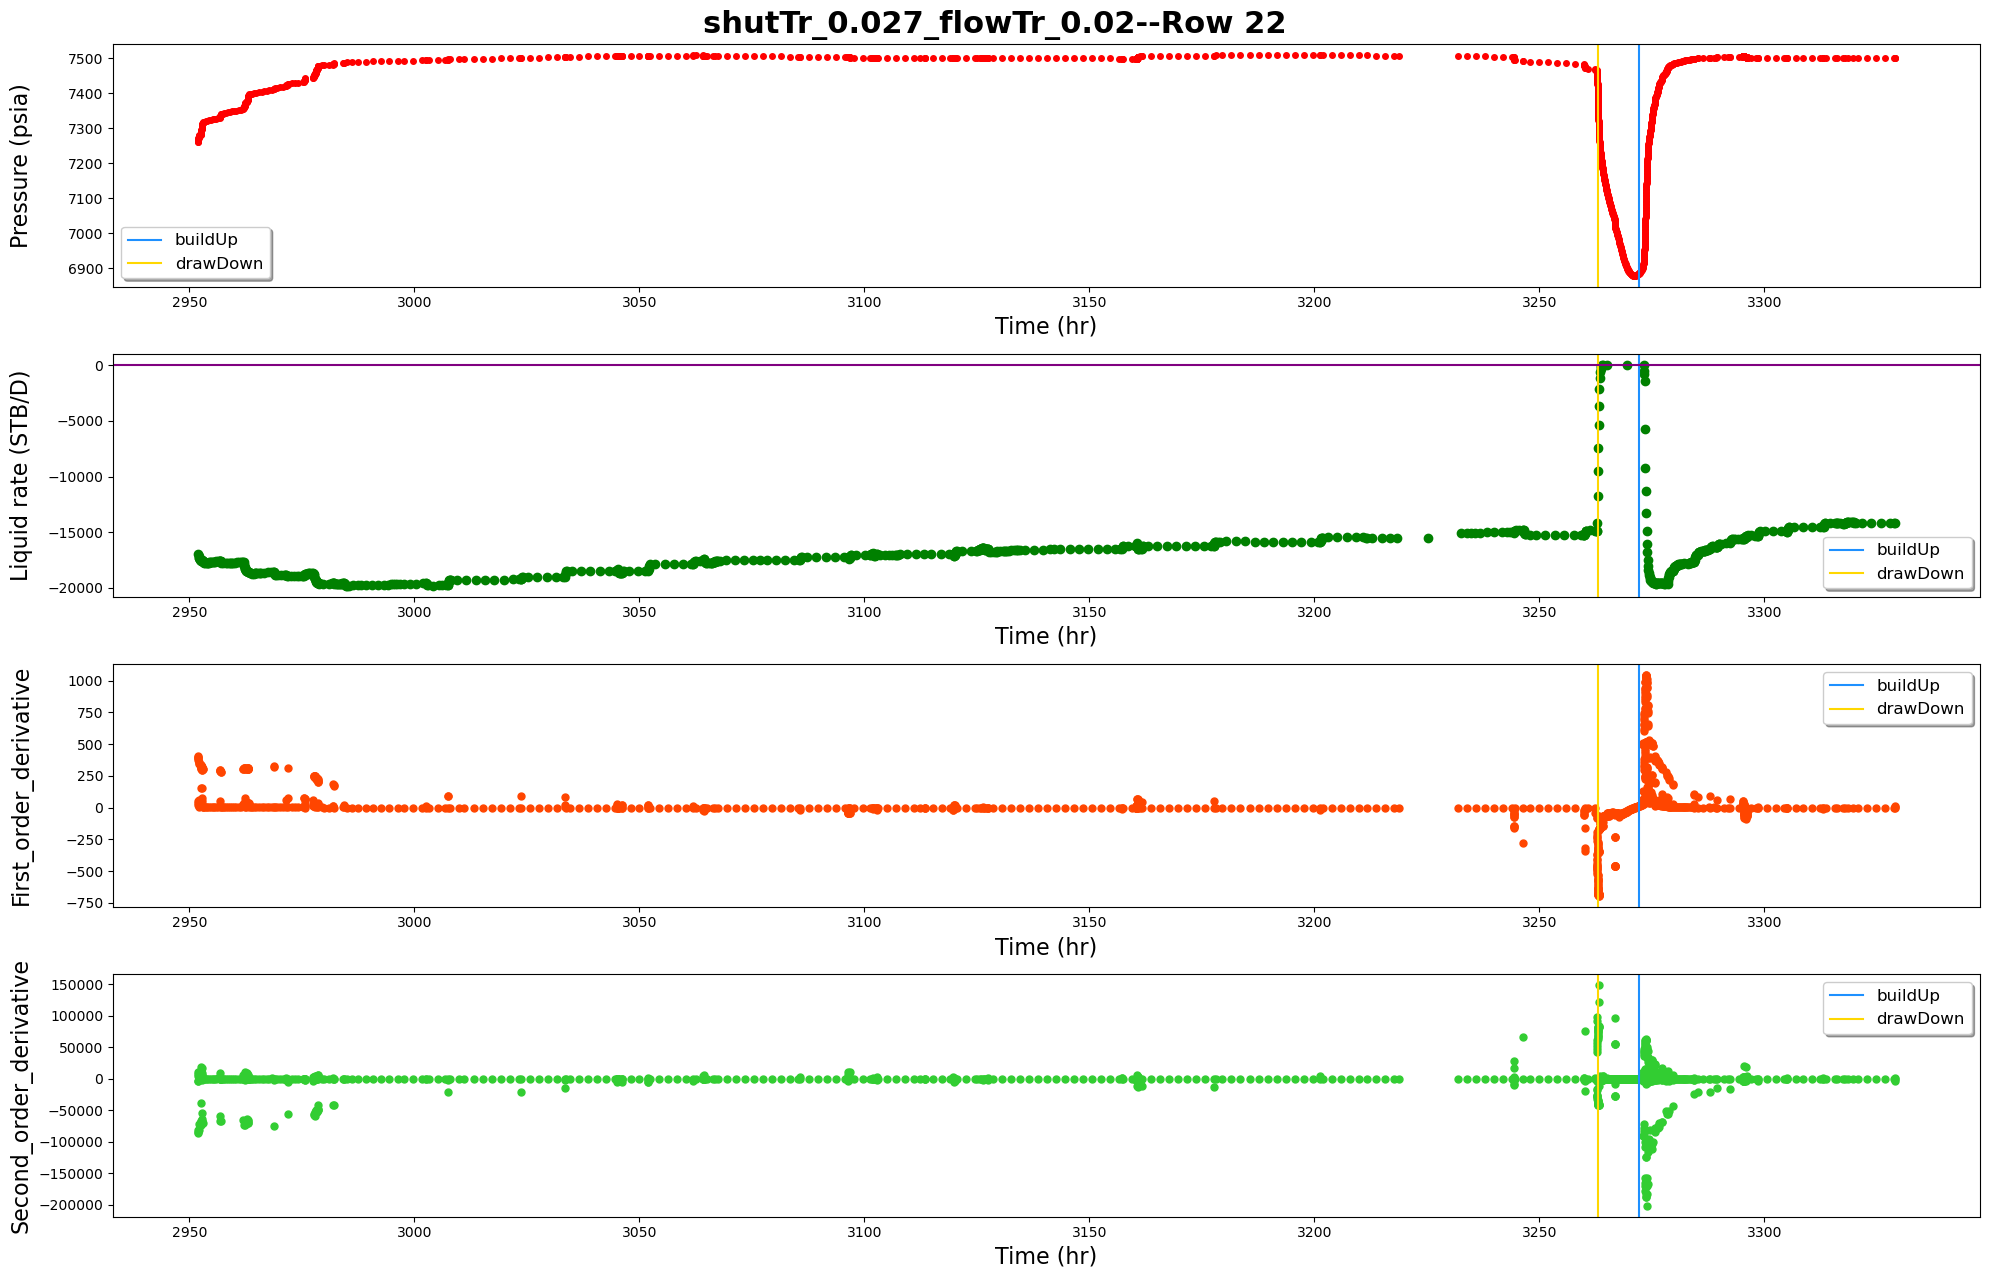

------row 23-----detected points:[26711, 26763, 27025, 27315]


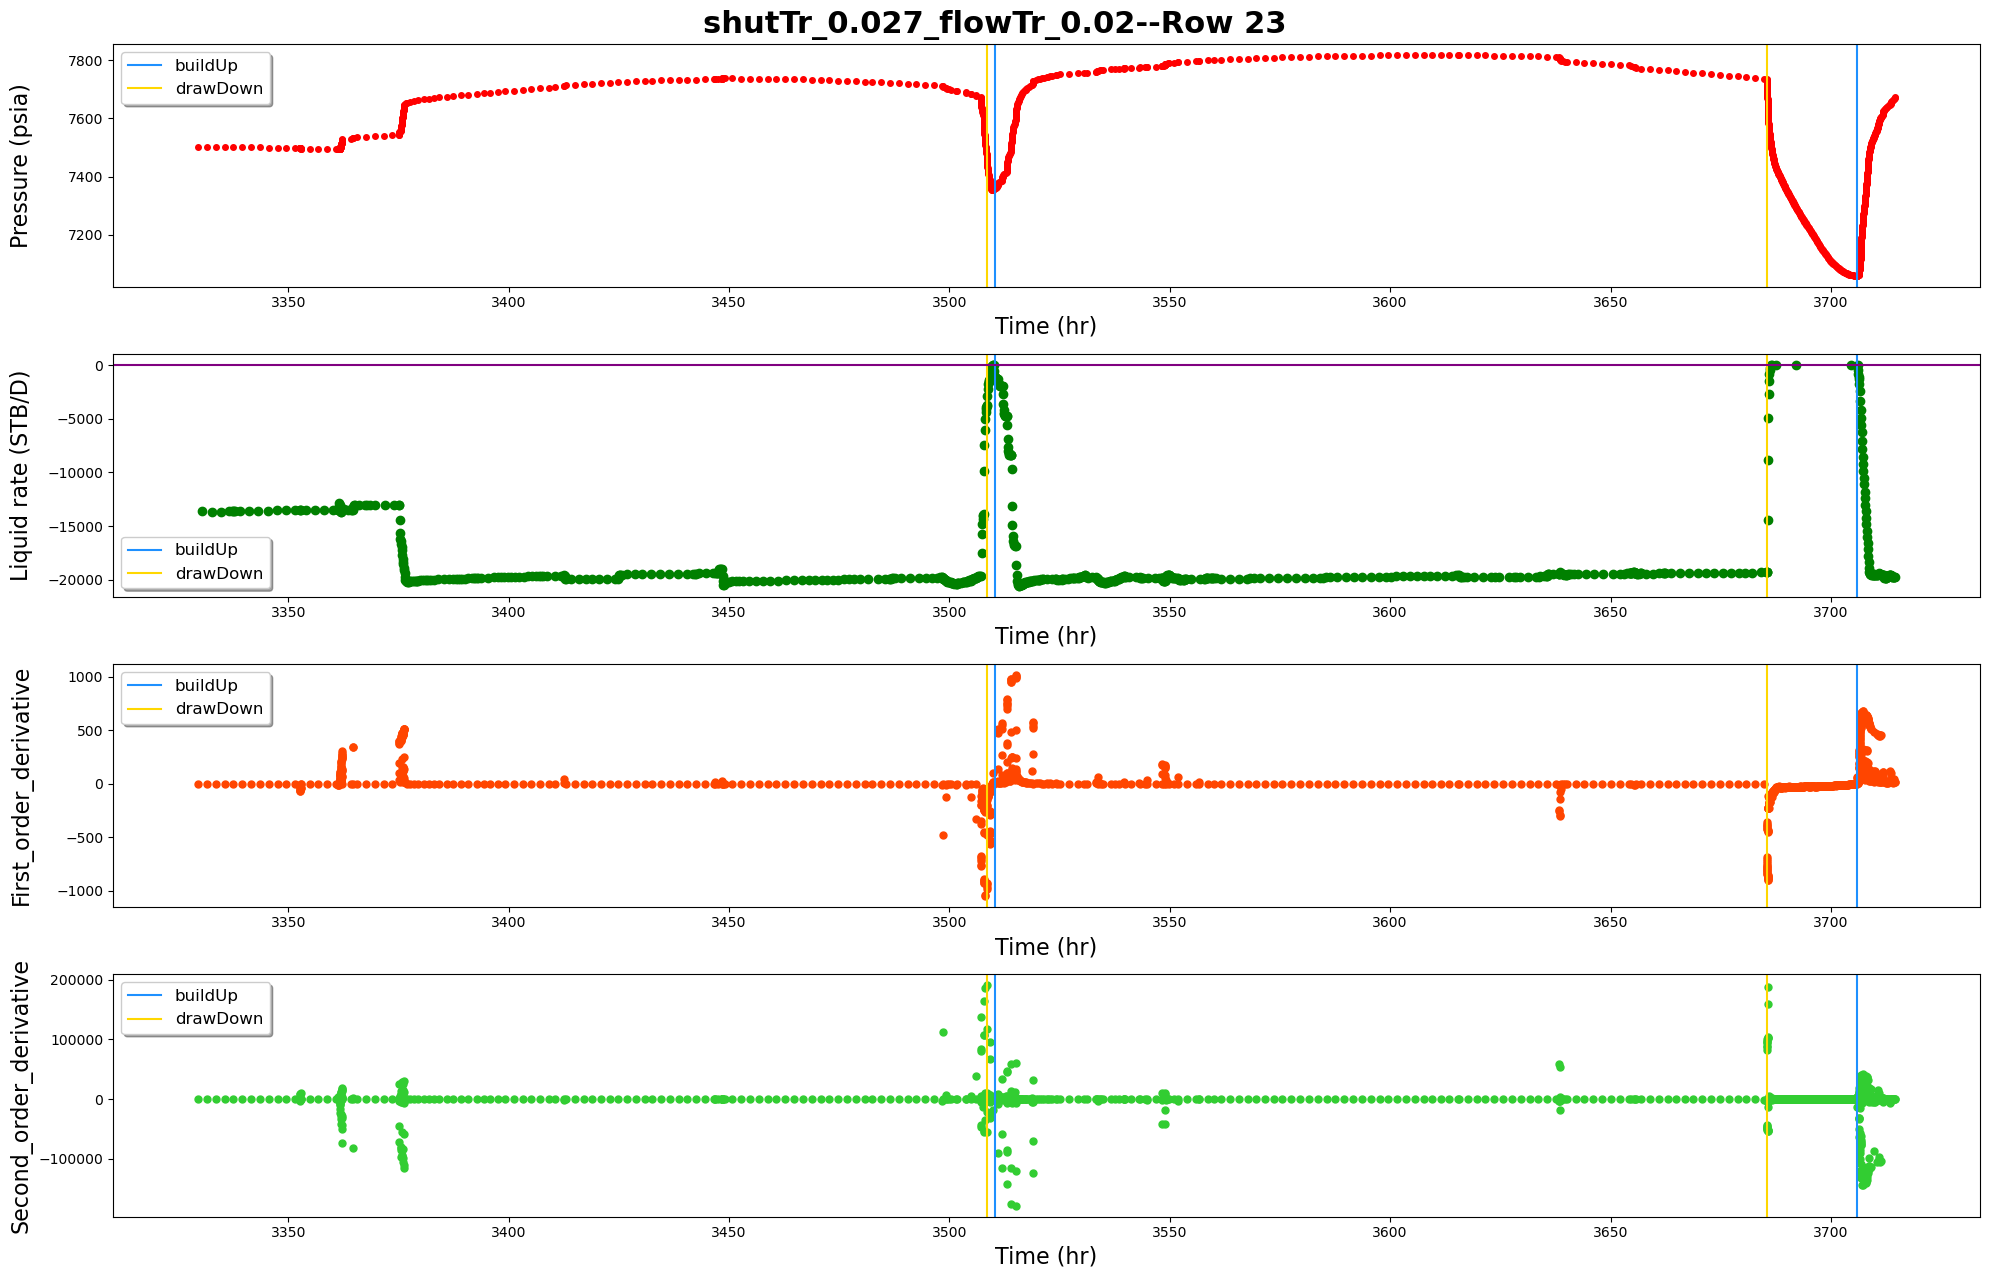

------row 24-----detected points:[27778, 27962, 28302, 28493]


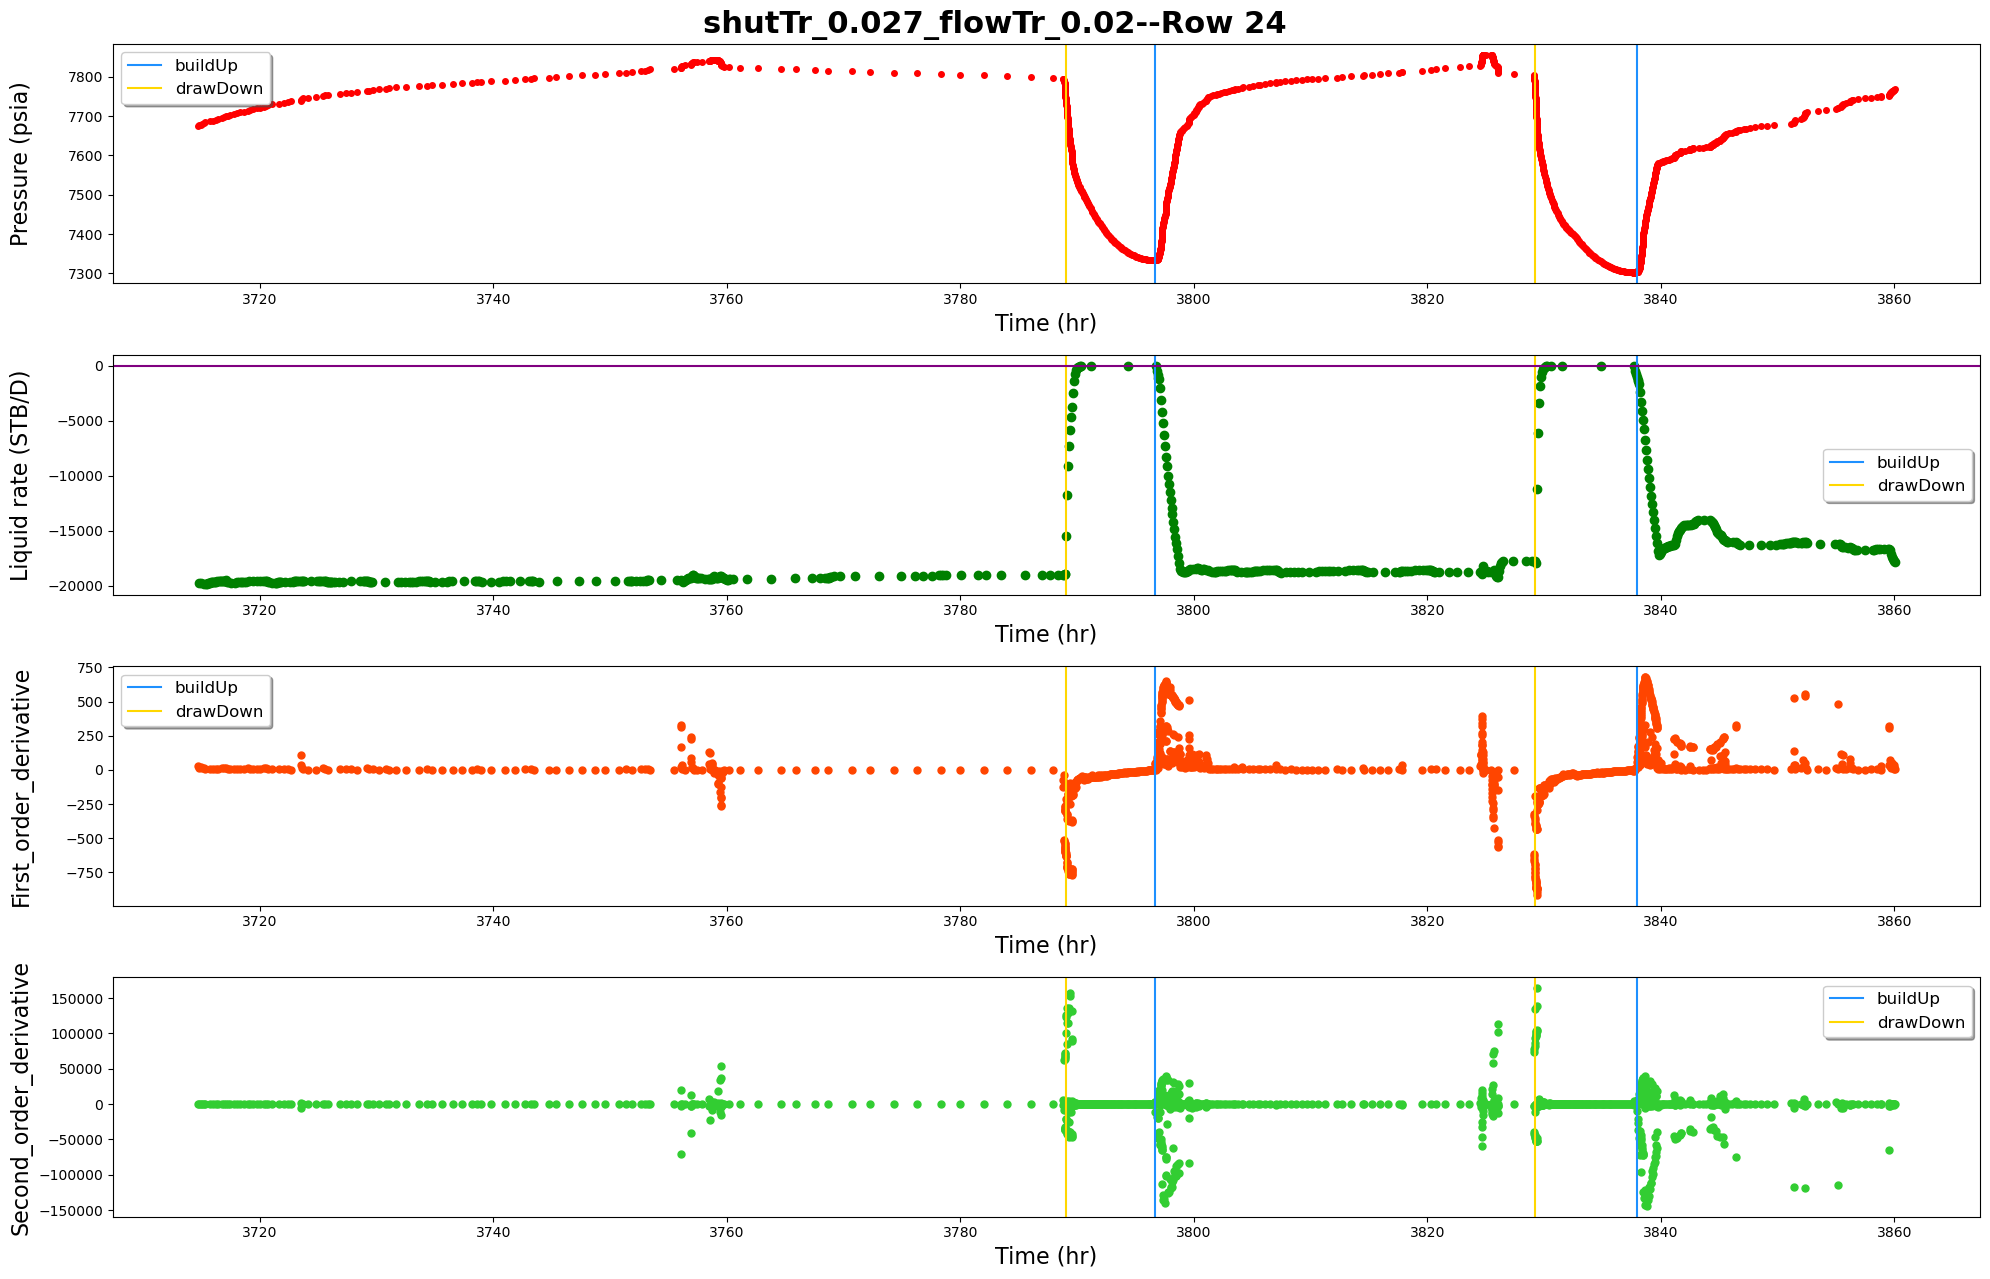

------row 25-----detected points:[28894, 29109]


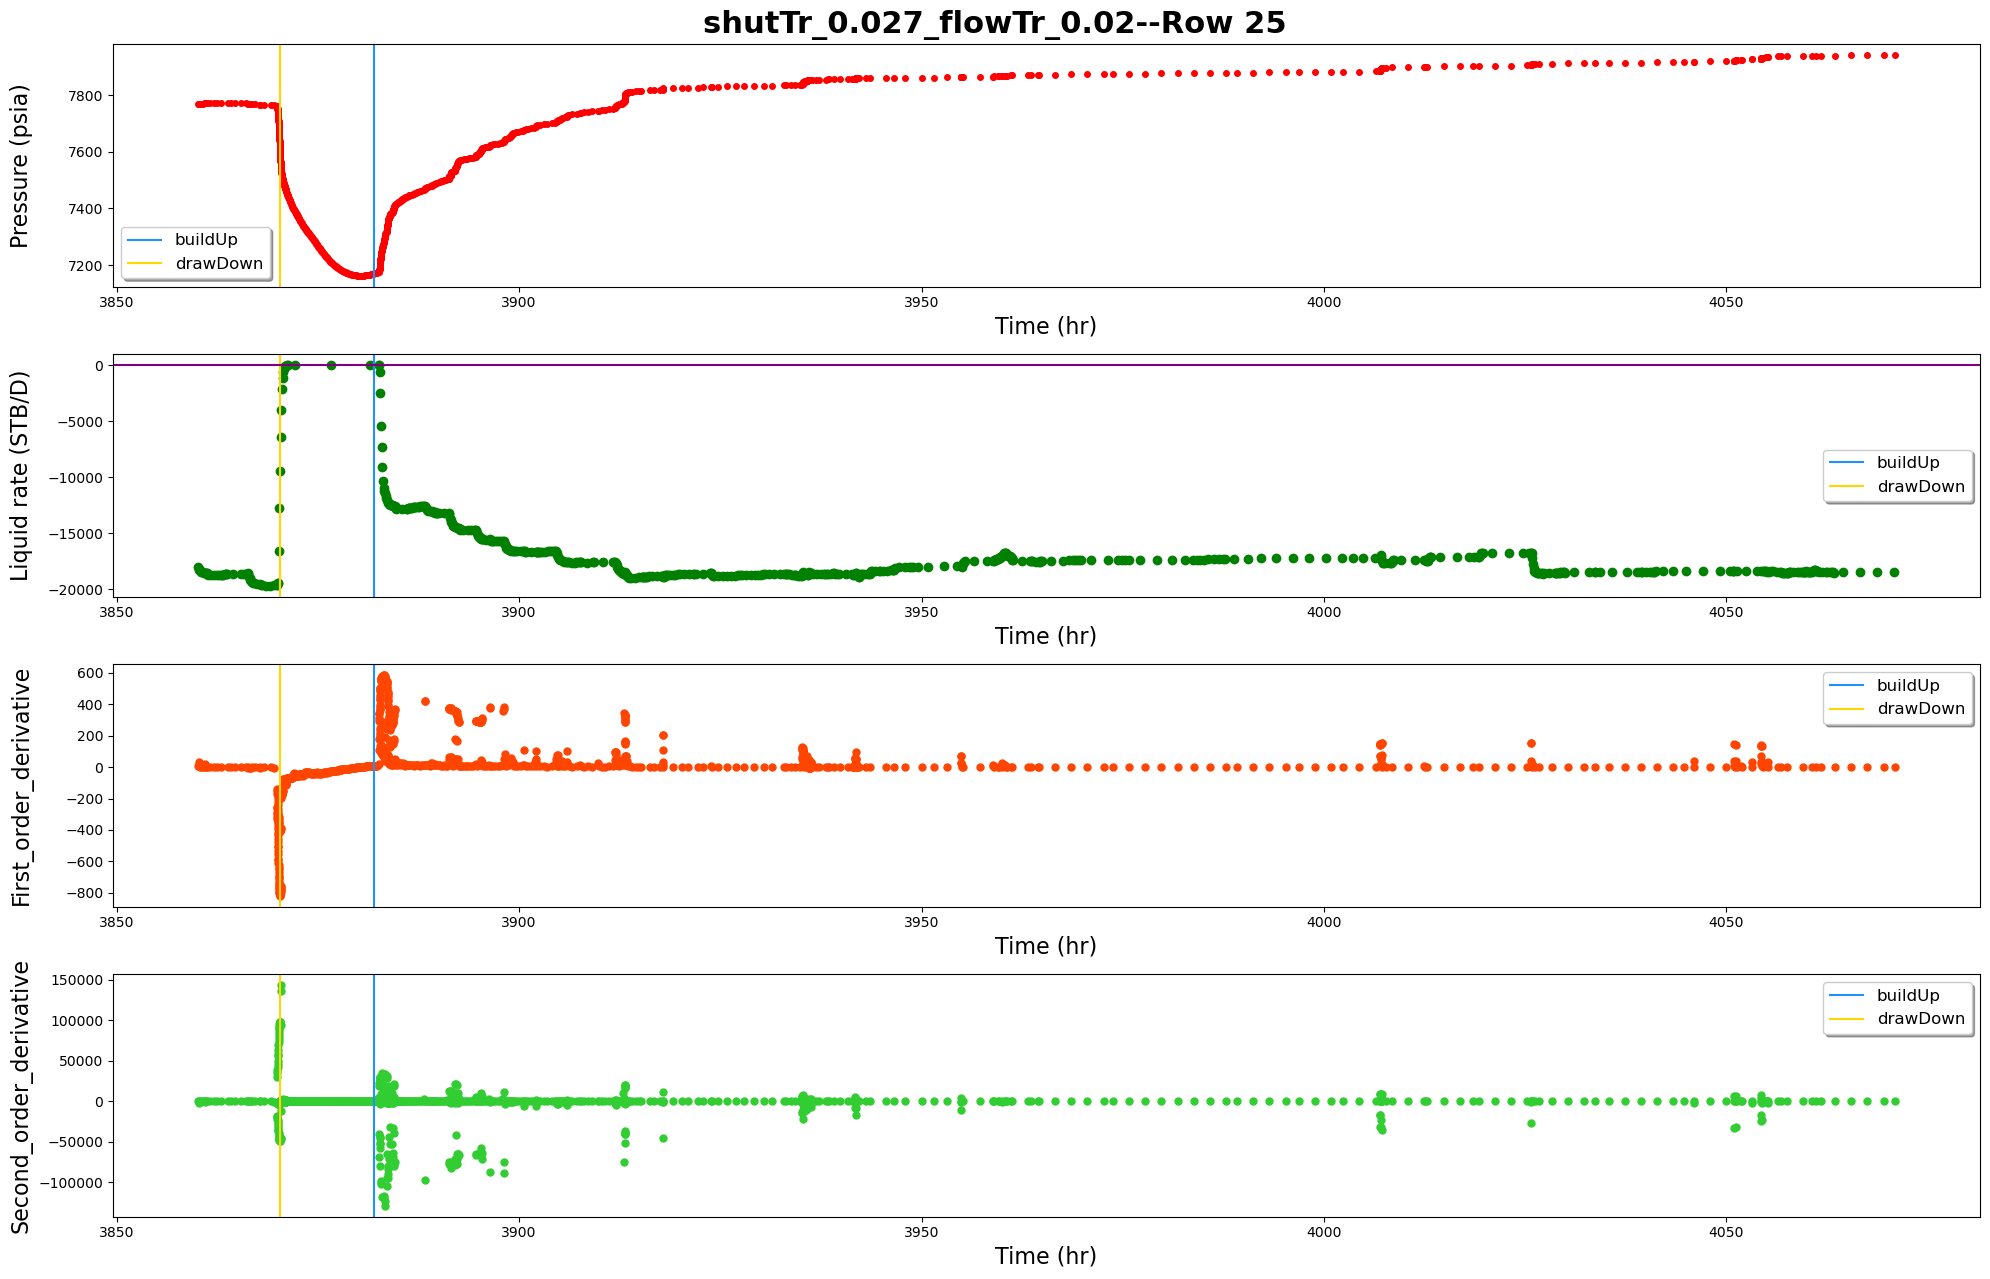

In [28]:
method=""
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=False
folder_name=f"{method}/{points_type}/timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

In [ ]:
points_false=[27725,25894]
for point_index in points_false:
    identfication_UsePattern.check_in_pattern(identfication_UsePattern.data_forPredict,
                                 point_index,
                                 plot=True)

In [ ]:
points_missed=[25750,27824]
for point_index in points_missed:
    identfication_UsePattern.check_in_pattern(identfication_UsePattern.data_forPredict,
                                 point_index,
                                 plot=True)

# plot periods & multi rate break points

'buildup:170, drawdown:30'
---initializing...
---plotting...


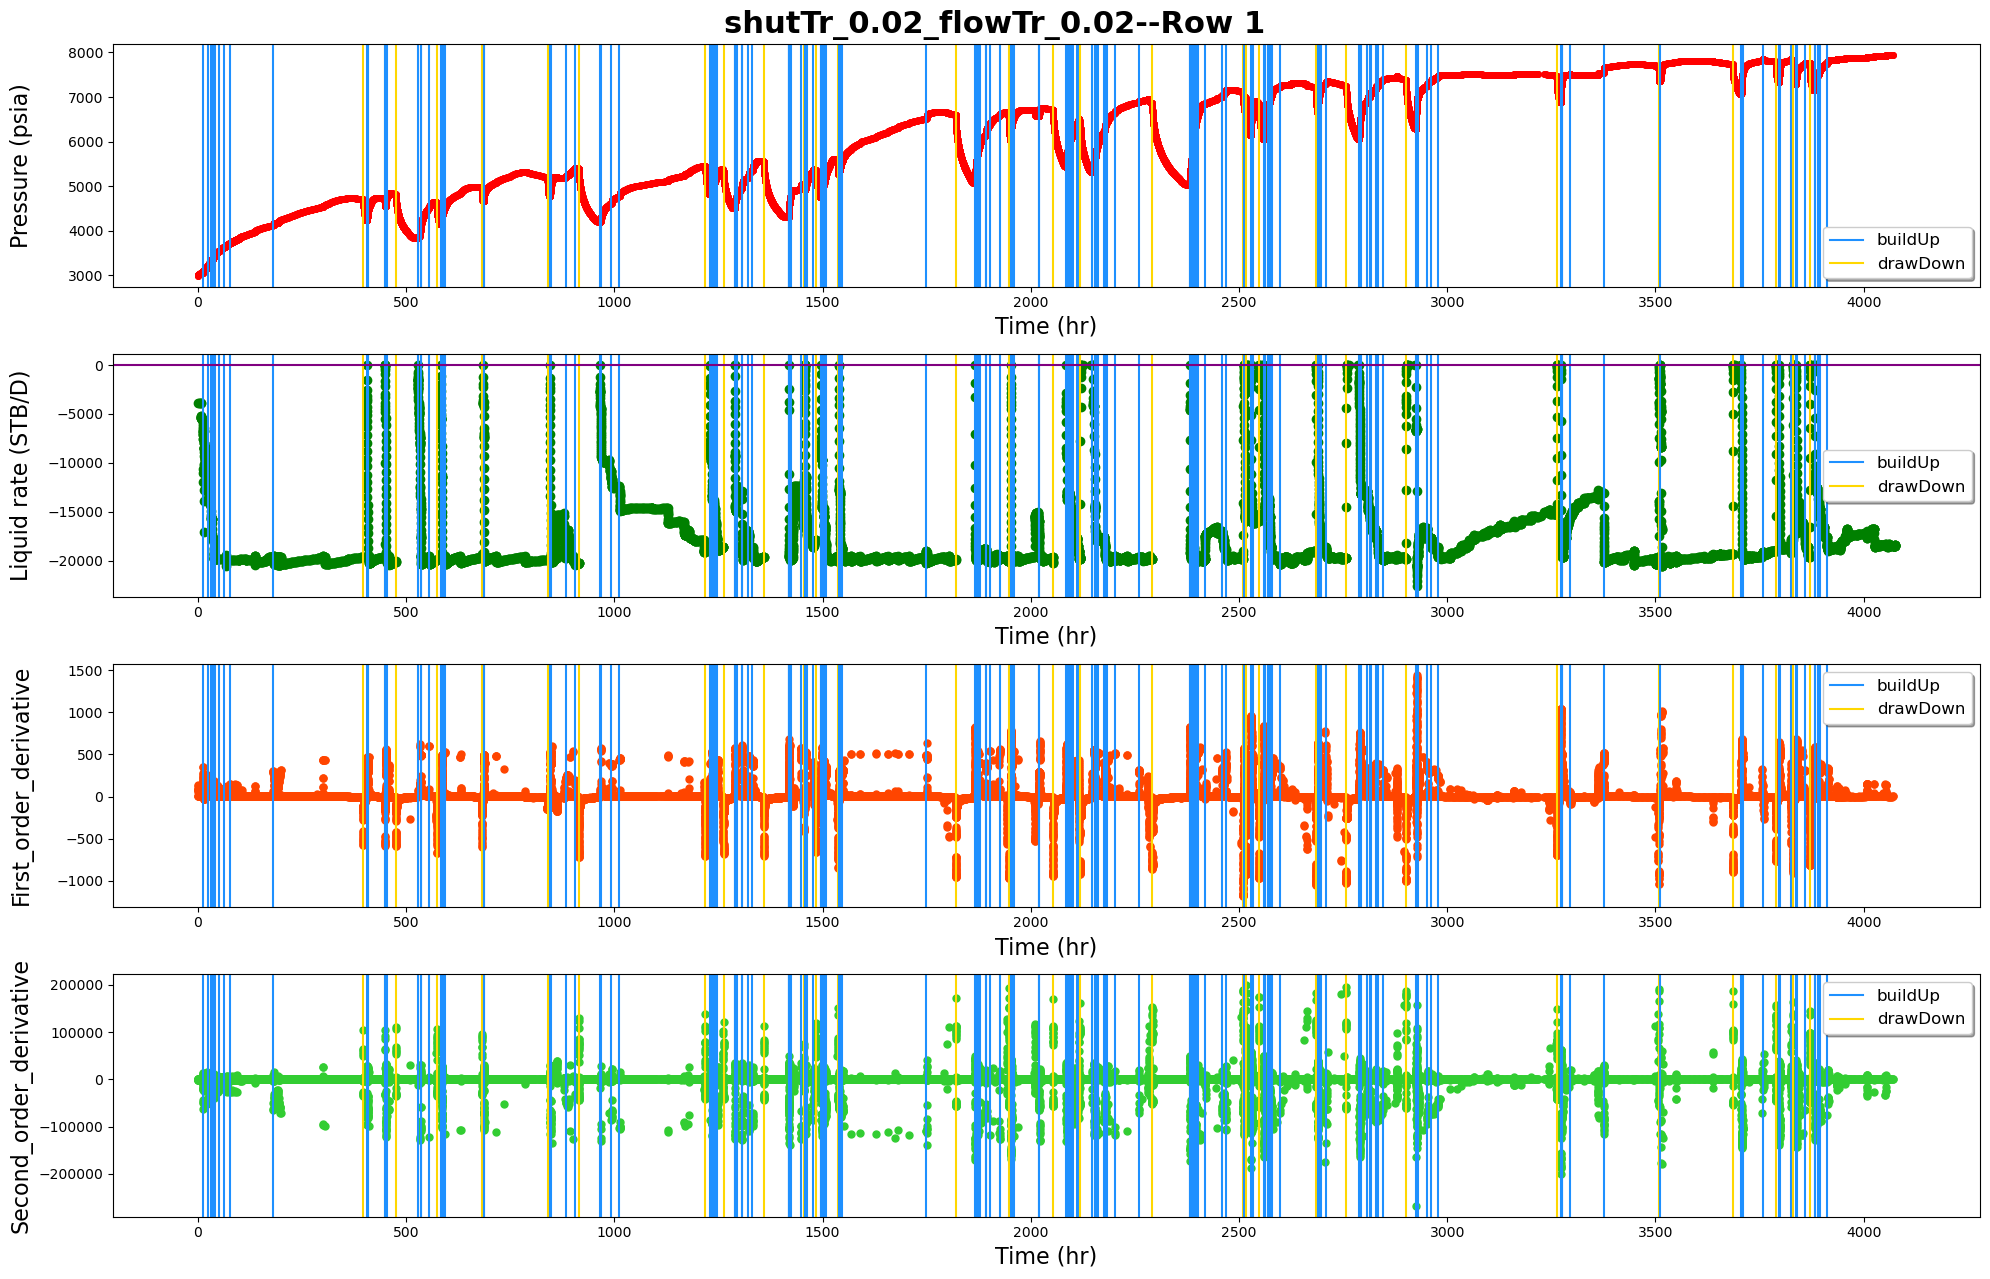

detected 200 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[43, 399, 523, 655, 781, 950]


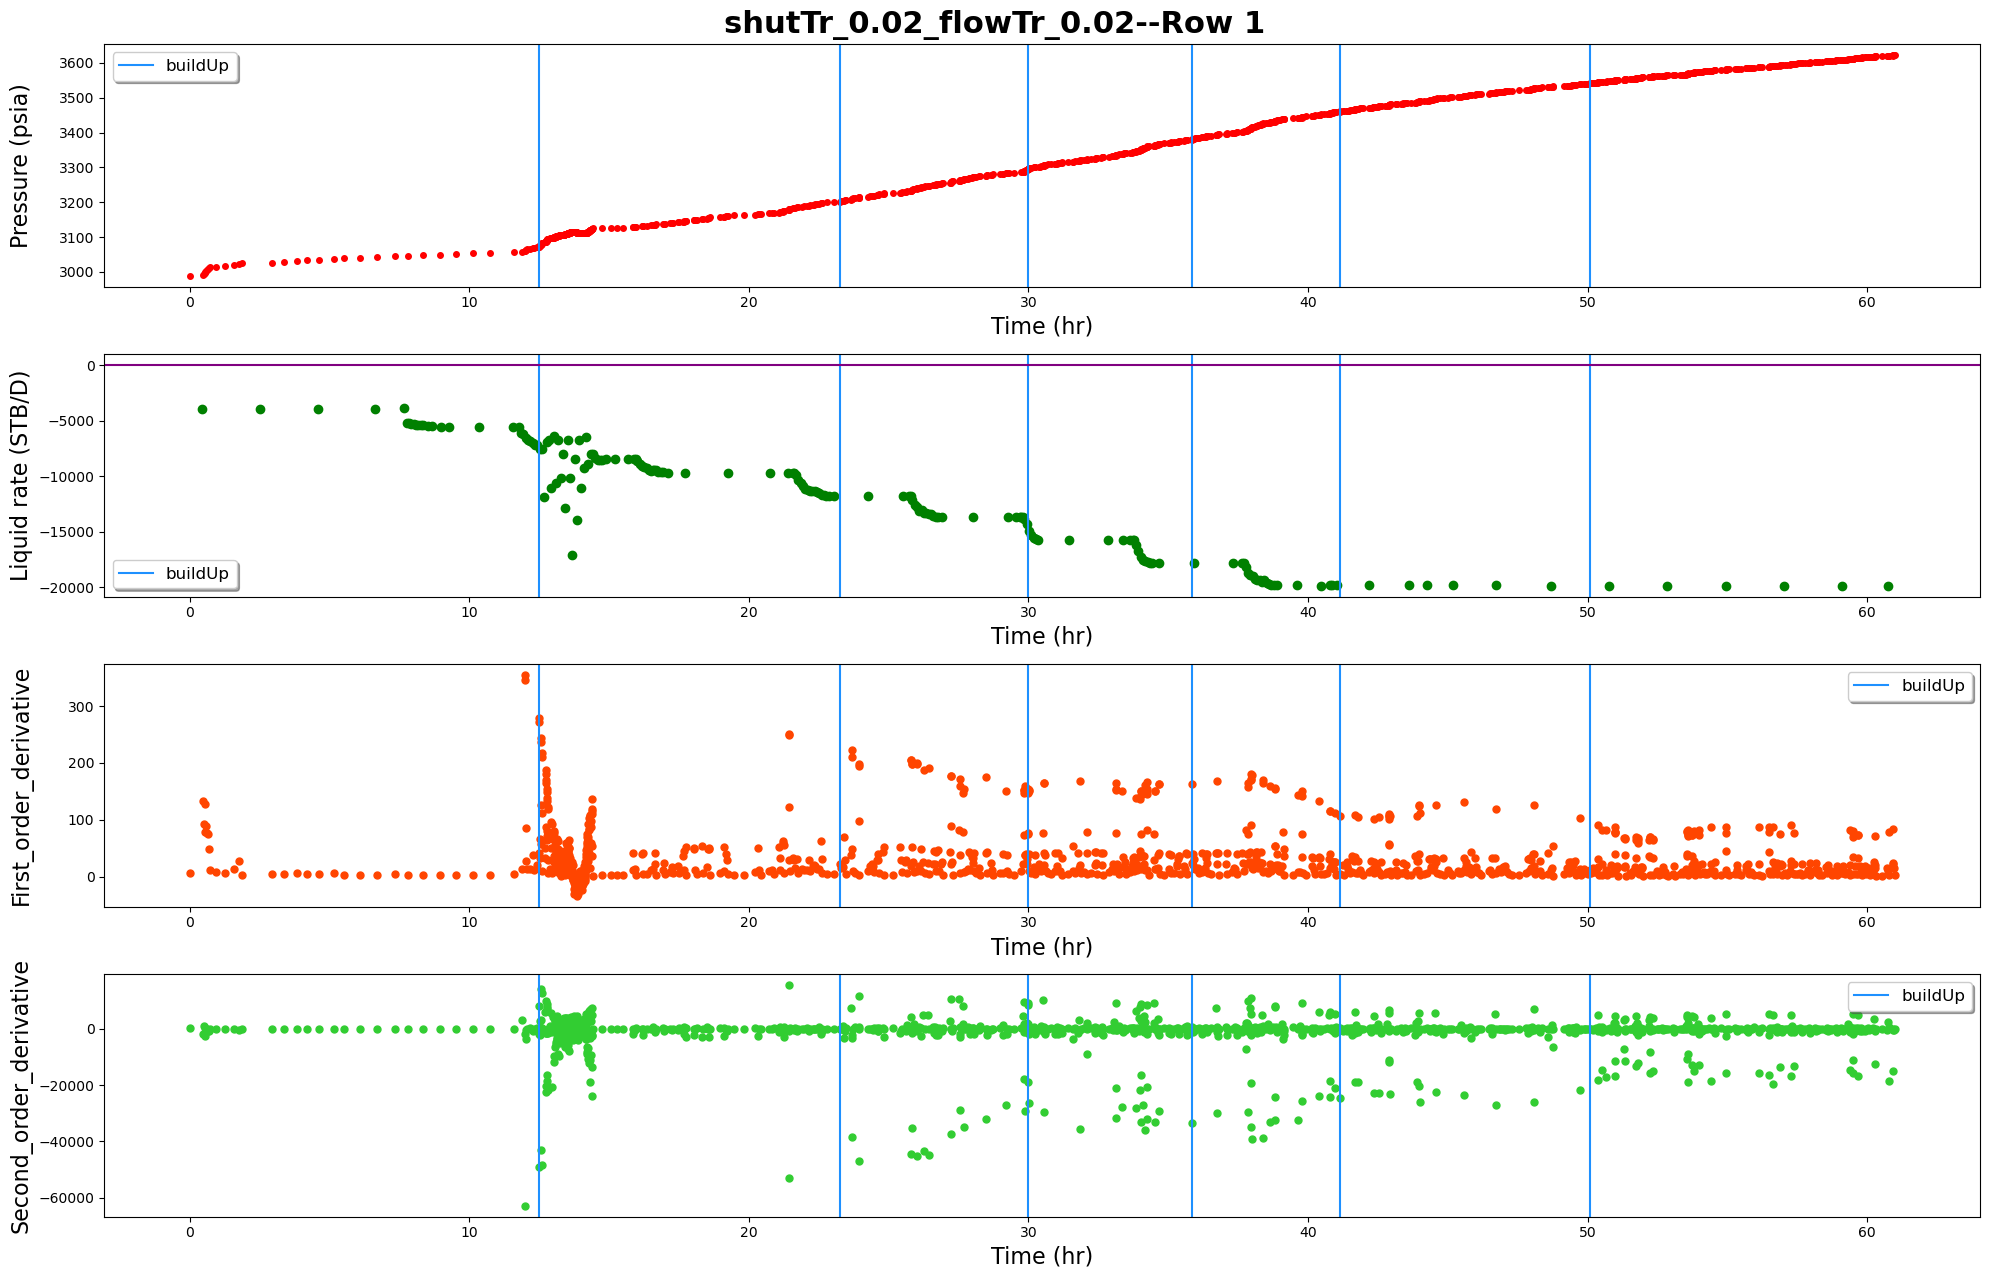

------row 2-----detected points:[1204, 1435, 1811, 2264]


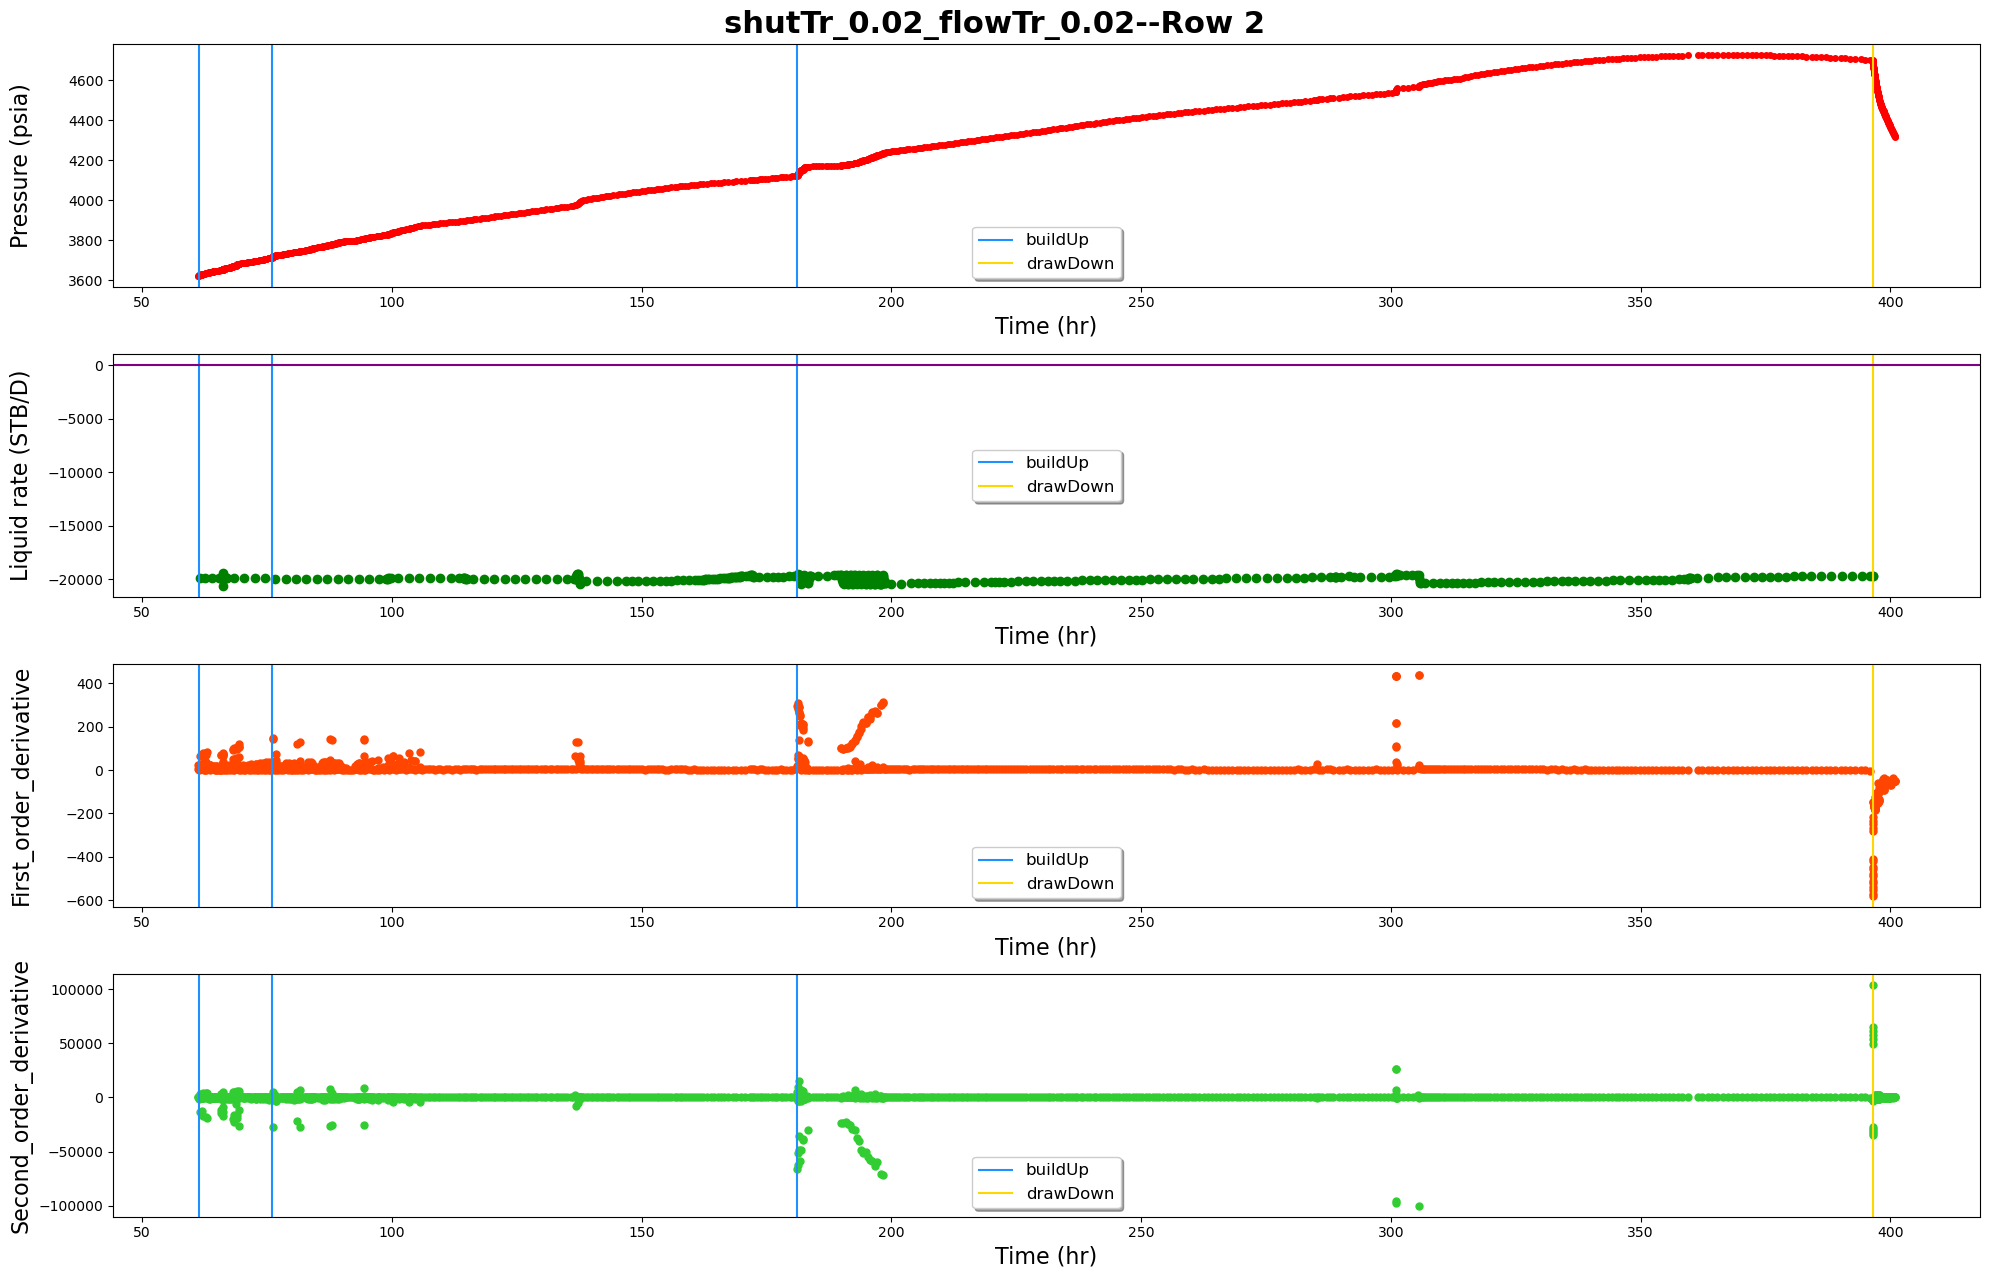

------row 3-----detected points:[2480, 2539, 2620, 2817, 2885, 2993, 3118, 3561]


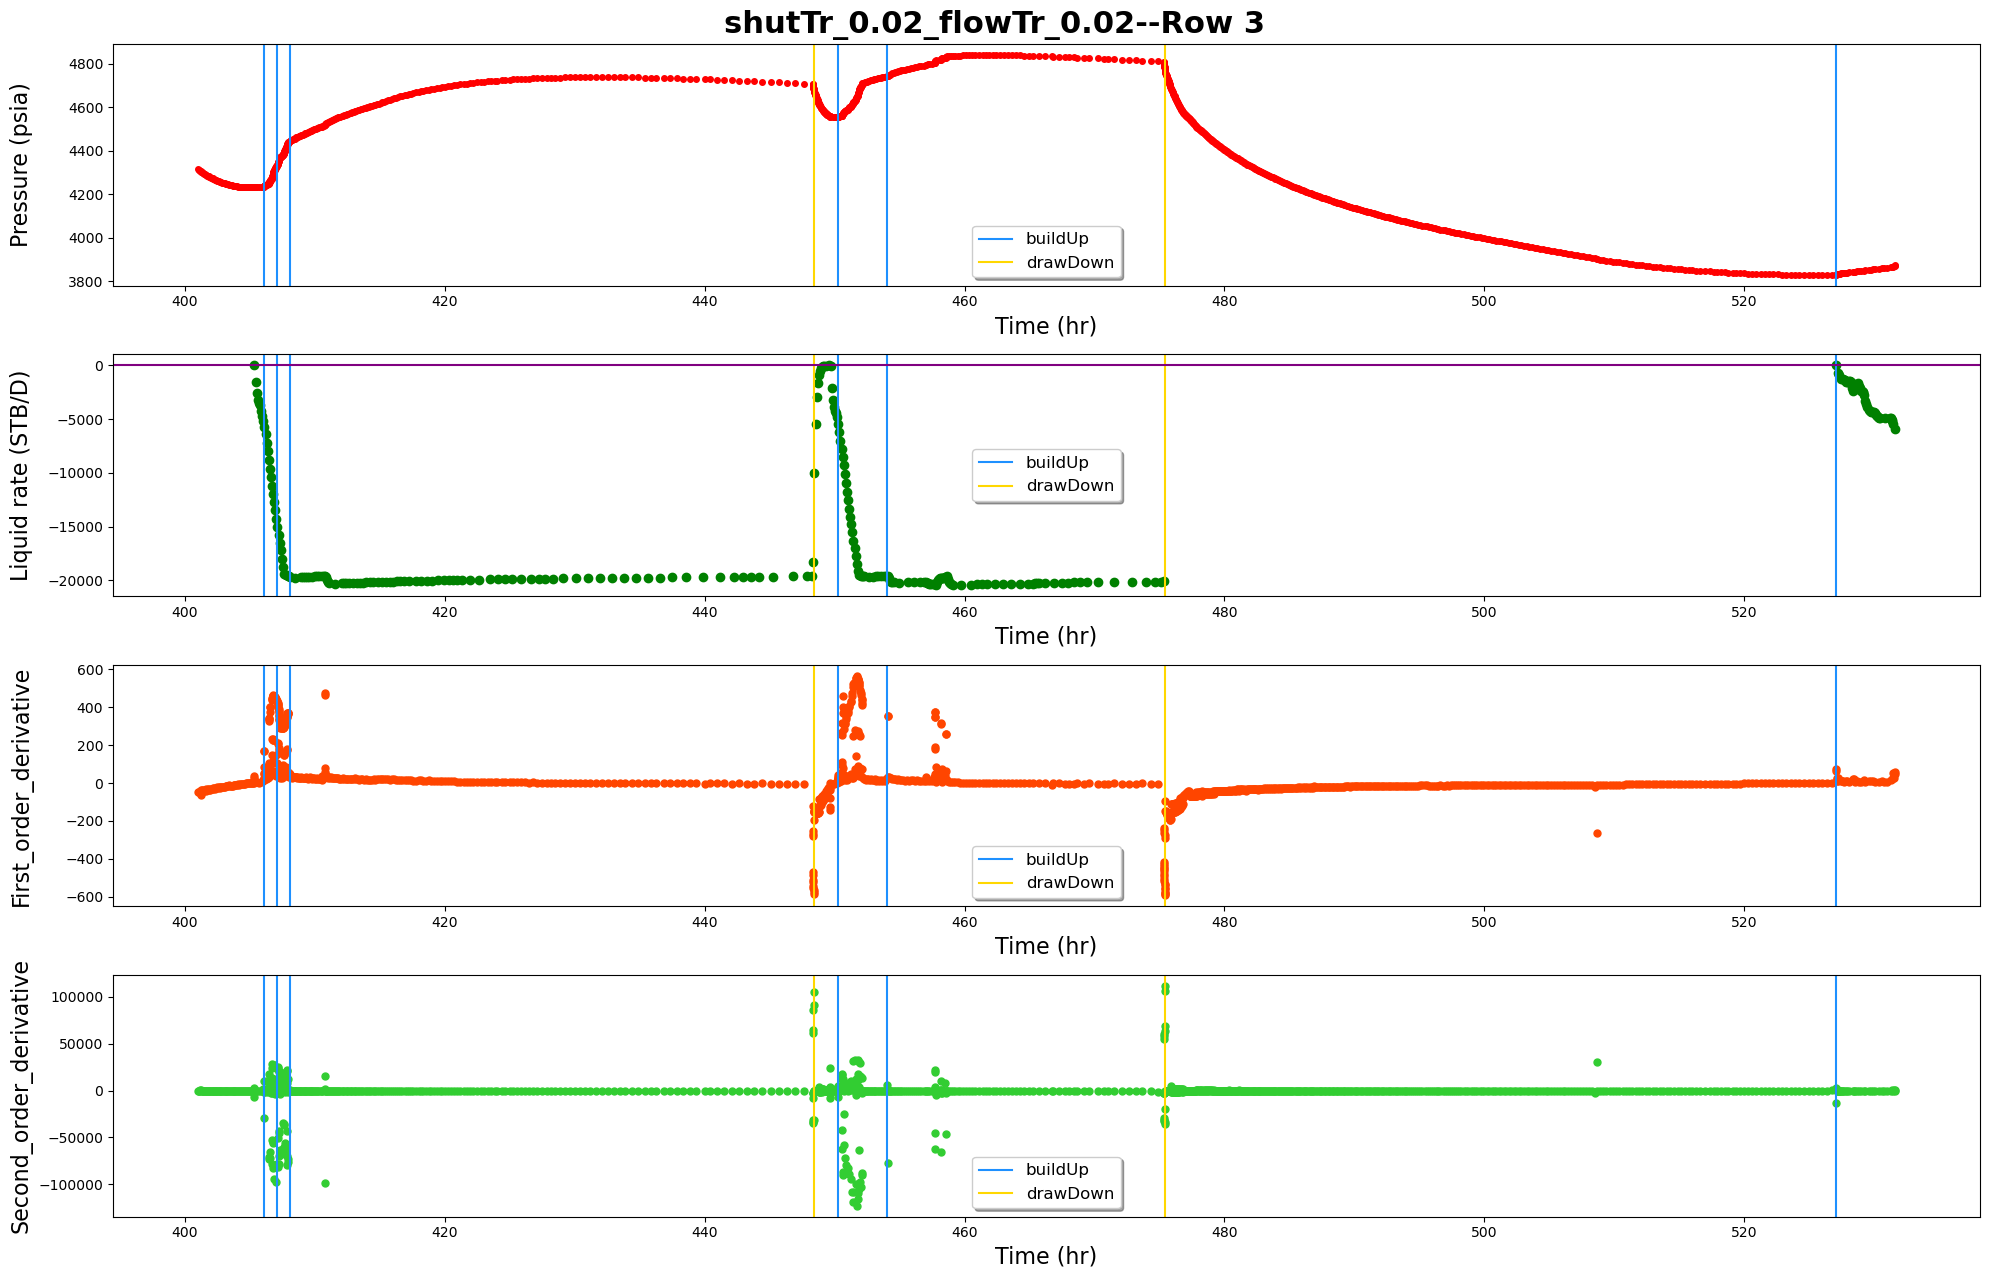

------row 4-----detected points:[3663, 3718, 3903, 4035, 4229, 4328, 4416, 4489, 4773]


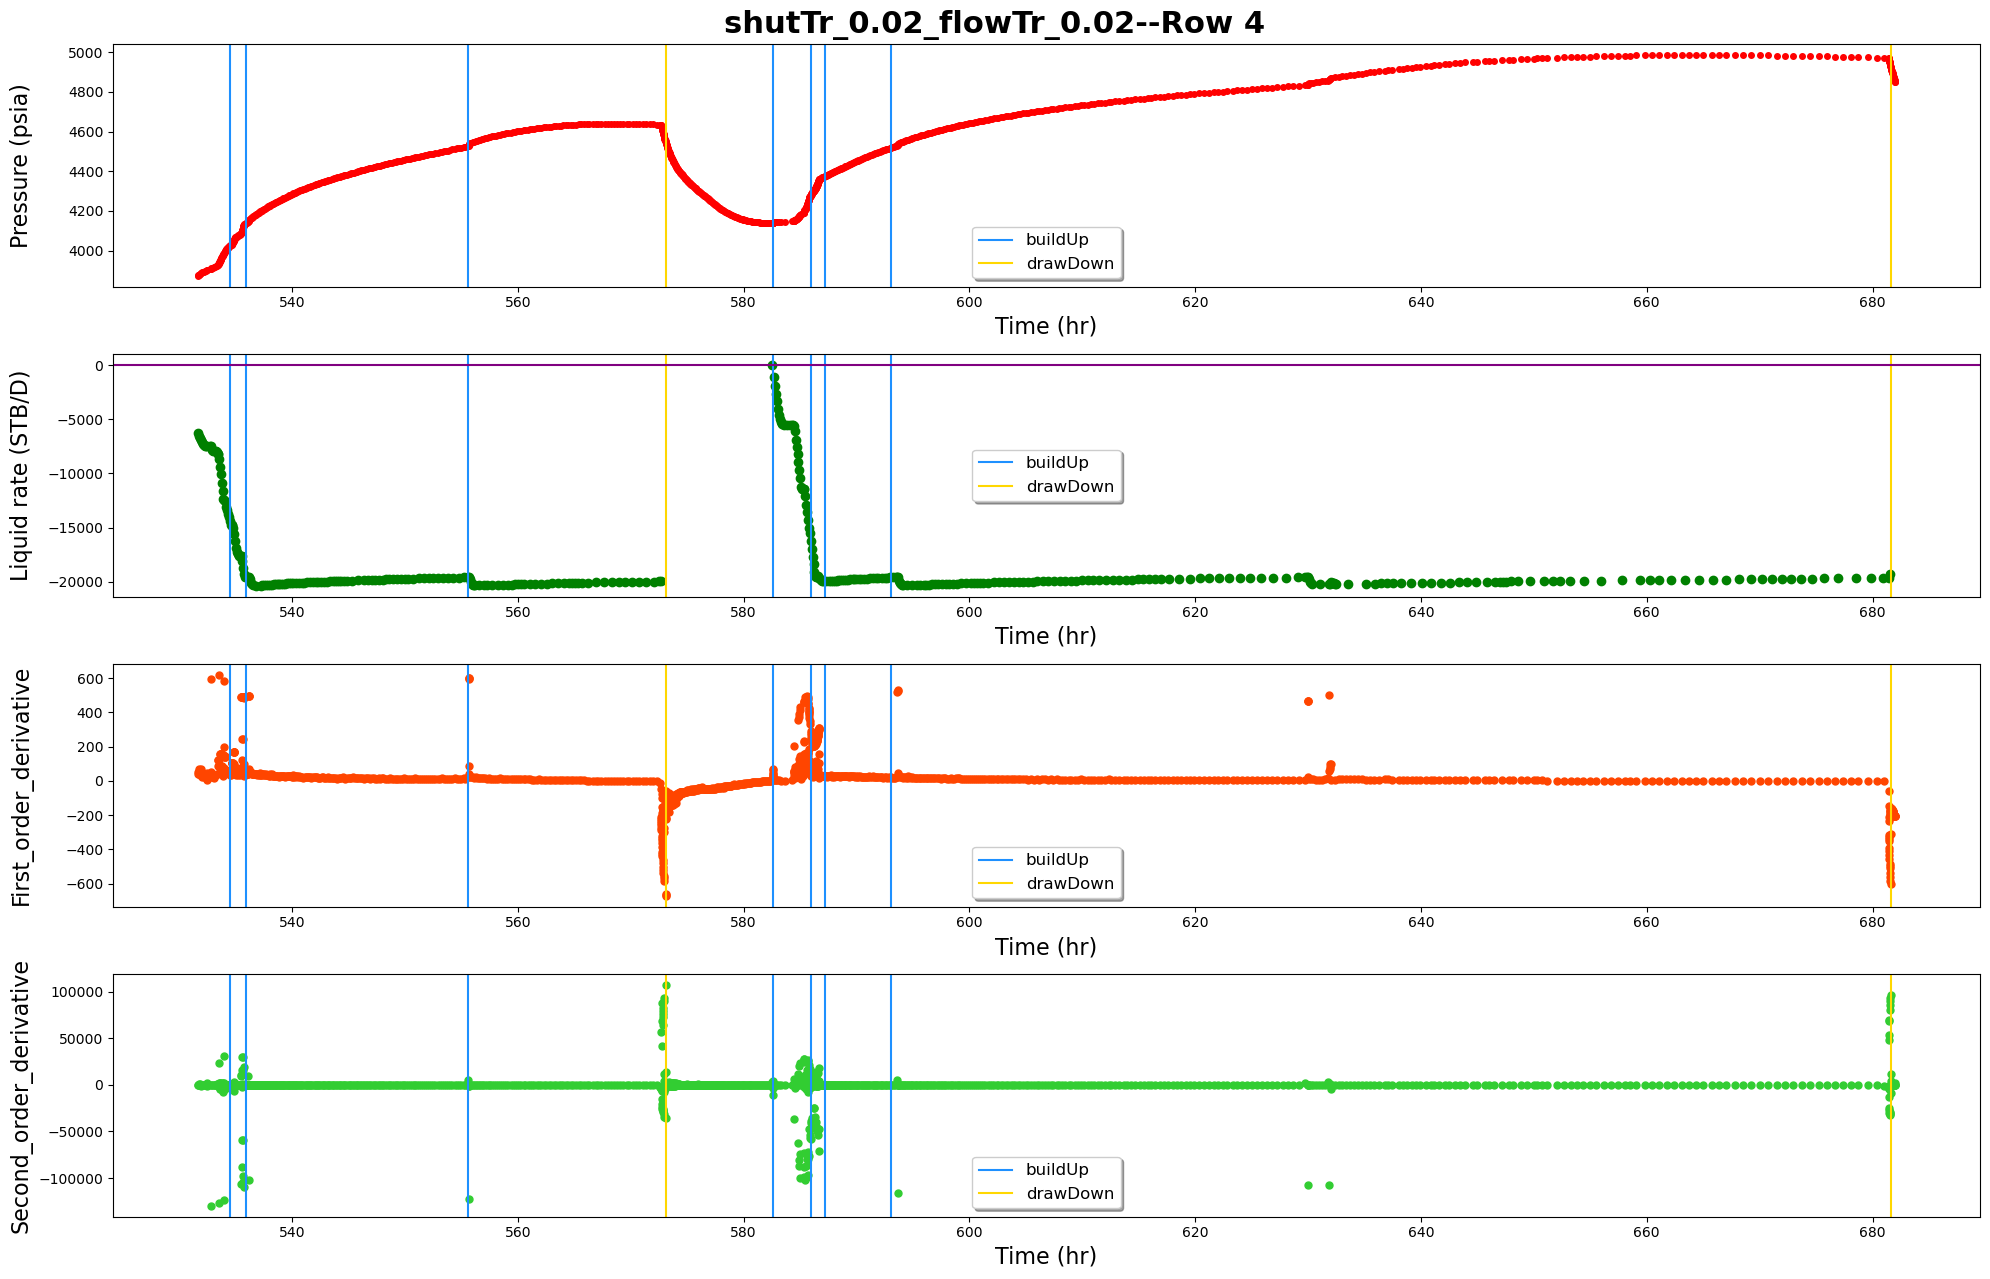

------row 5-----detected points:[4902, 4984, 5326, 5450, 5574, 5828, 5943]


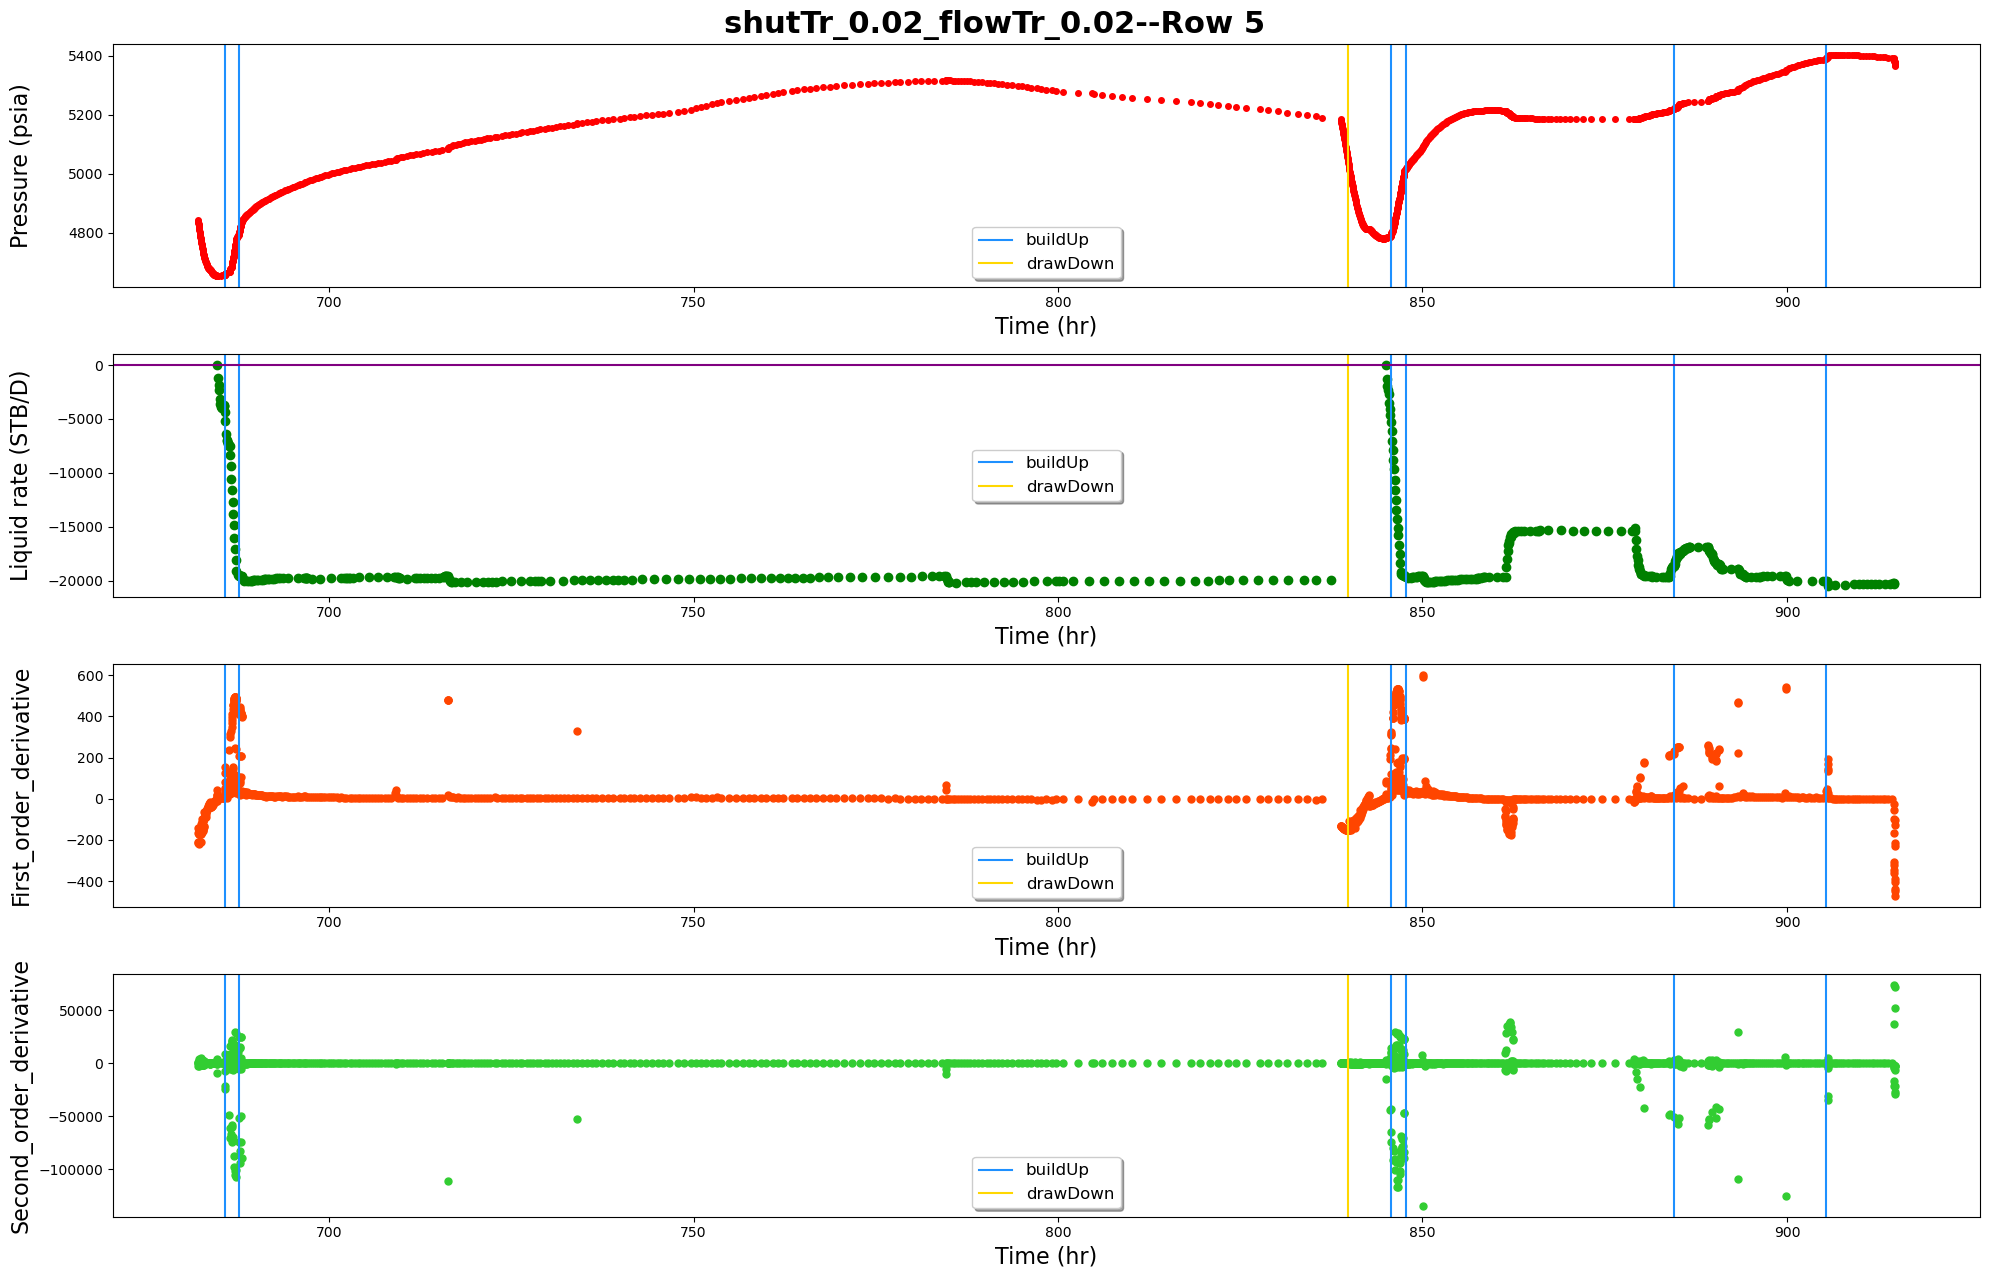

------row 6-----detected points:[6037, 6544, 6603, 6769, 6866]


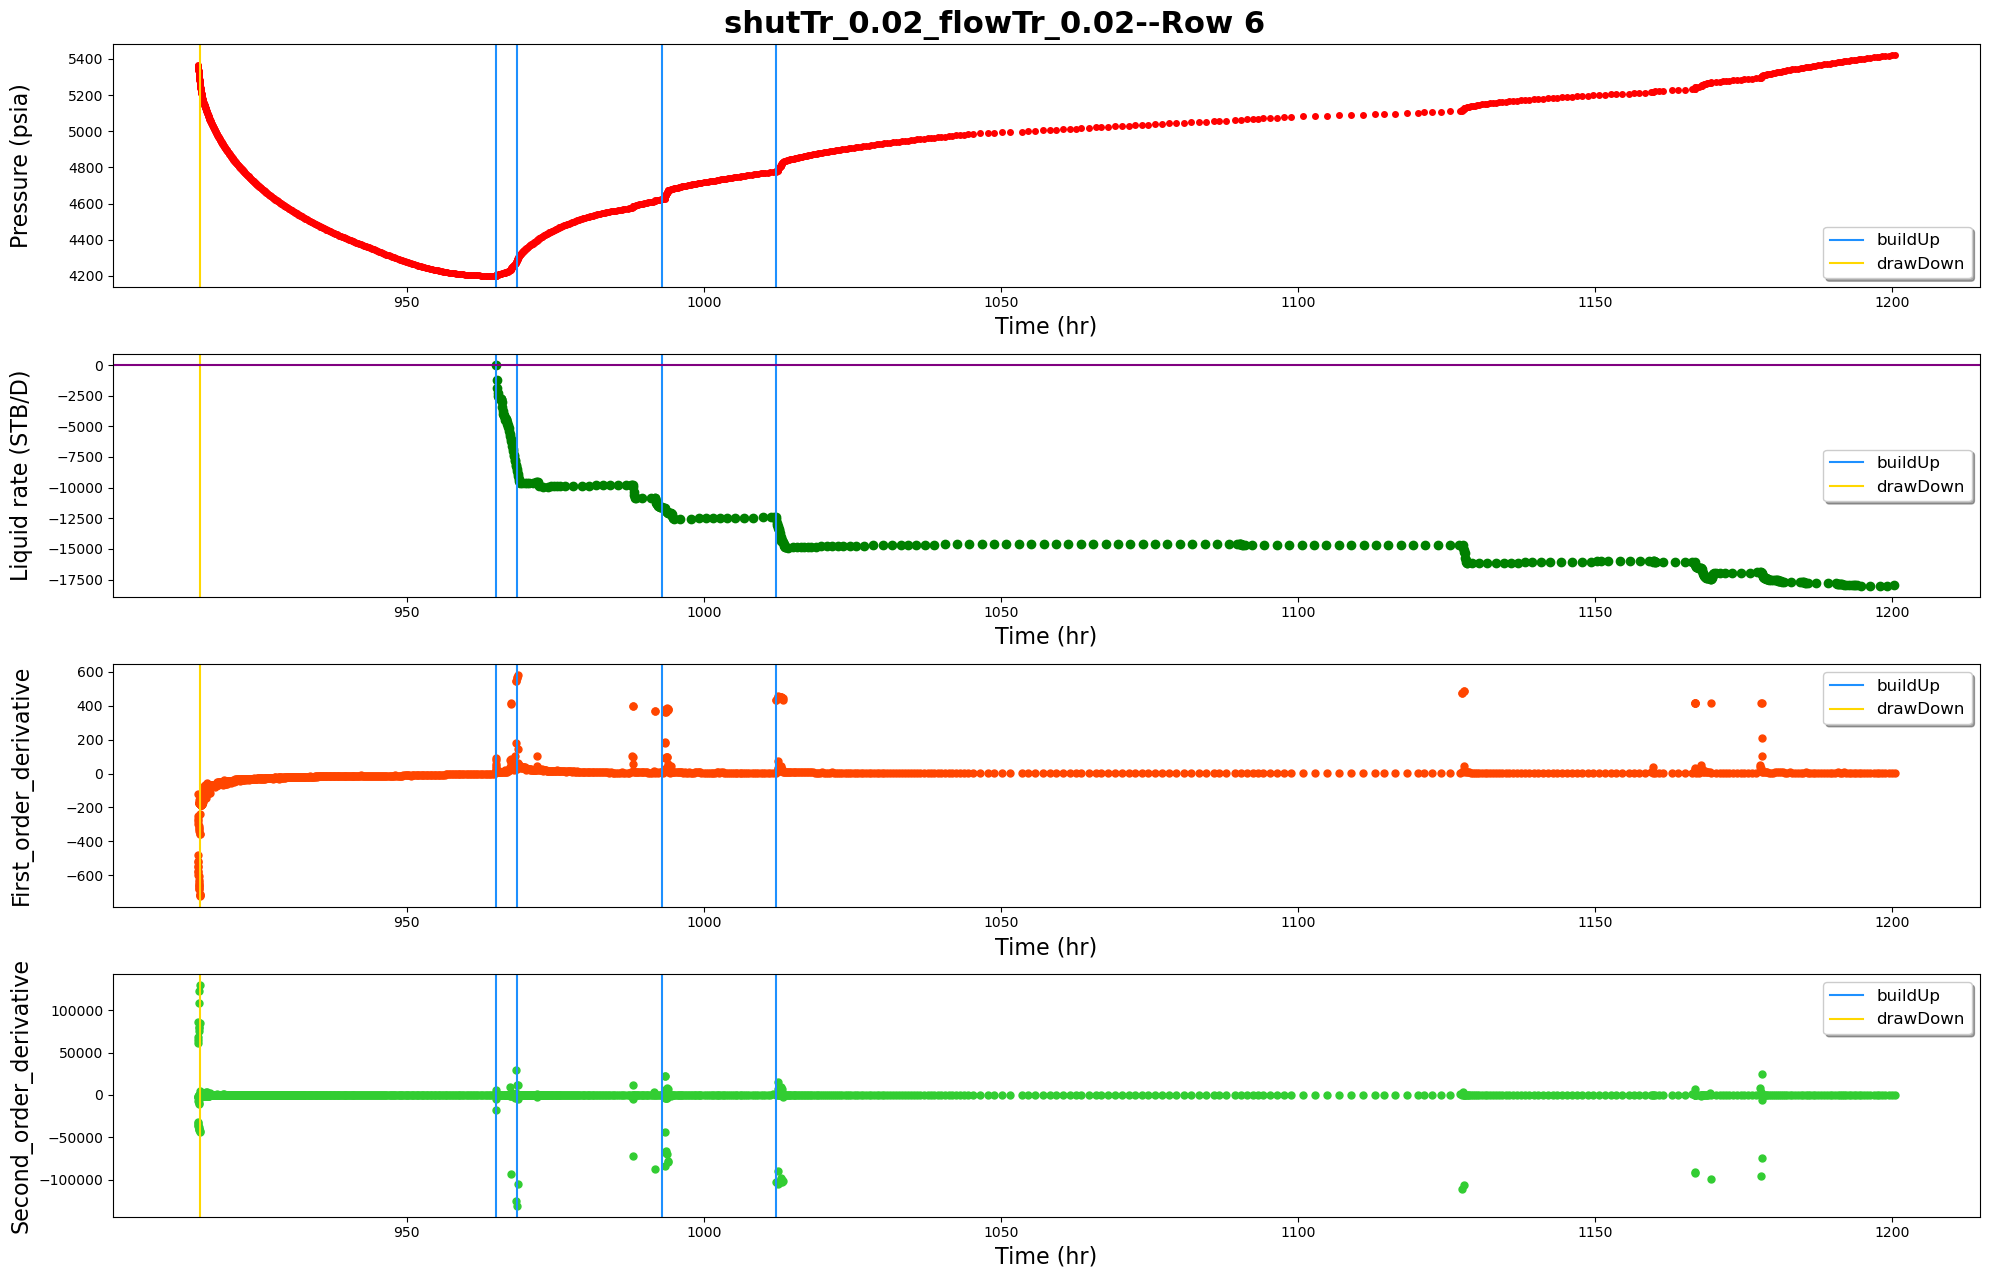

------row 7-----detected points:[7295, 7545, 7618, 7682, 7754, 7832, 7993, 8362]


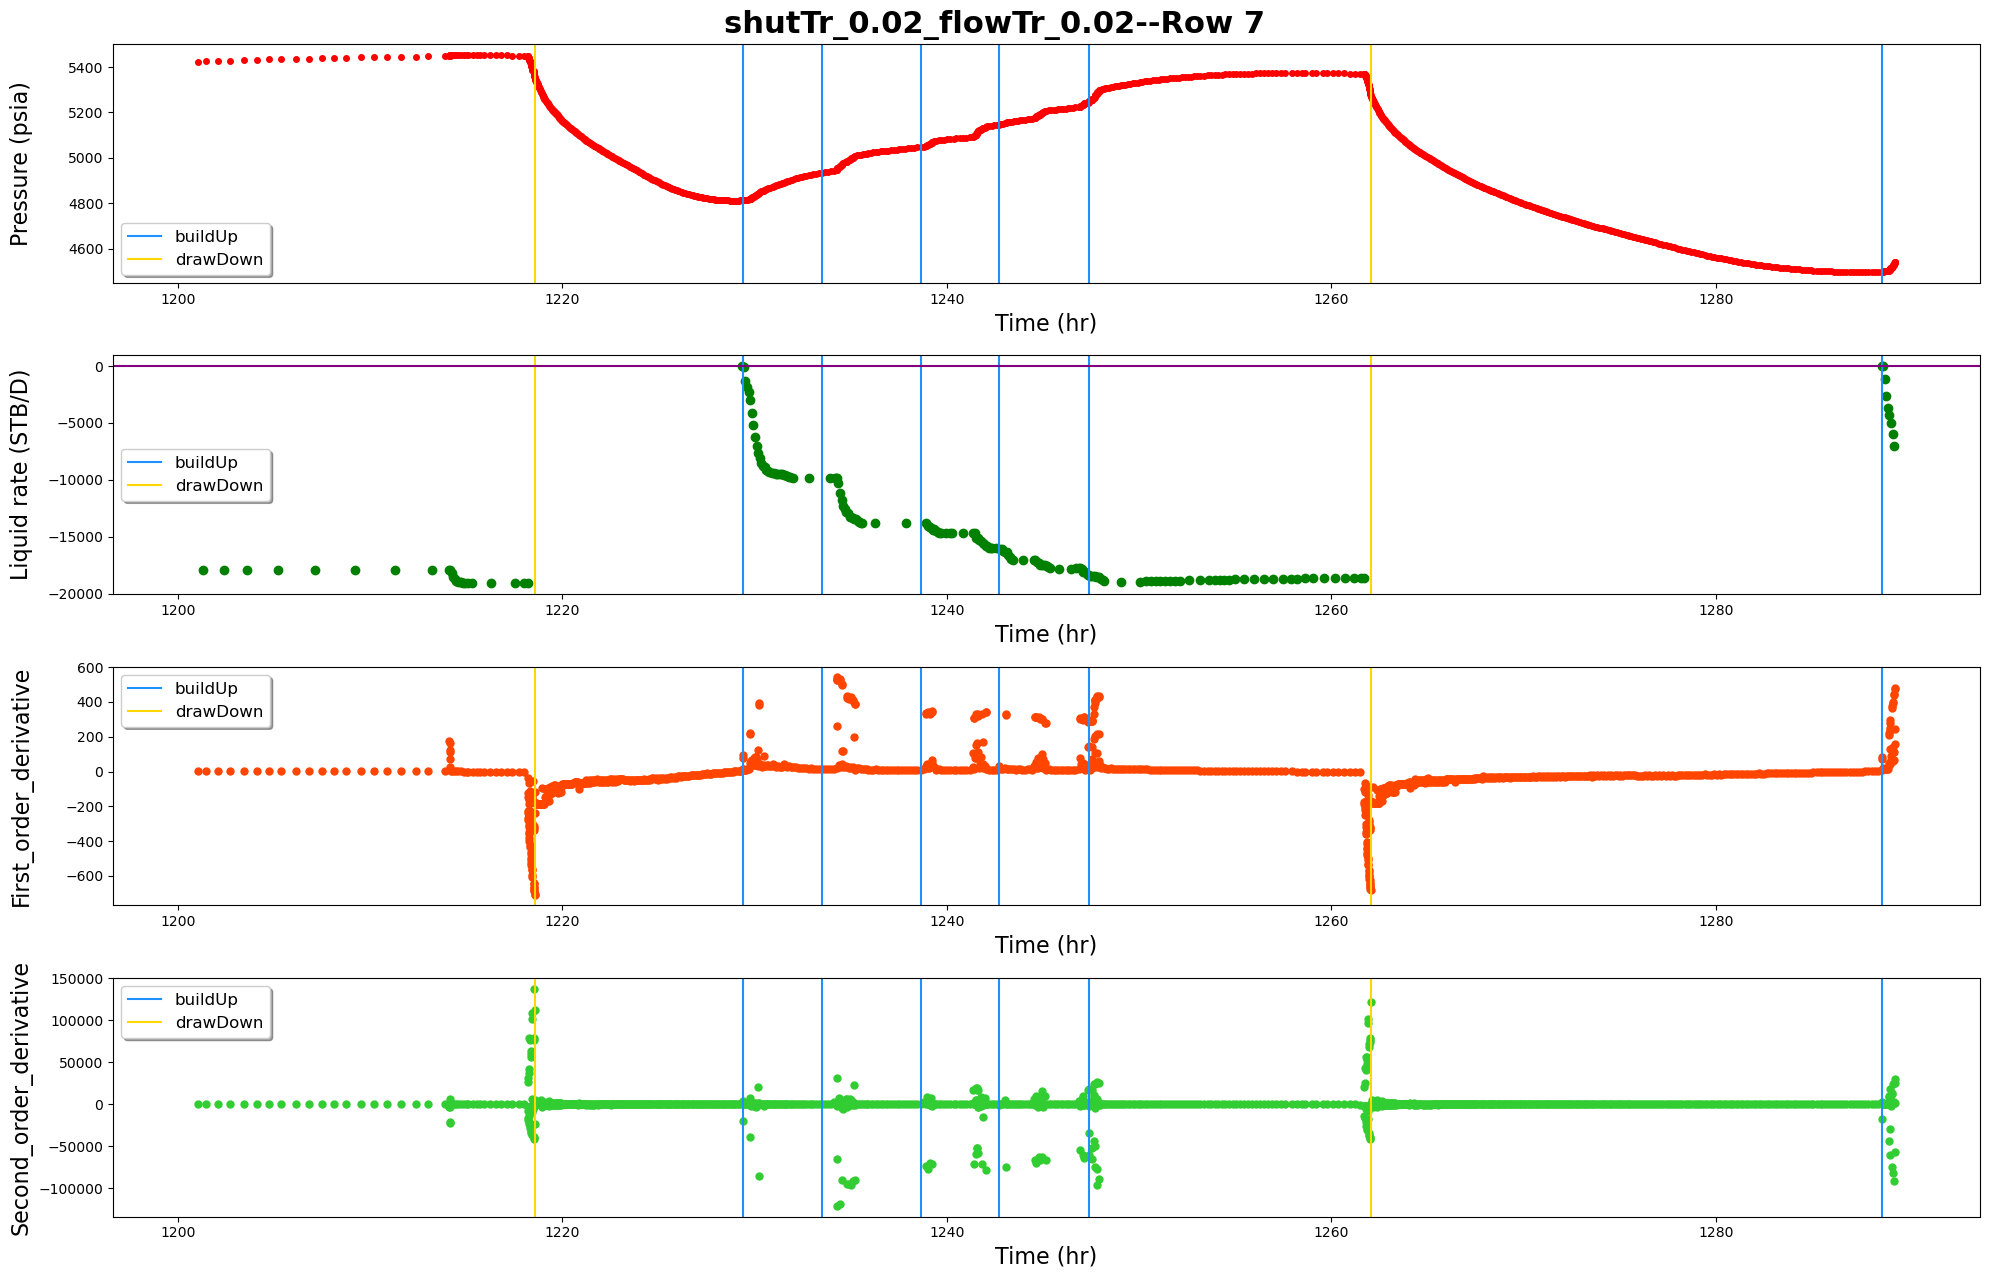

------row 8-----detected points:[8447, 8511, 8597, 8633, 8776, 8866, 9048]


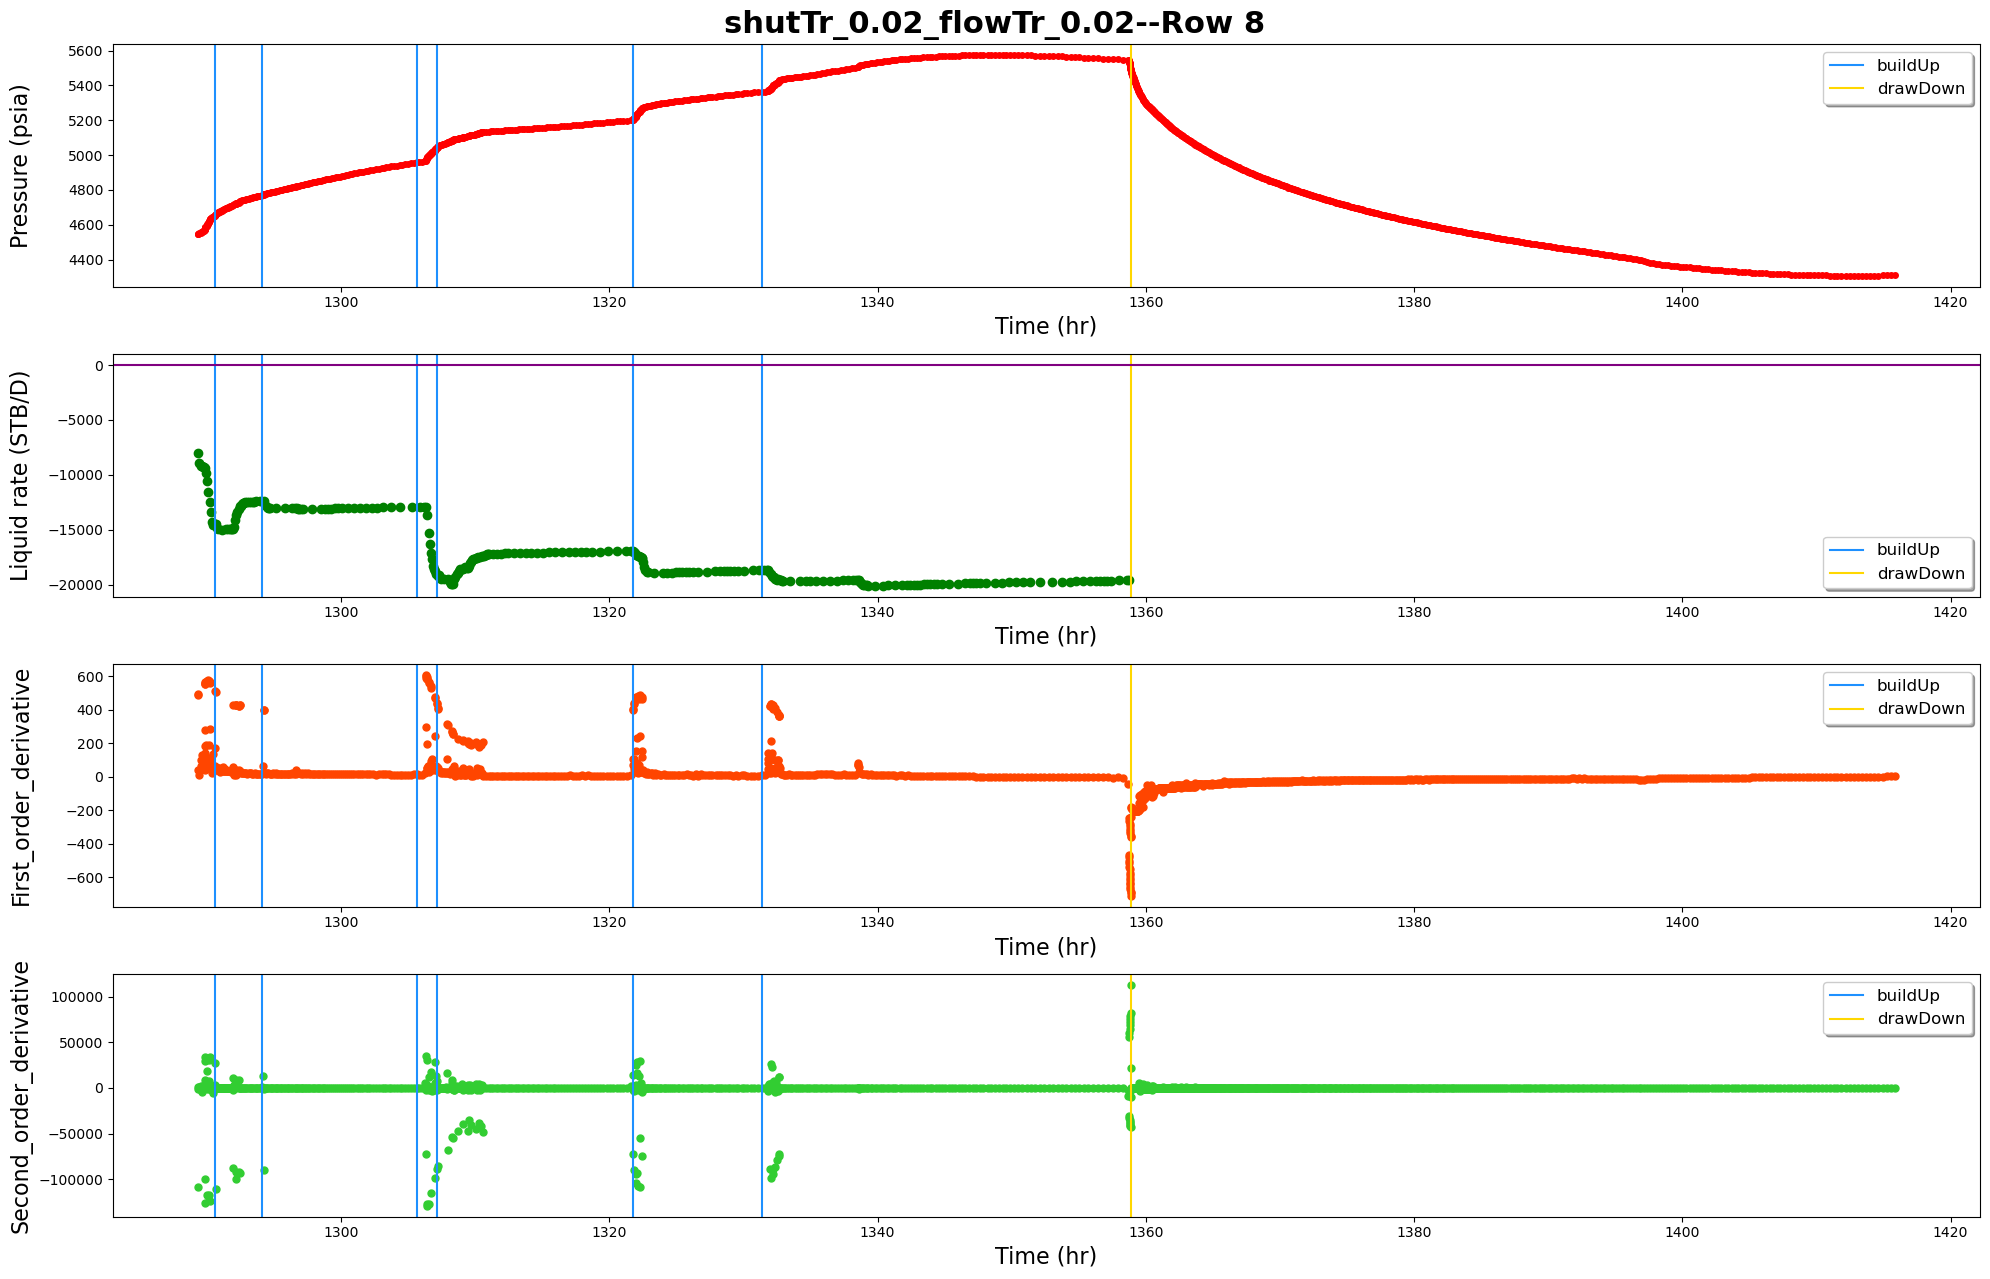

------row 9-----detected points:[9608, 9711, 9786, 9832, 9897, 10083, 10161, 10226, 10278, 10324, 10462, 10567]


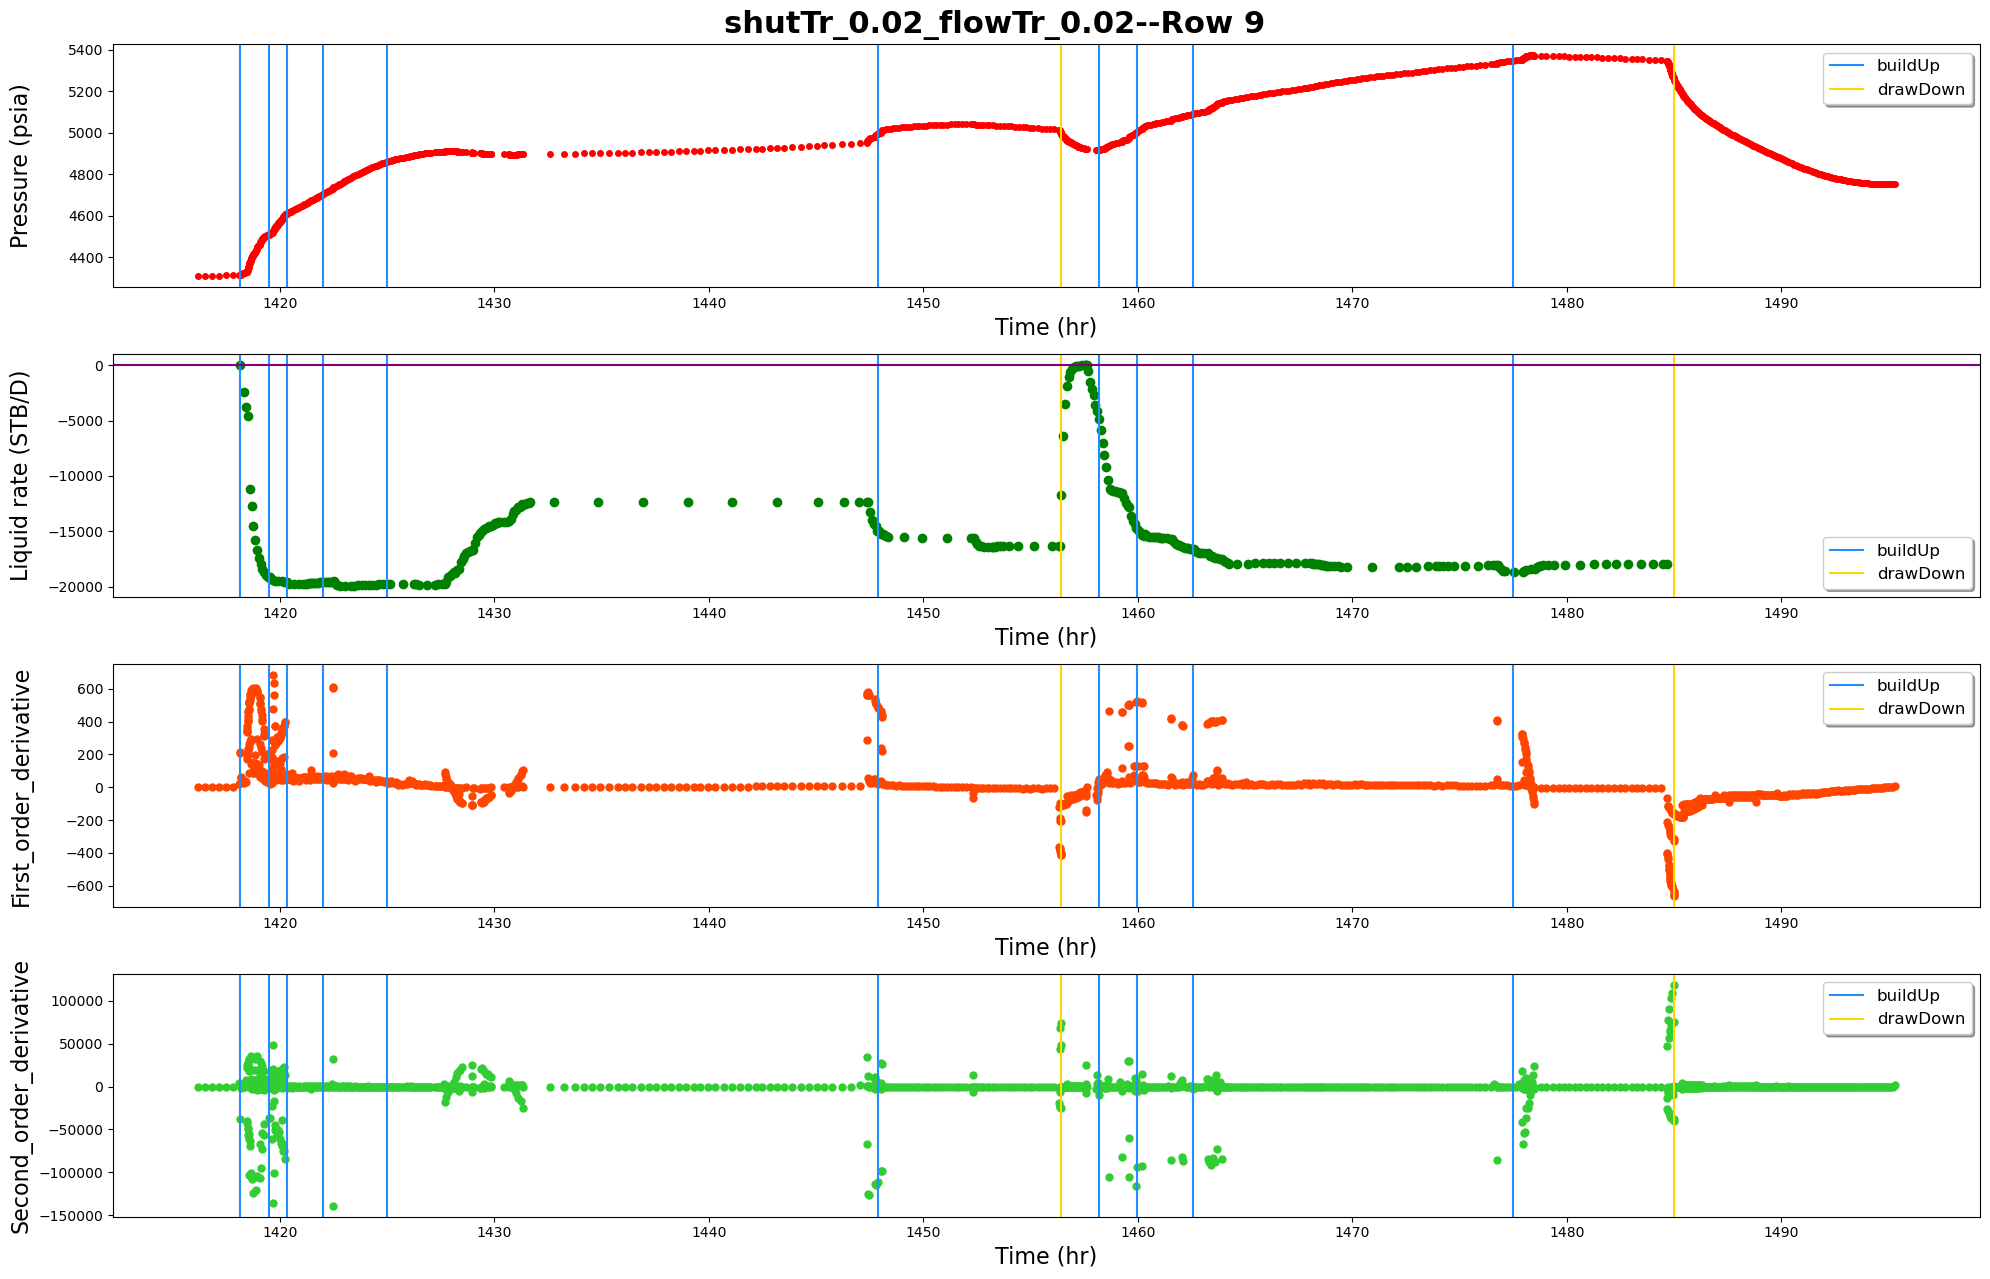

------row 10-----detected points:[10801, 10856, 10897, 10944, 10995, 11073, 11378, 11496, 11589, 11668, 11739]


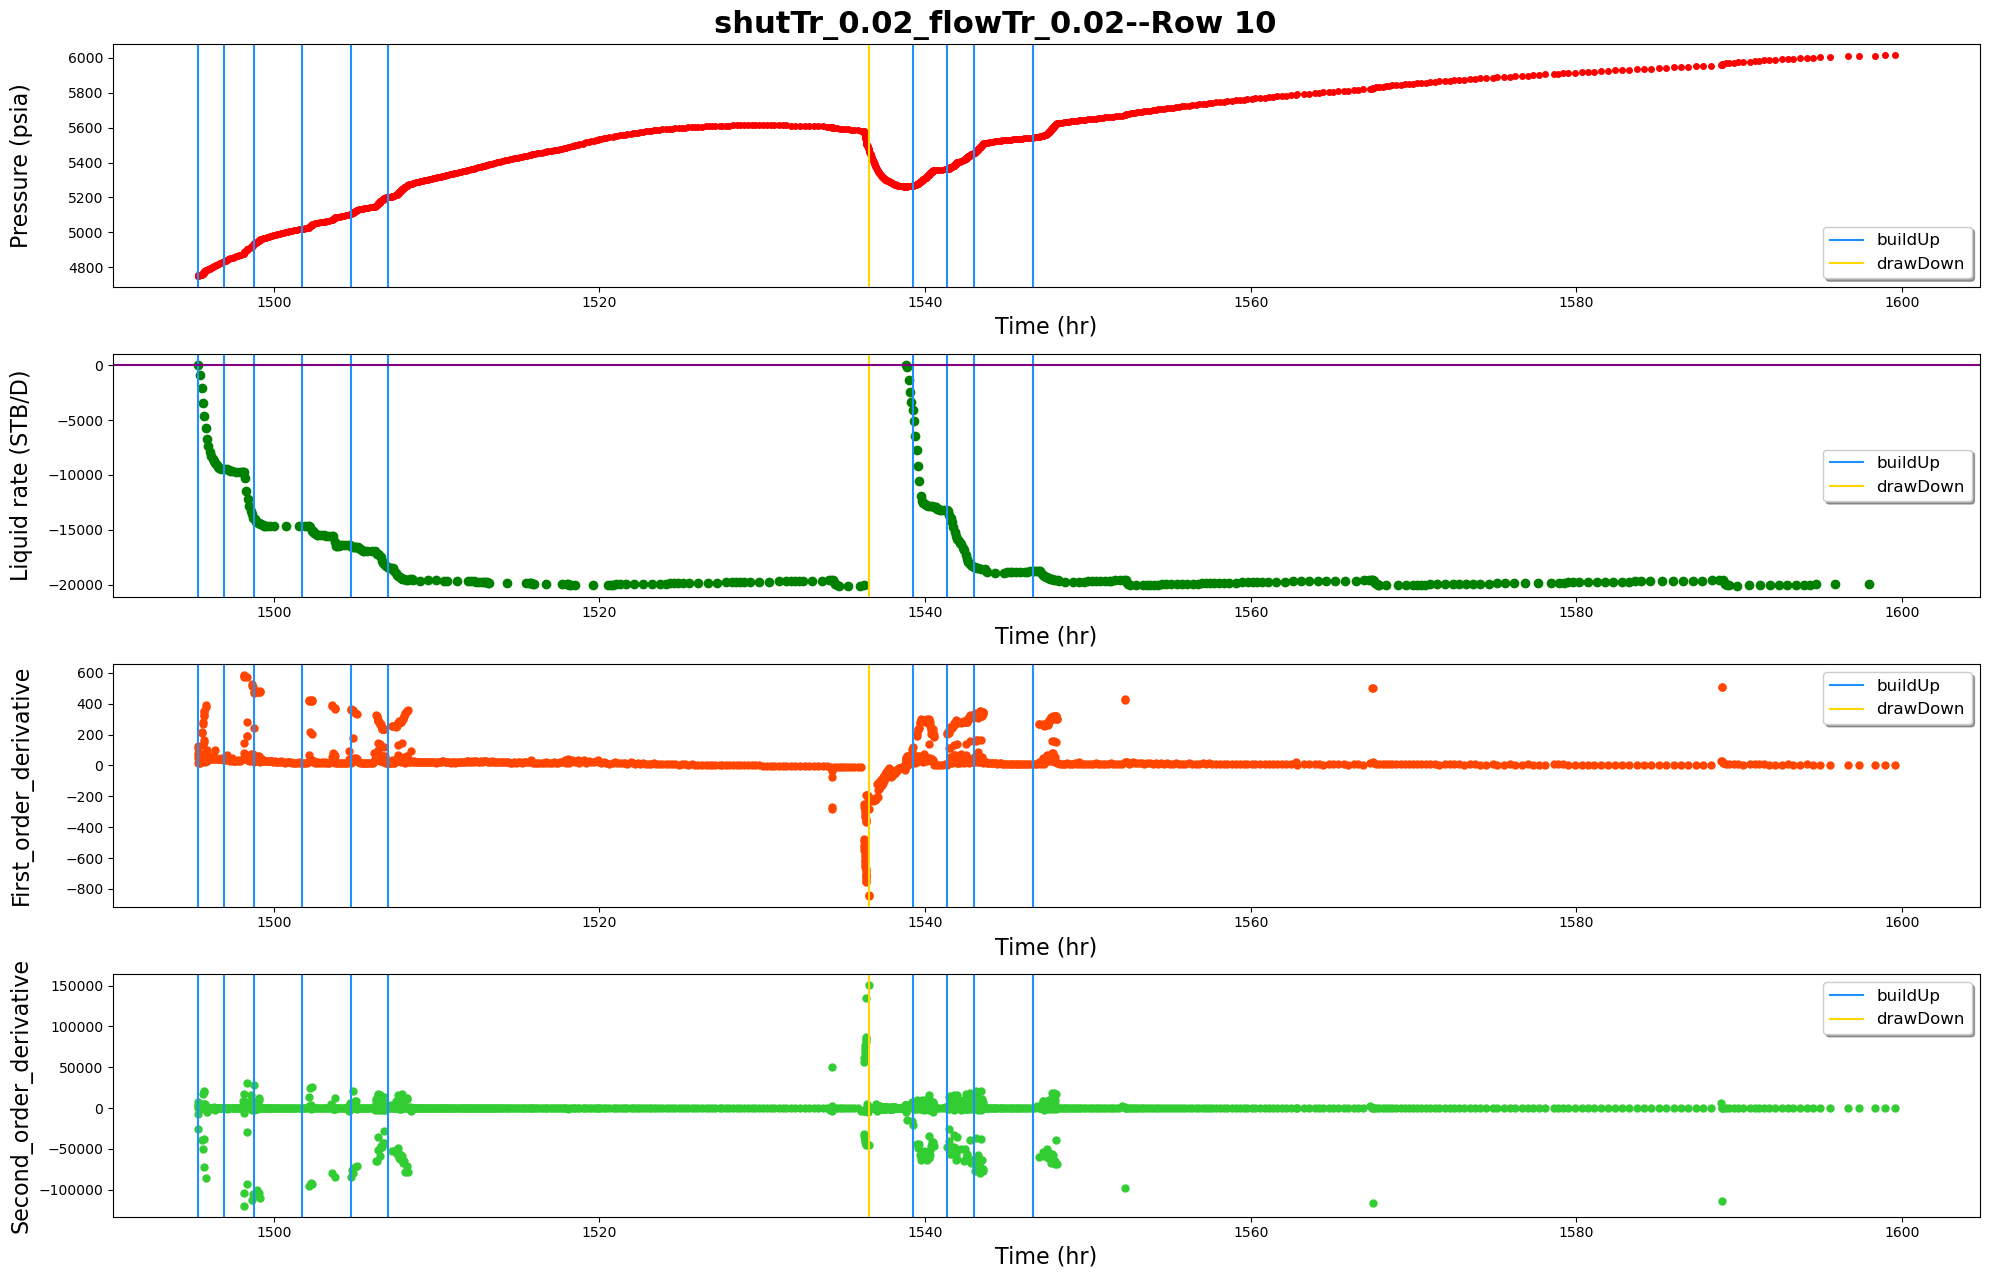

------row 11-----detected points:[12243, 12382, 13040, 13192]


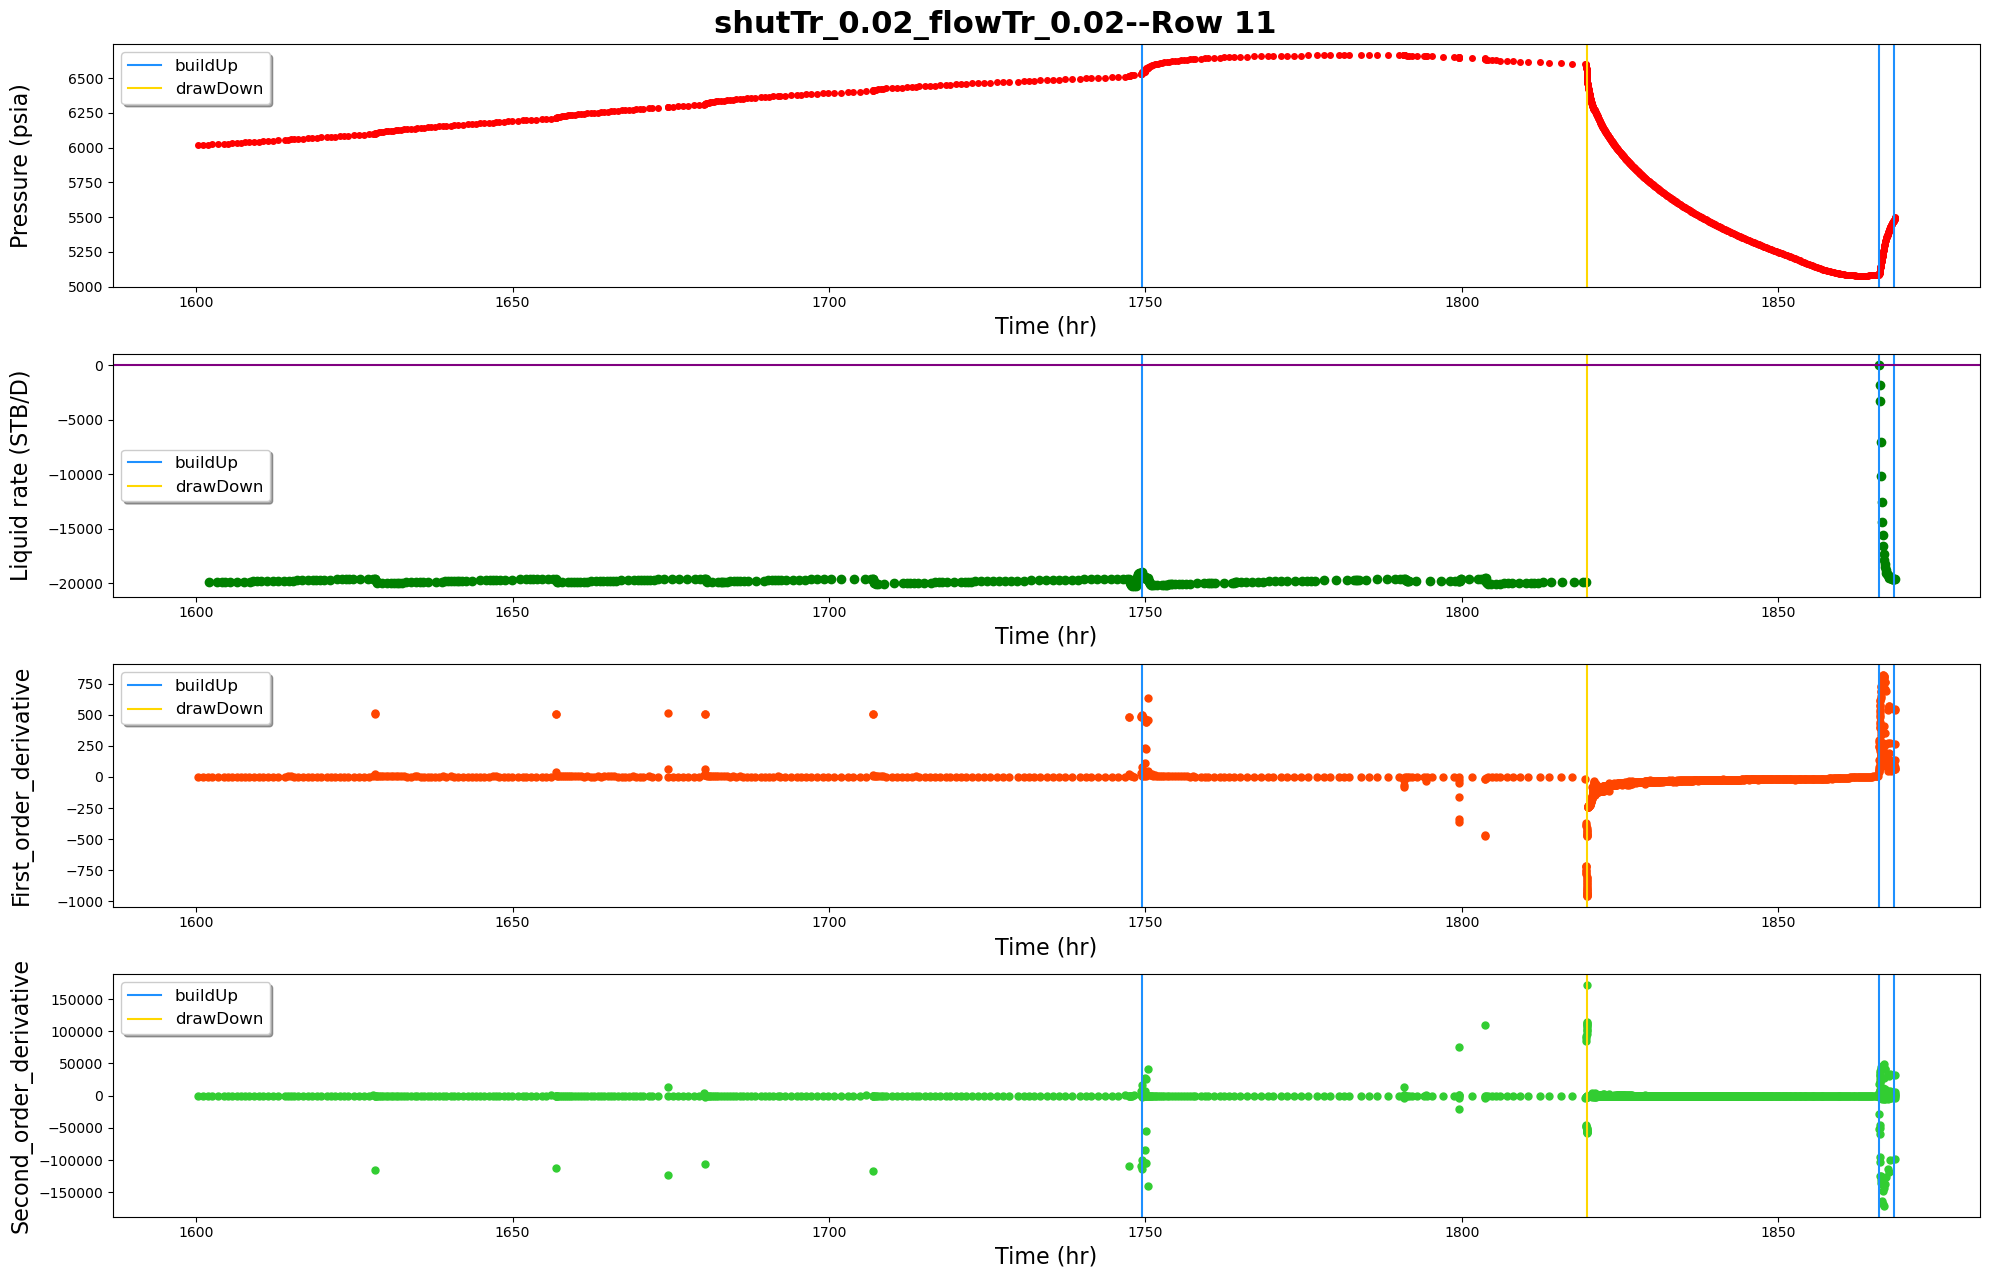

------row 12-----detected points:[13229, 13266, 13303, 13350, 13396, 13527, 13596, 13666, 13775, 13909, 14093, 14248, 14329]


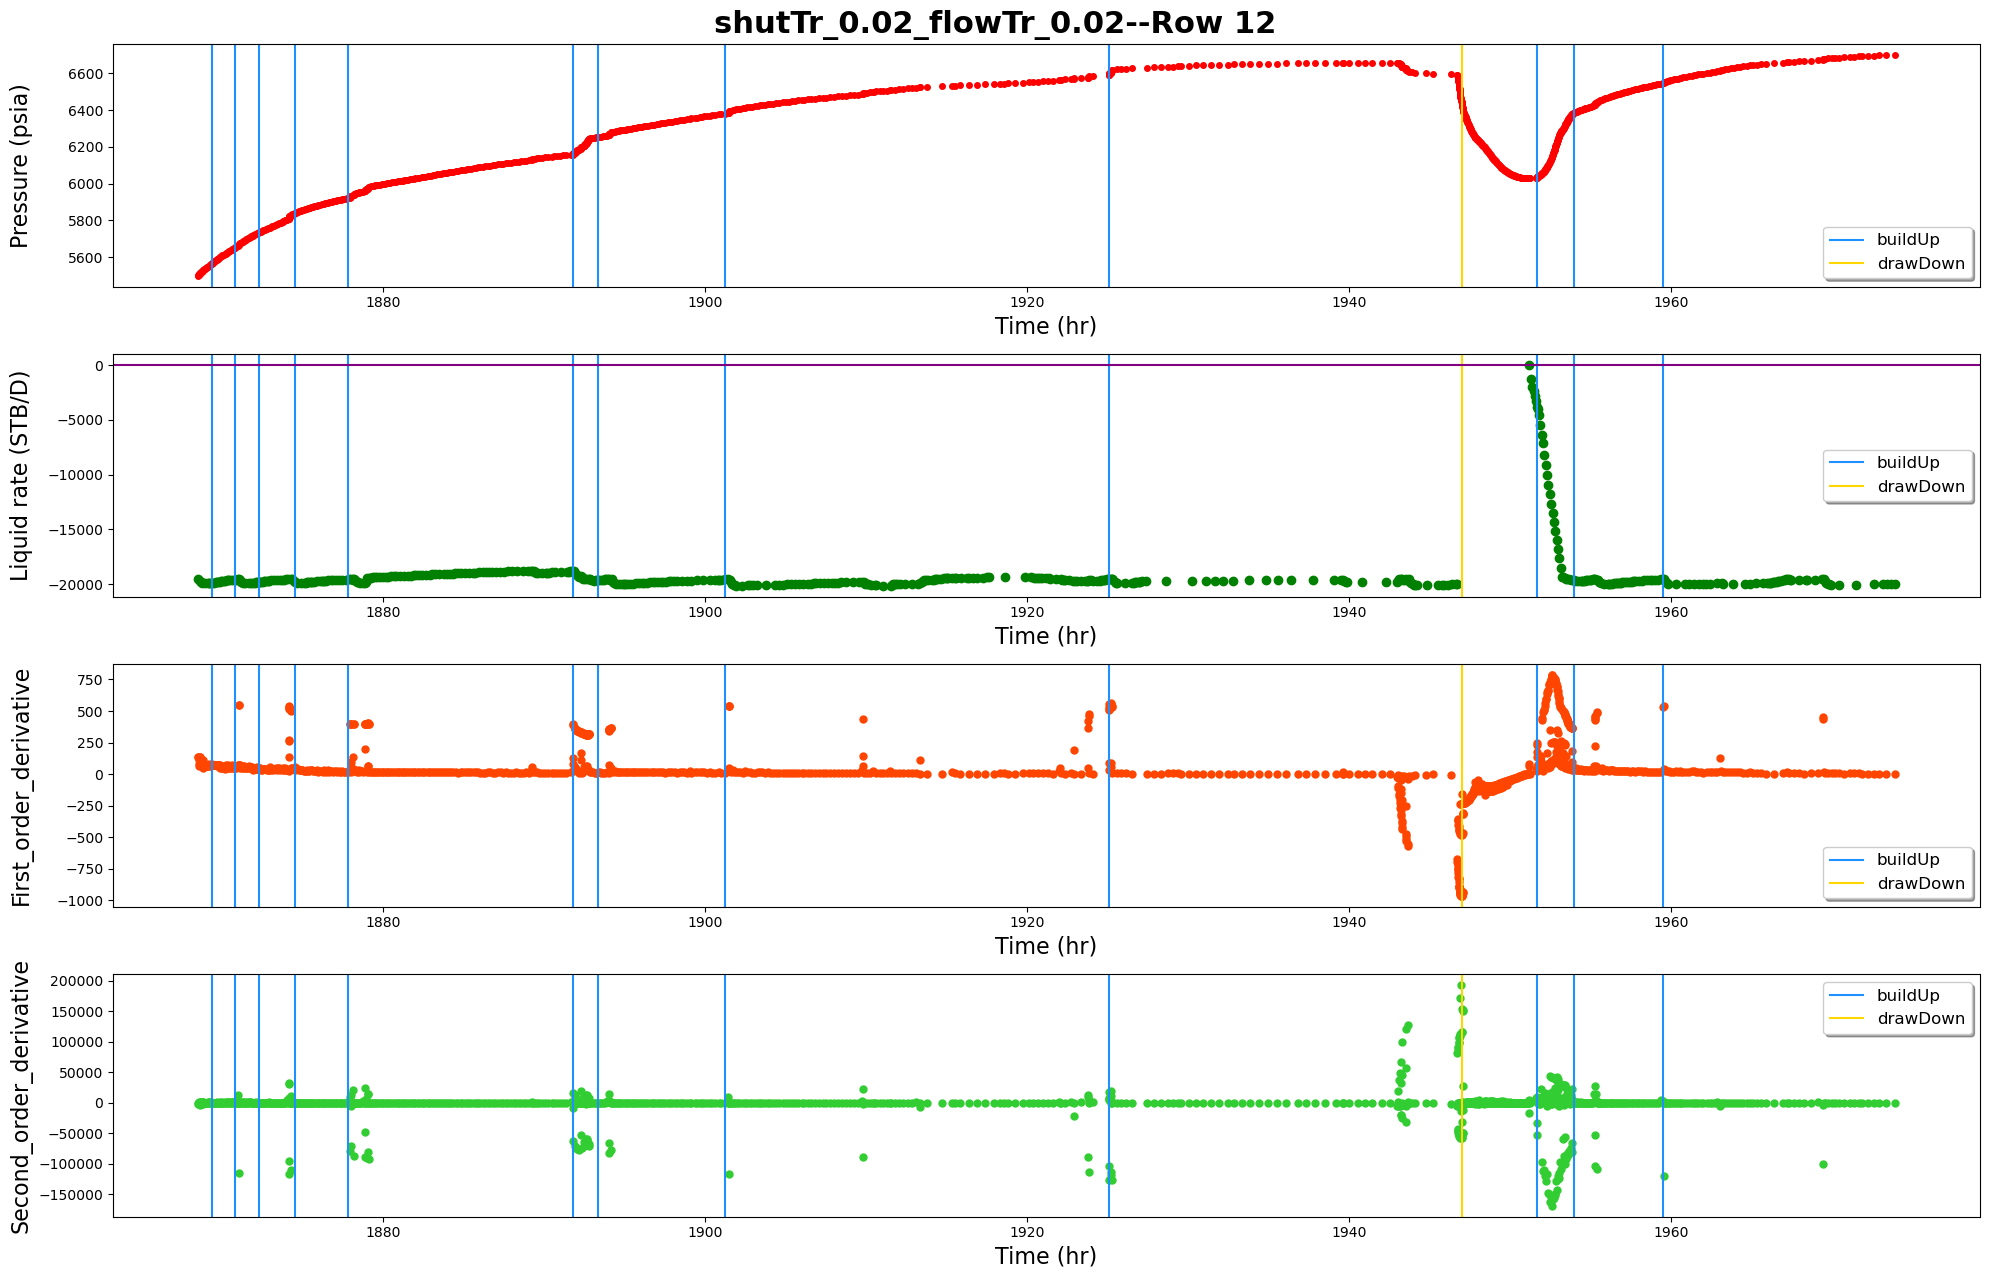

------row 13-----detected points:[14570, 14653, 14803, 15331, 15463, 15507, 15552]


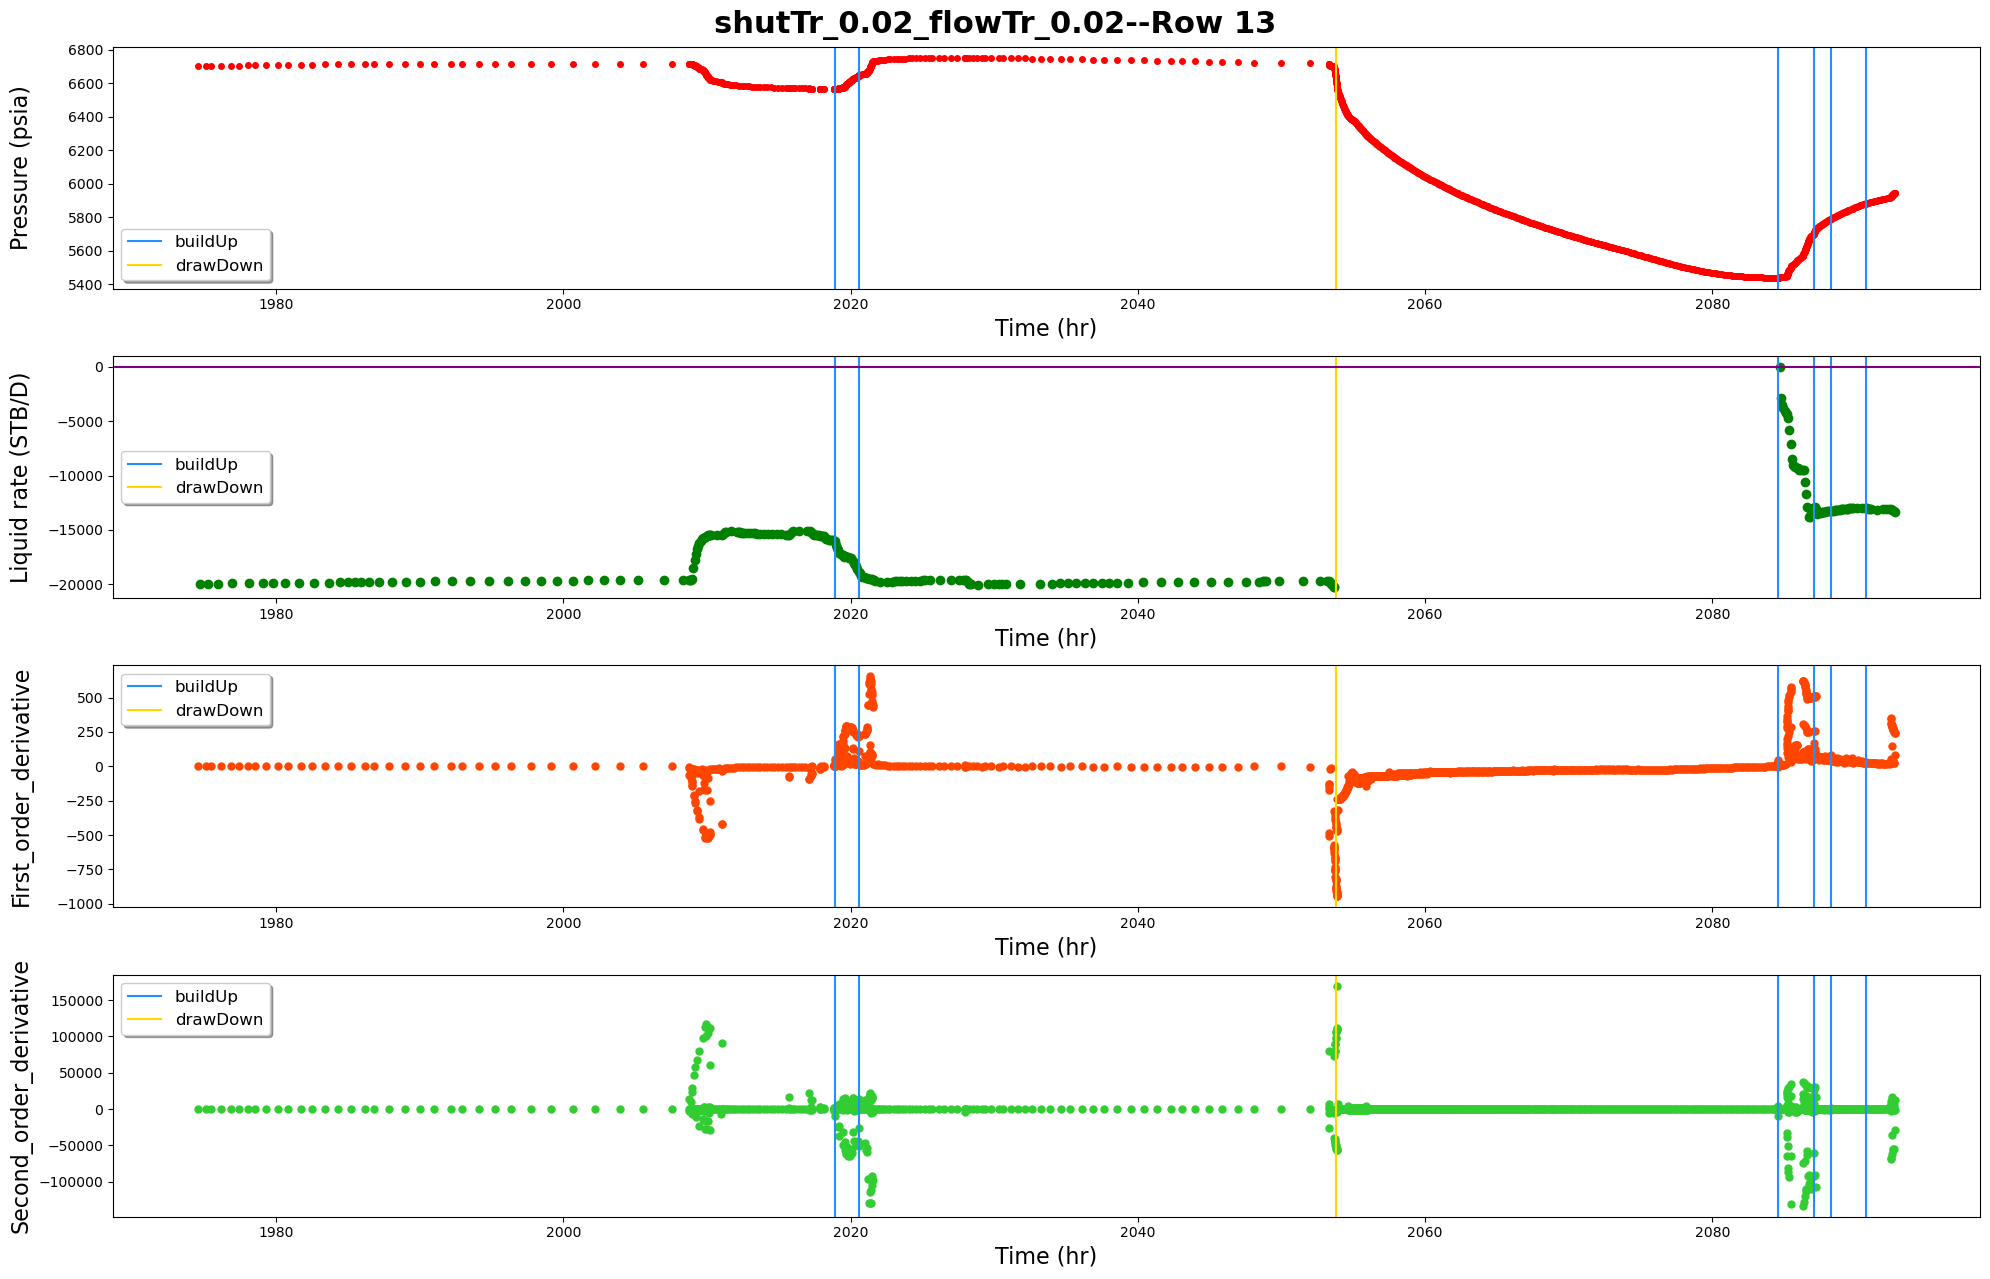

------row 14-----detected points:[15627, 15734, 15846, 15936, 16006, 16114, 16581, 16693, 16748]


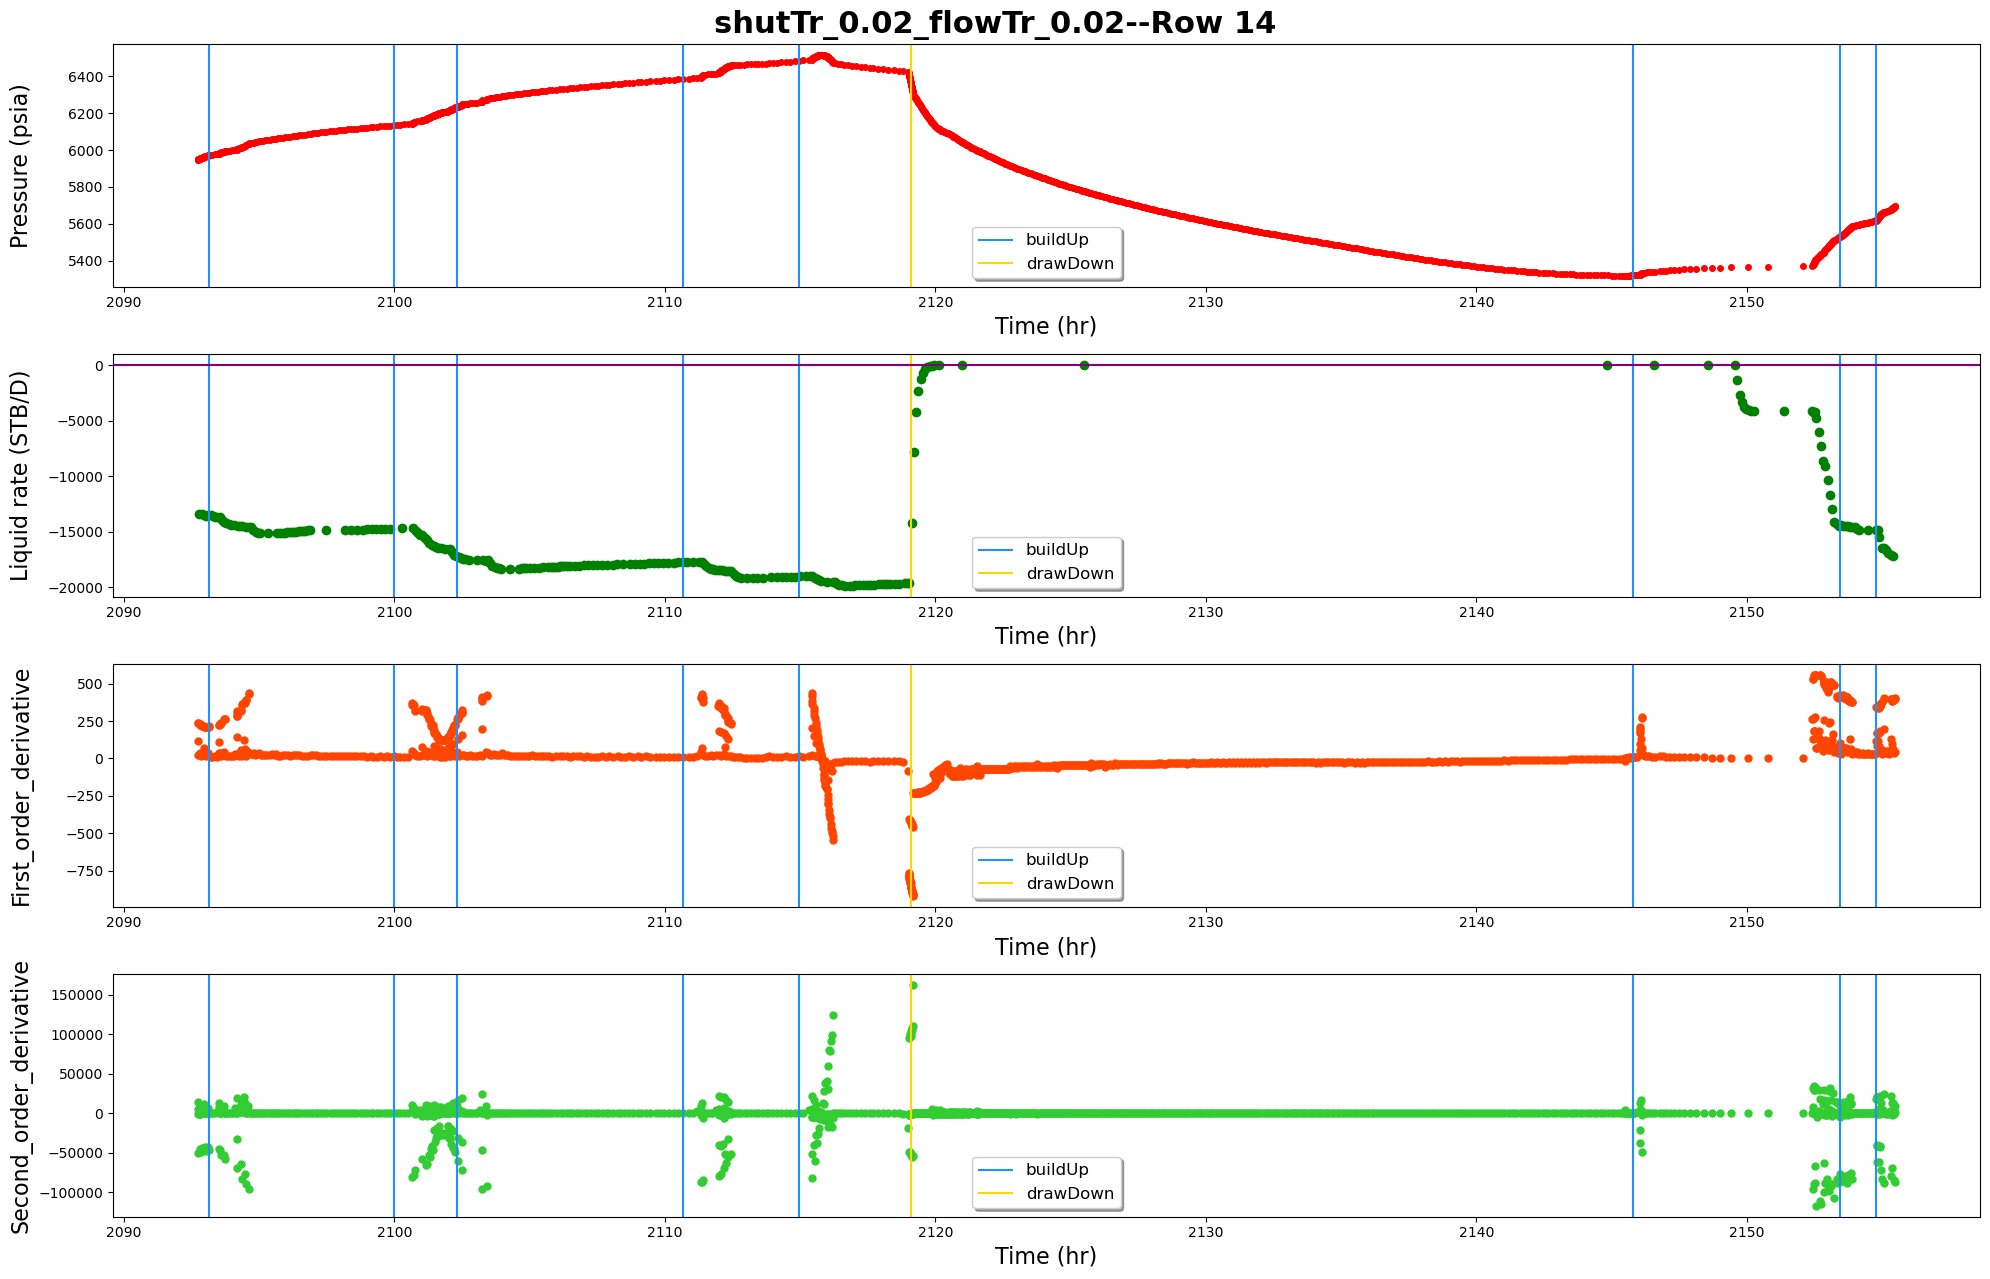

------row 15-----detected points:[16803, 16861, 16911, 17062, 17123, 17242, 17341, 17462, 17636]


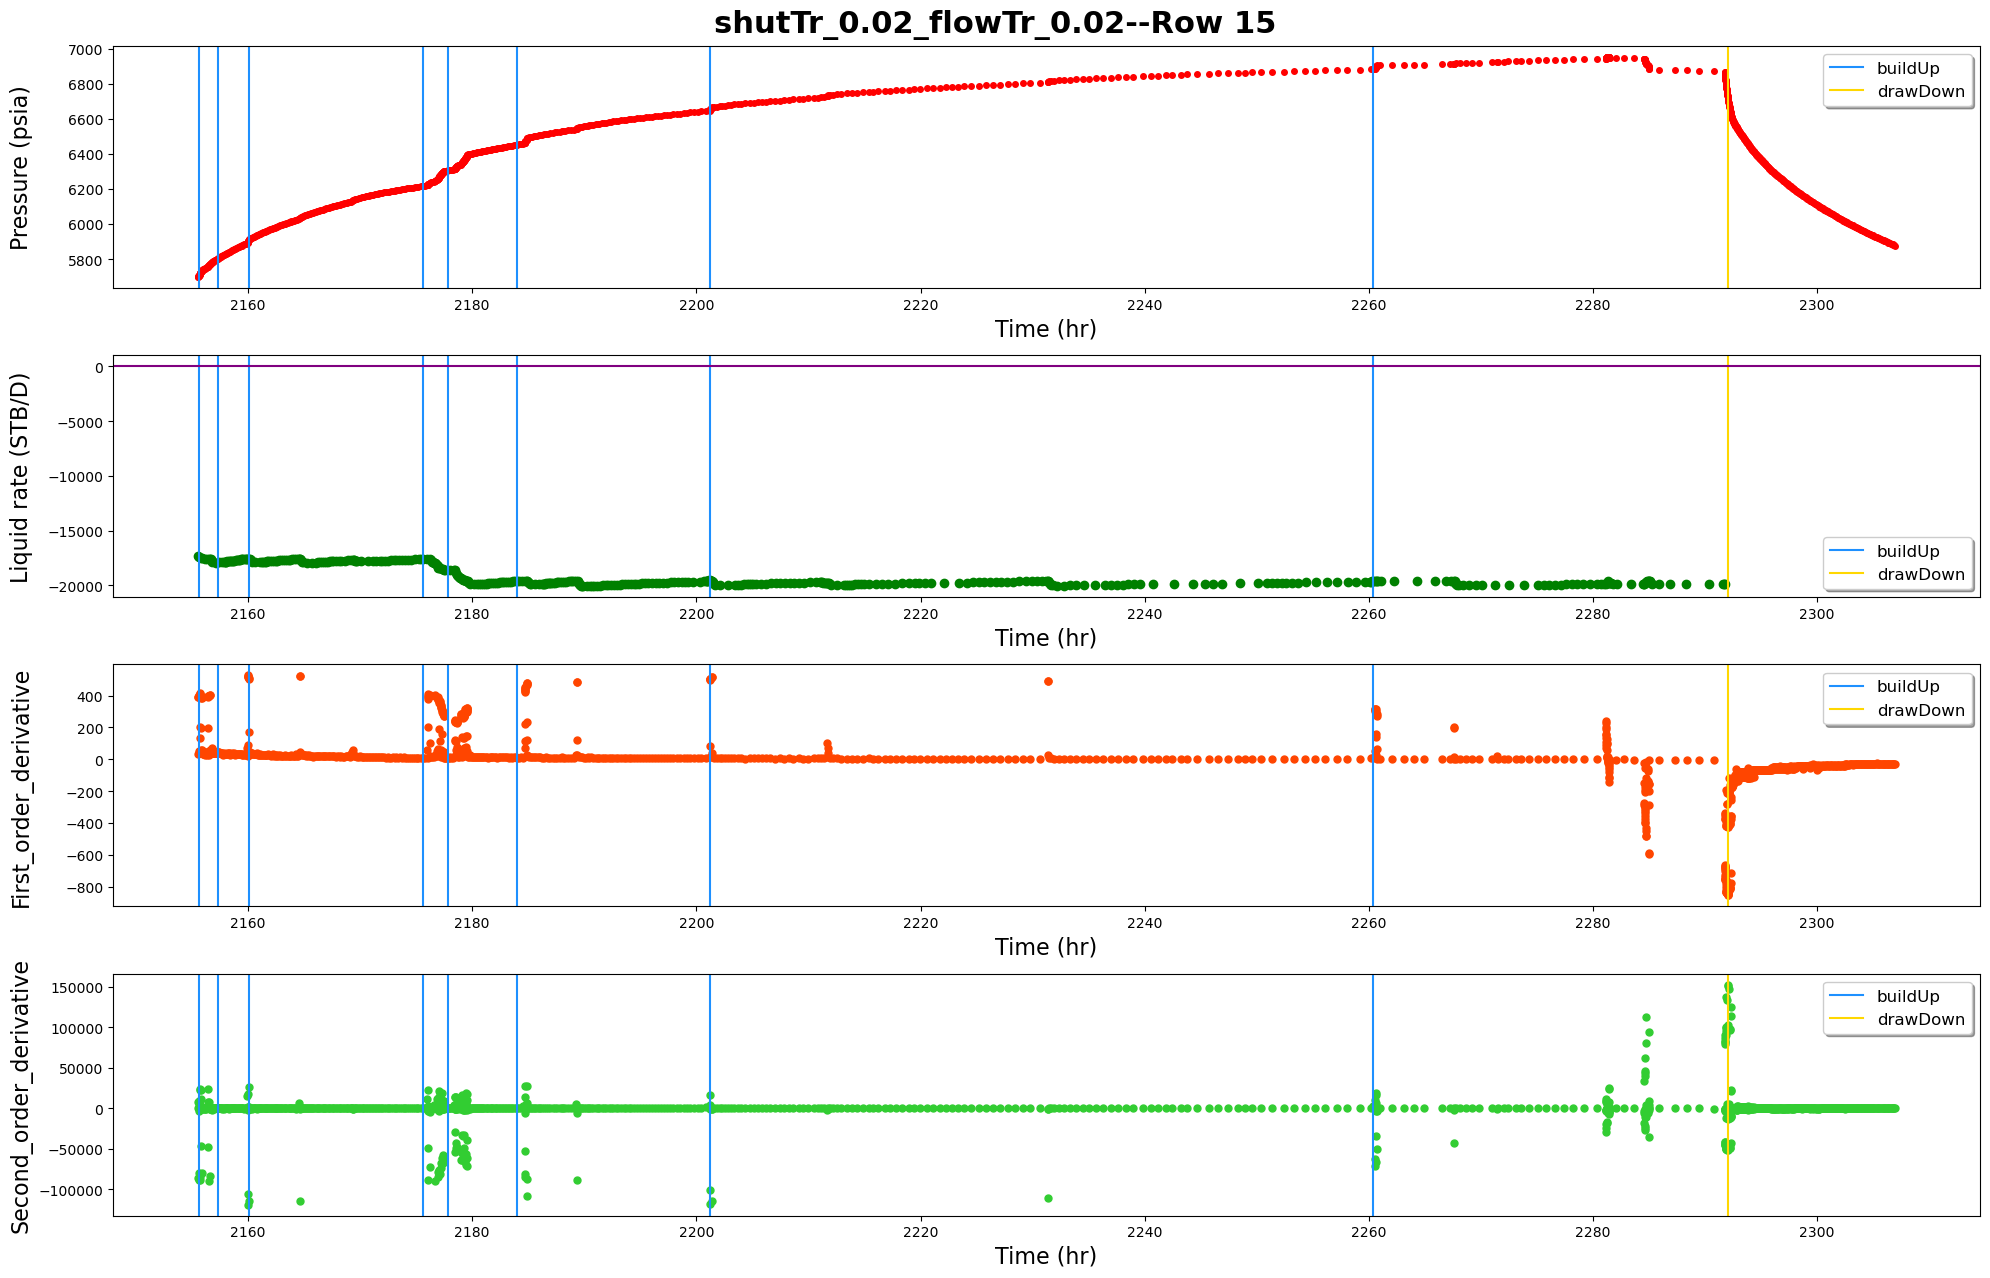

------row 16-----detected points:[18433, 18559, 18629, 18679, 18727, 18948, 18995, 19051, 19098, 19160]


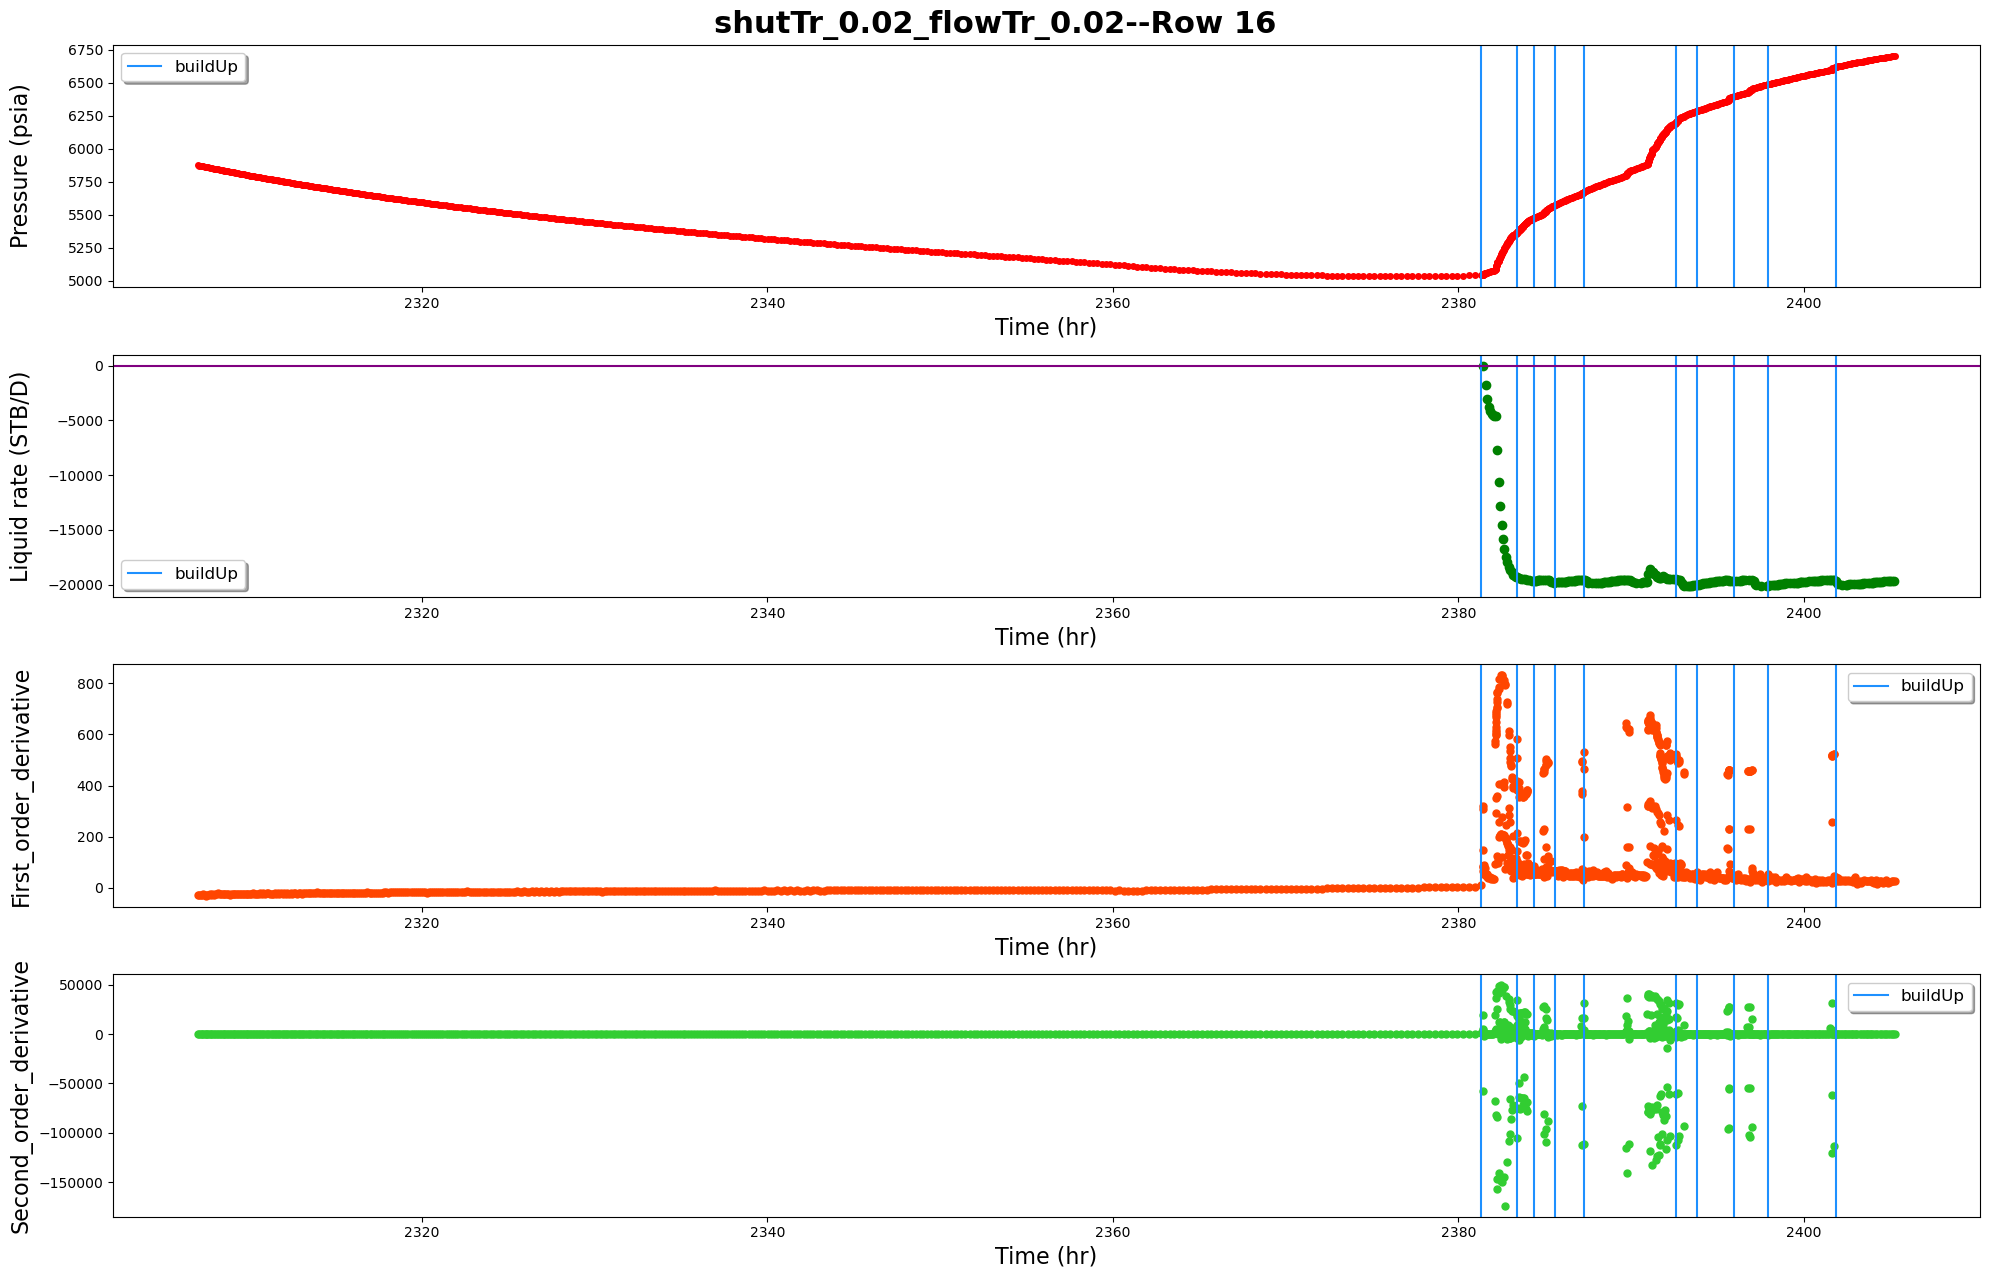

------row 17-----detected points:[19290, 19459, 19557, 19666, 19766, 19901, 20065, 20335]


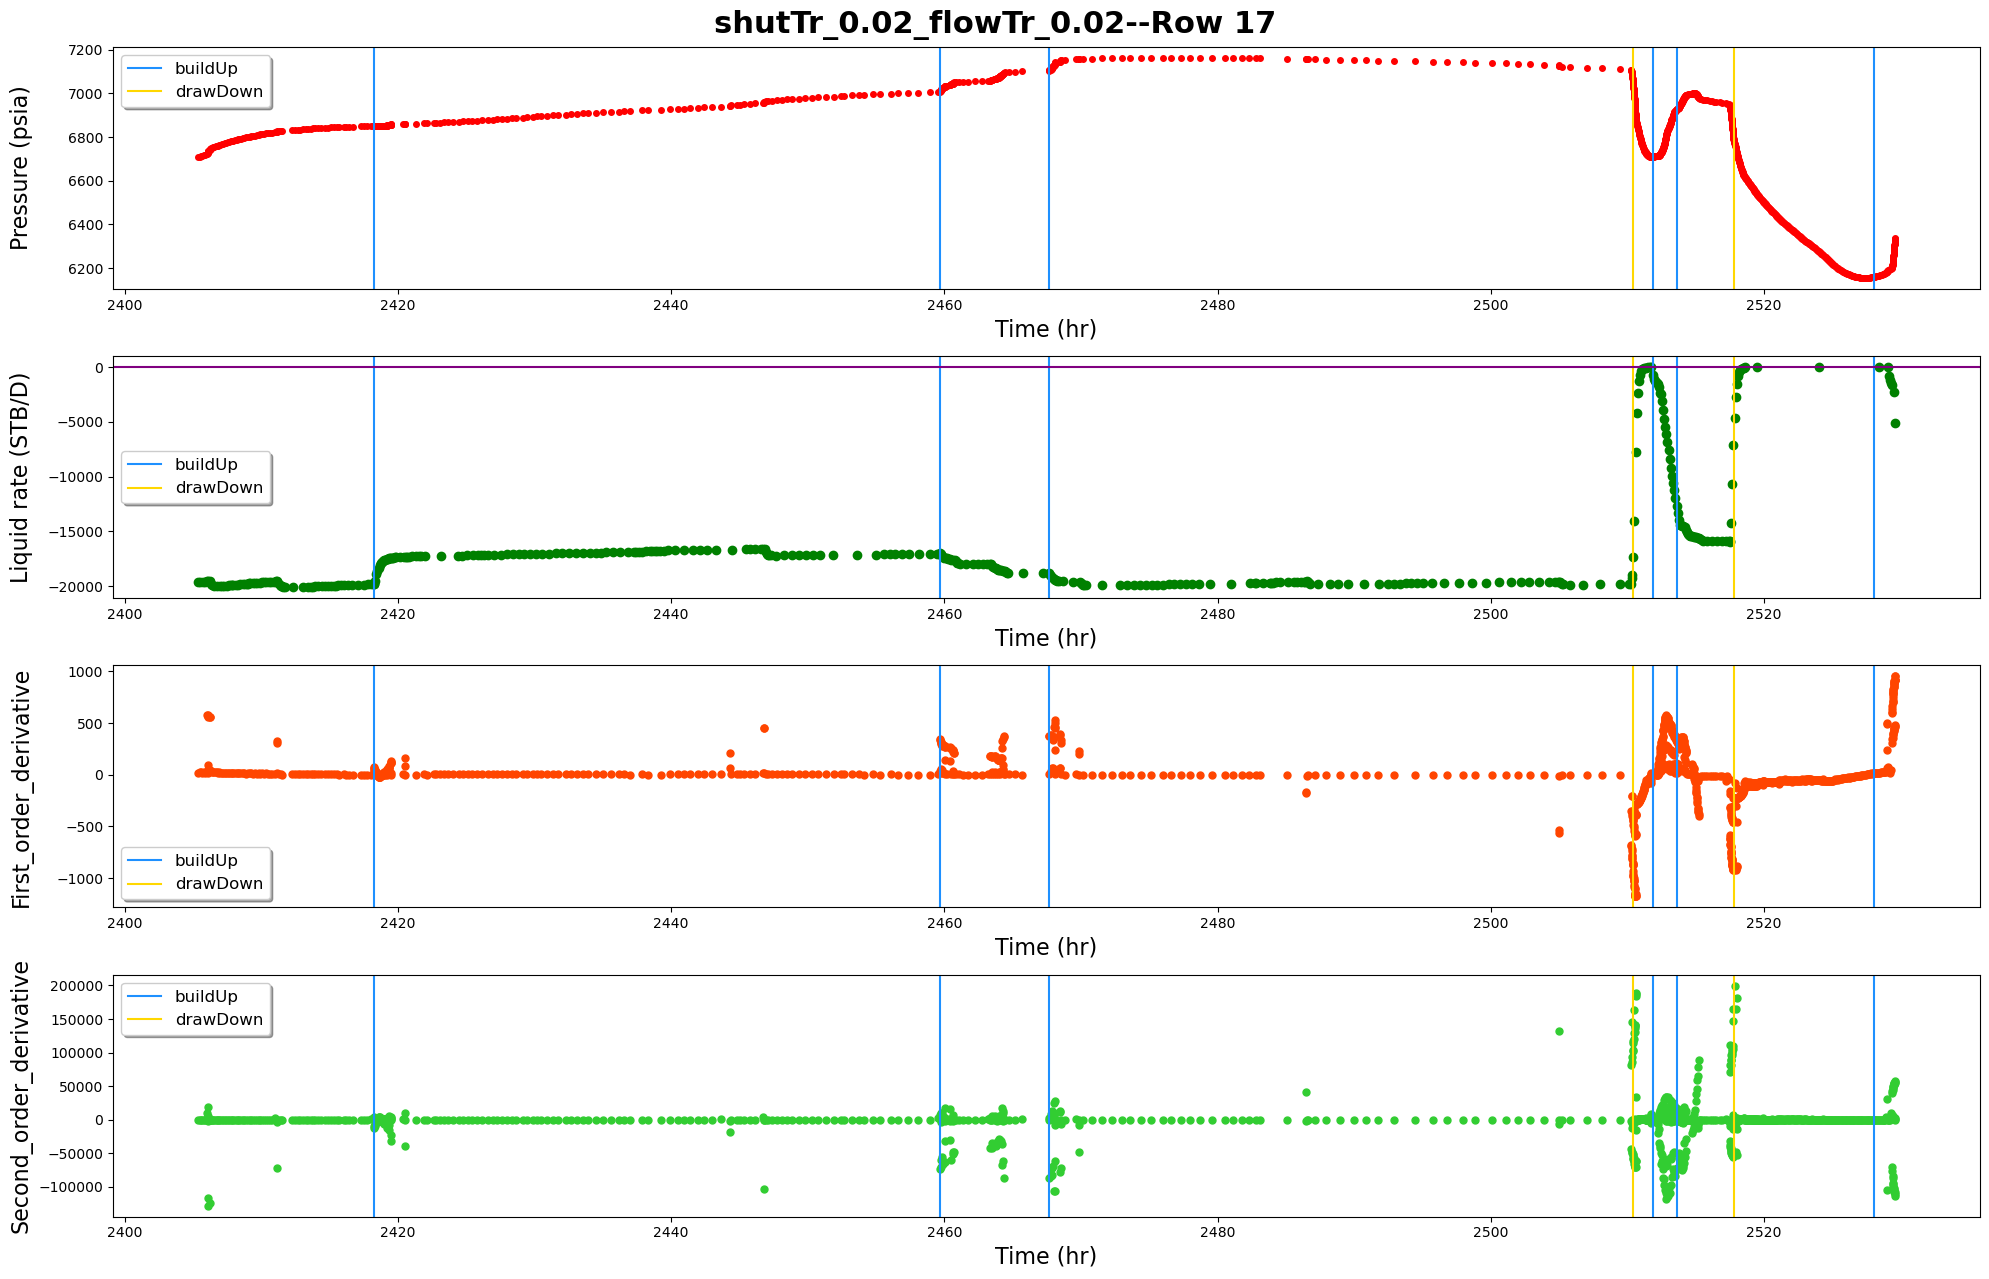

------row 18-----detected points:[20475, 20538, 20582, 20742, 21027, 21209, 21304, 21404, 21485, 21582]


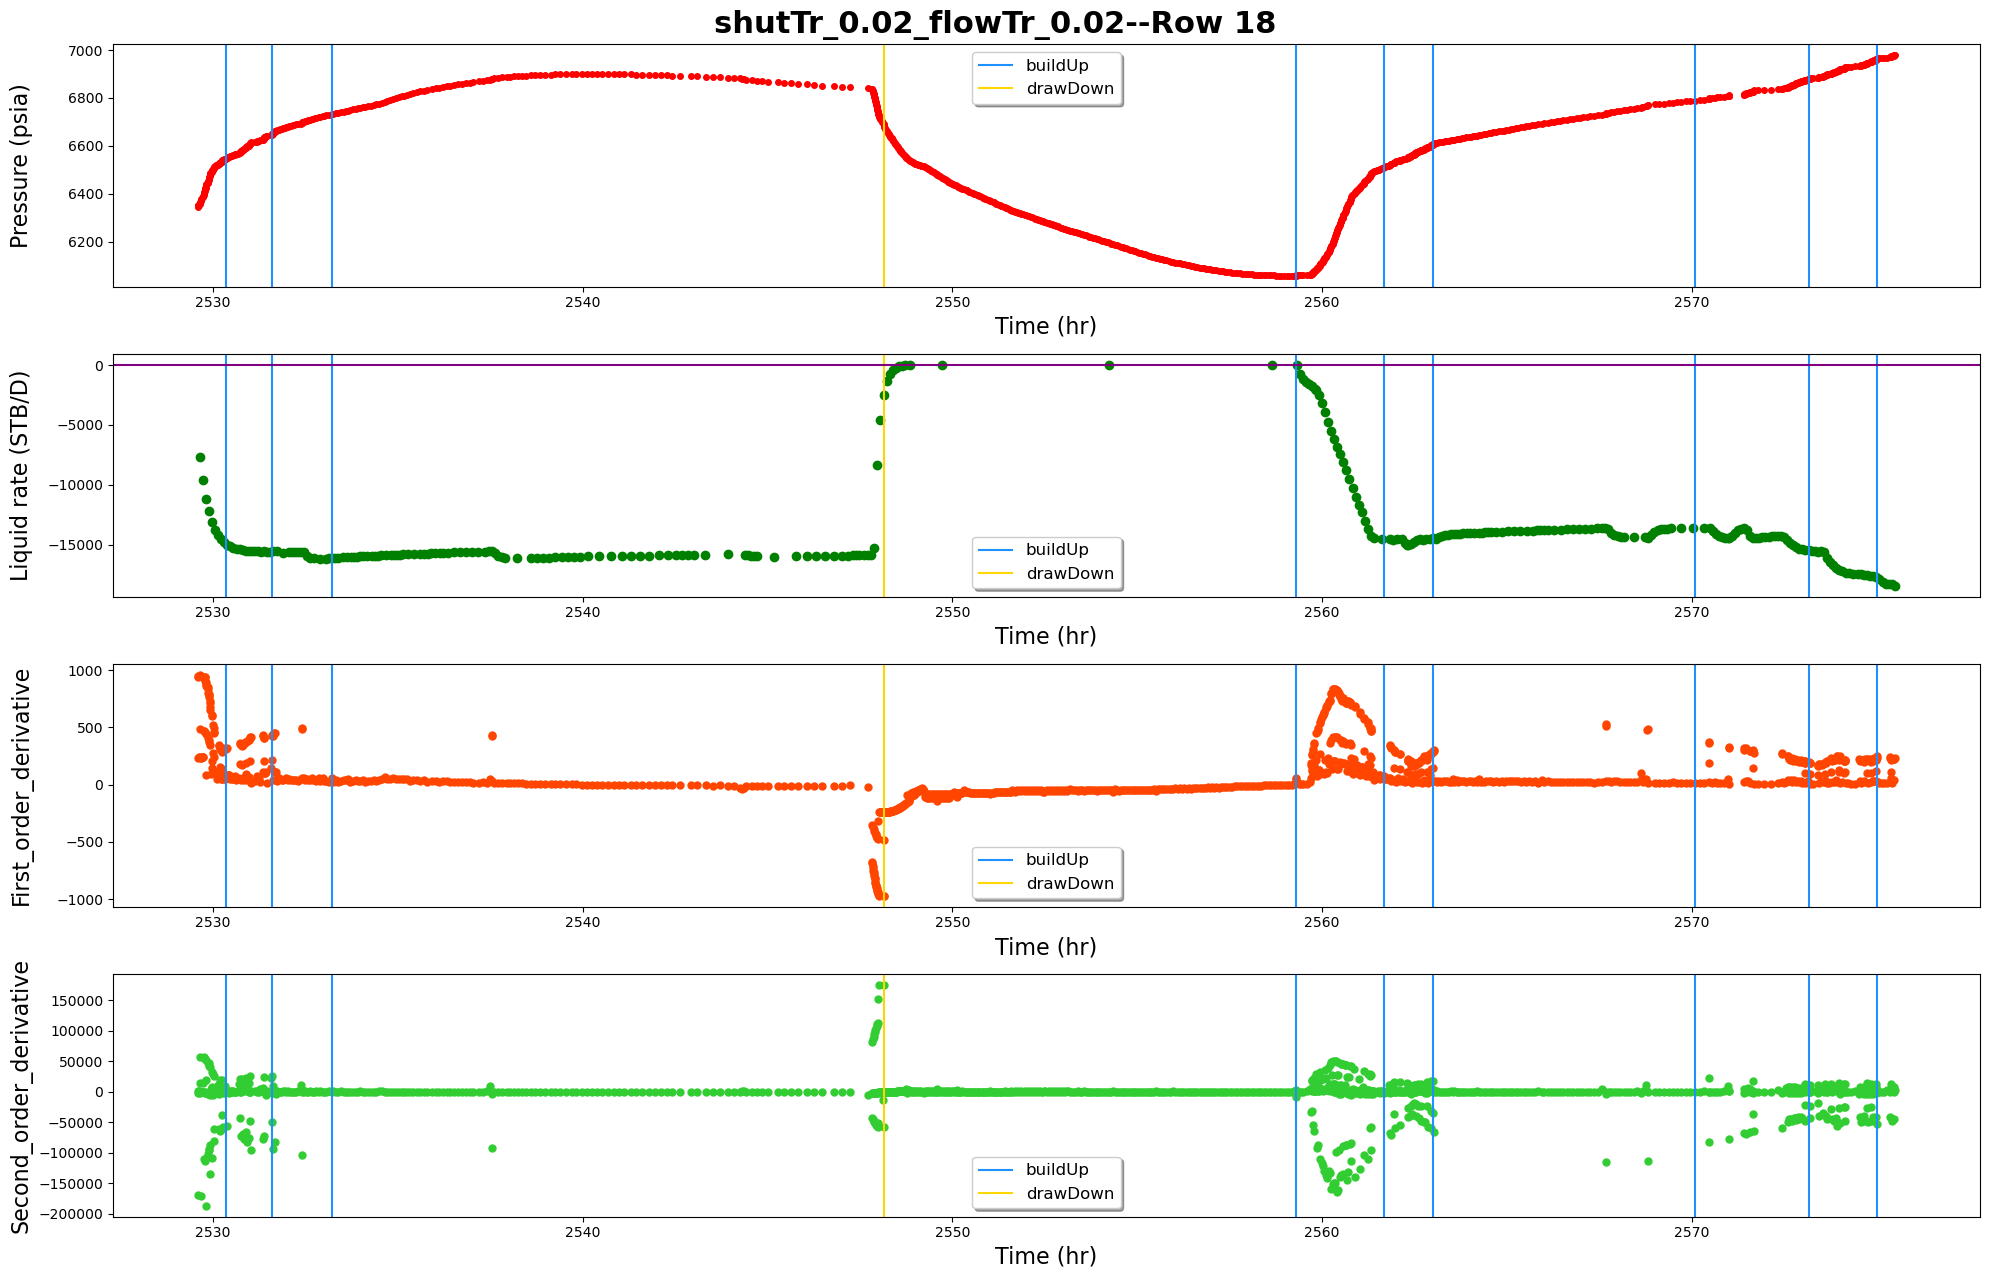

------row 19-----detected points:[21687, 21782, 21987, 22183, 22317, 22382, 22472, 22542, 22620, 22740]


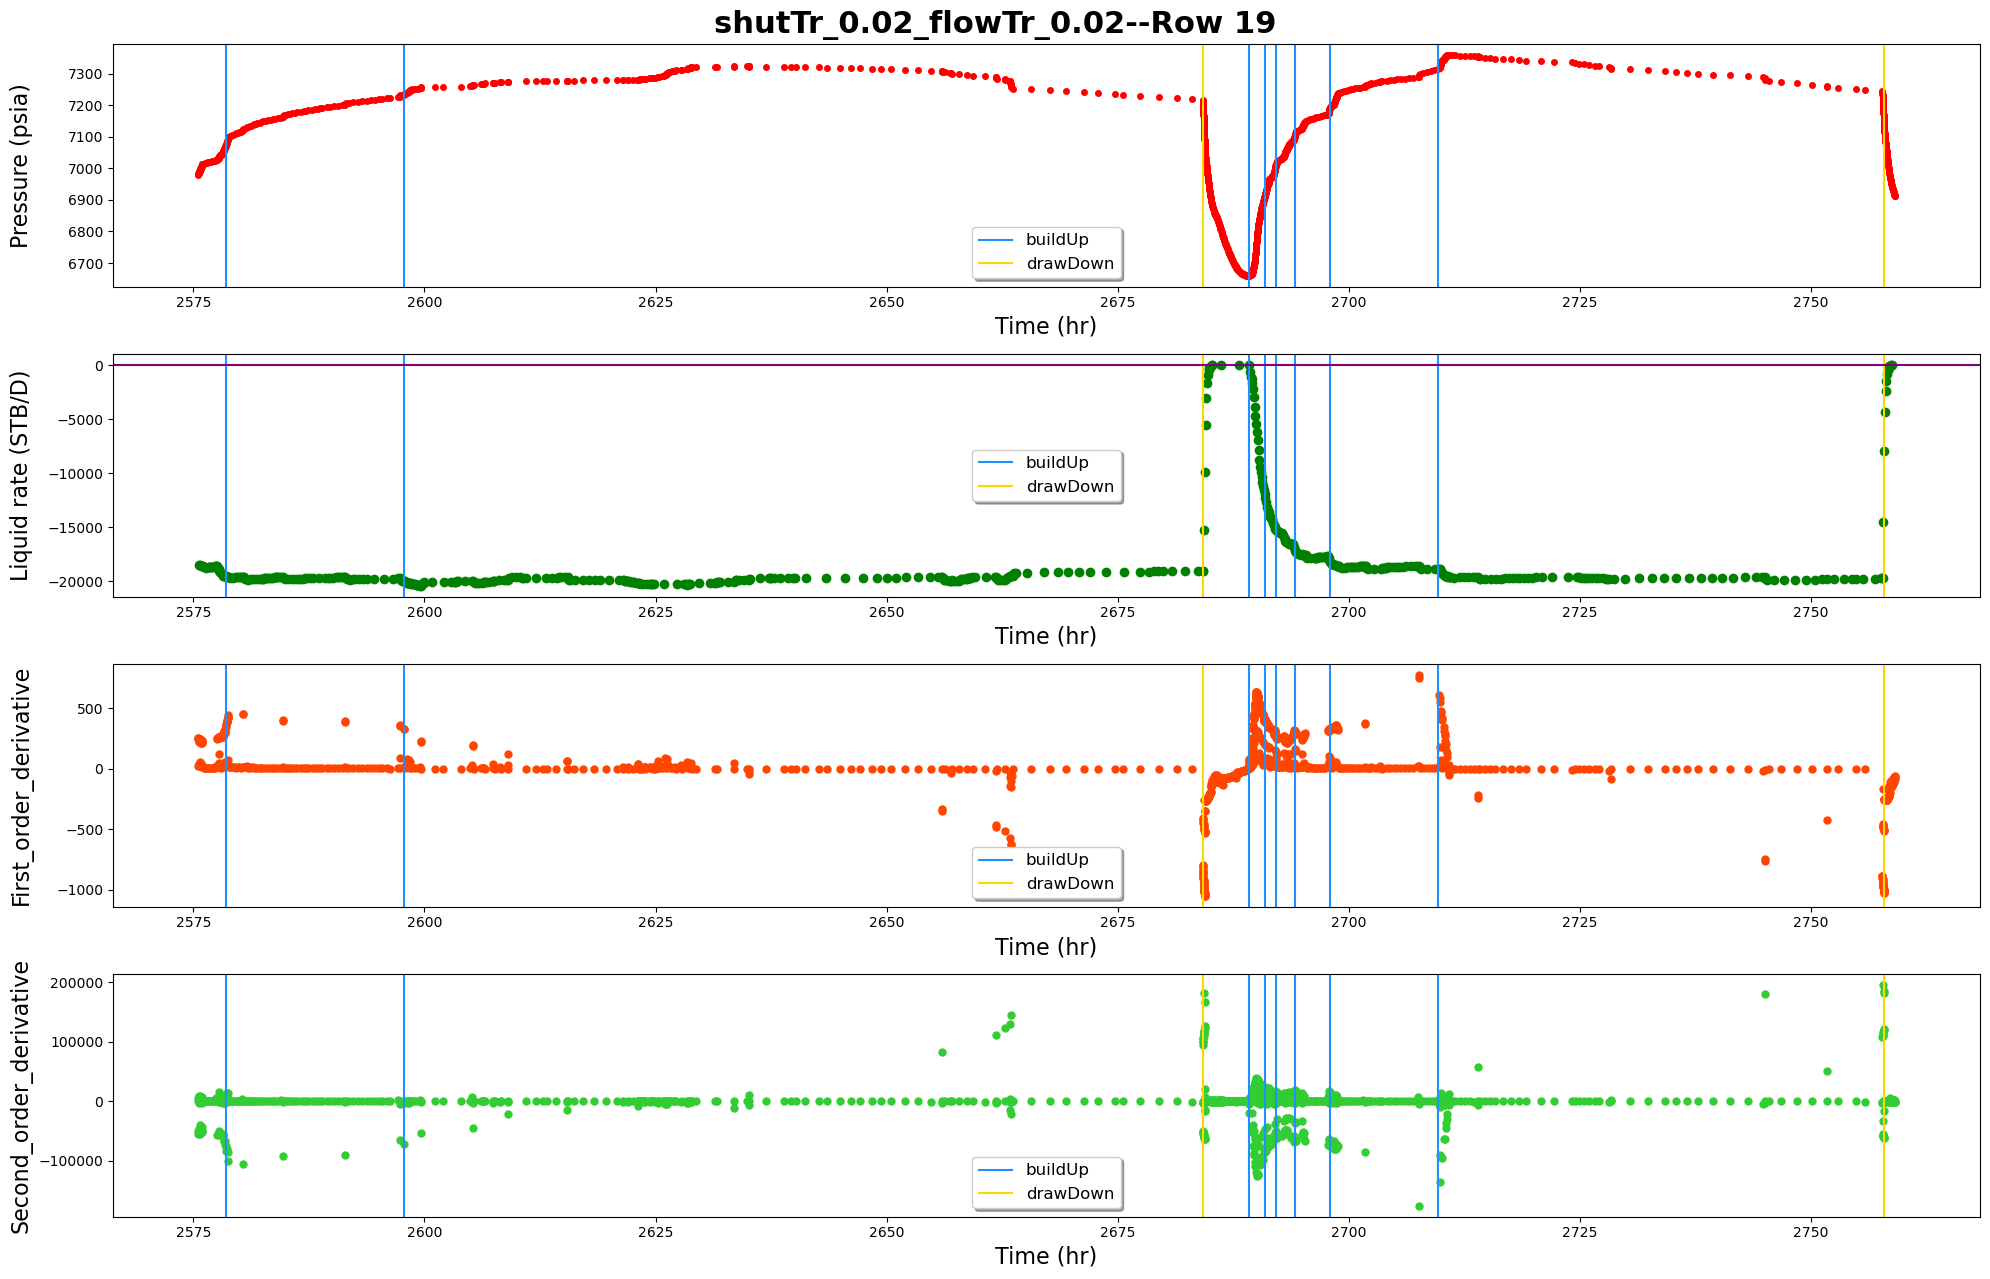

------row 20-----detected points:[23220, 23416, 23480, 23636, 23773, 23869, 23927]


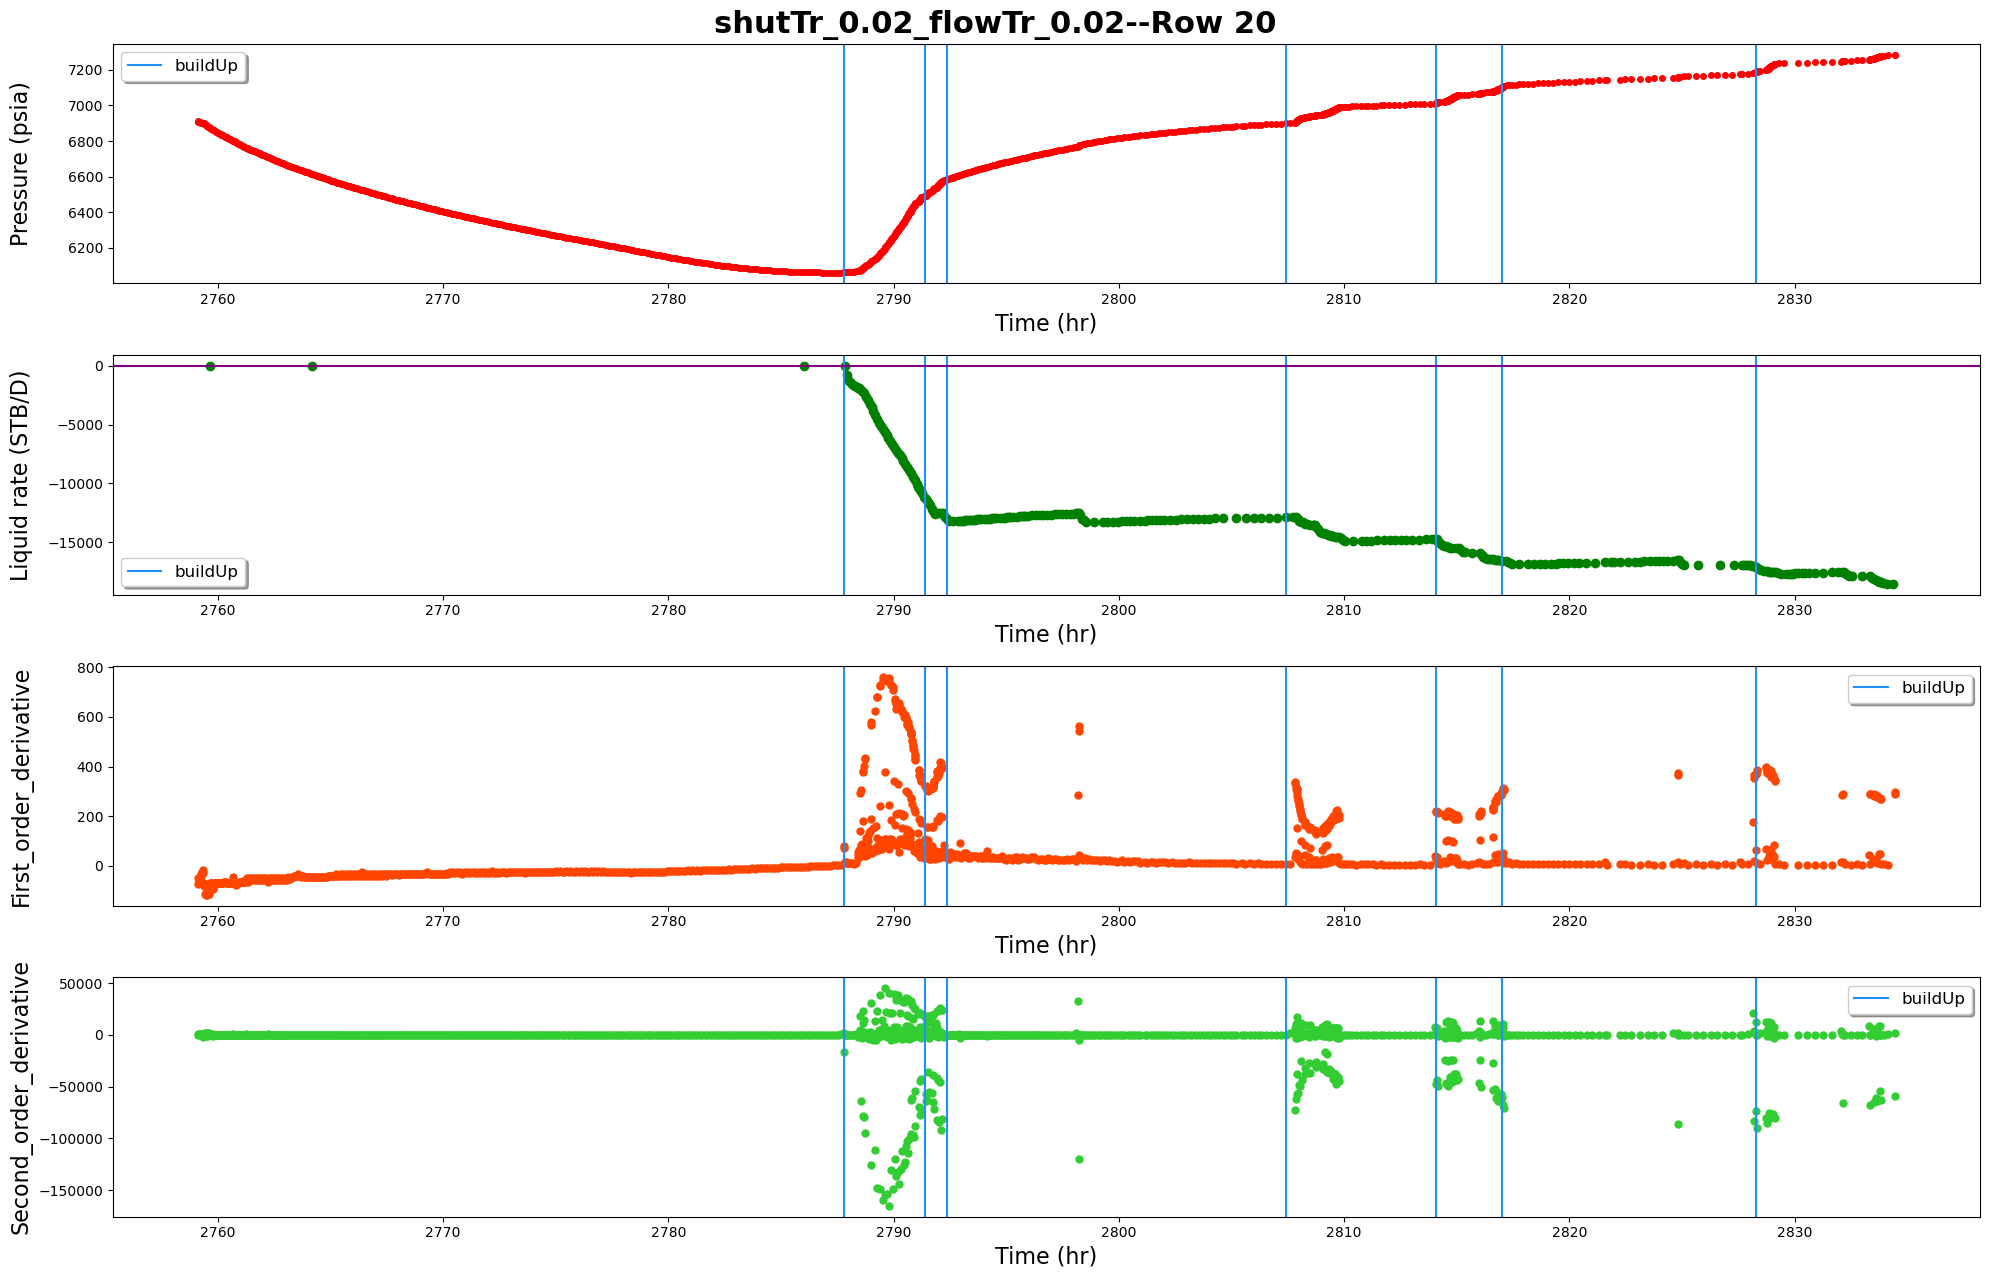

------row 21-----detected points:[24001, 24068, 24263, 24686, 24831, 24973, 25196]


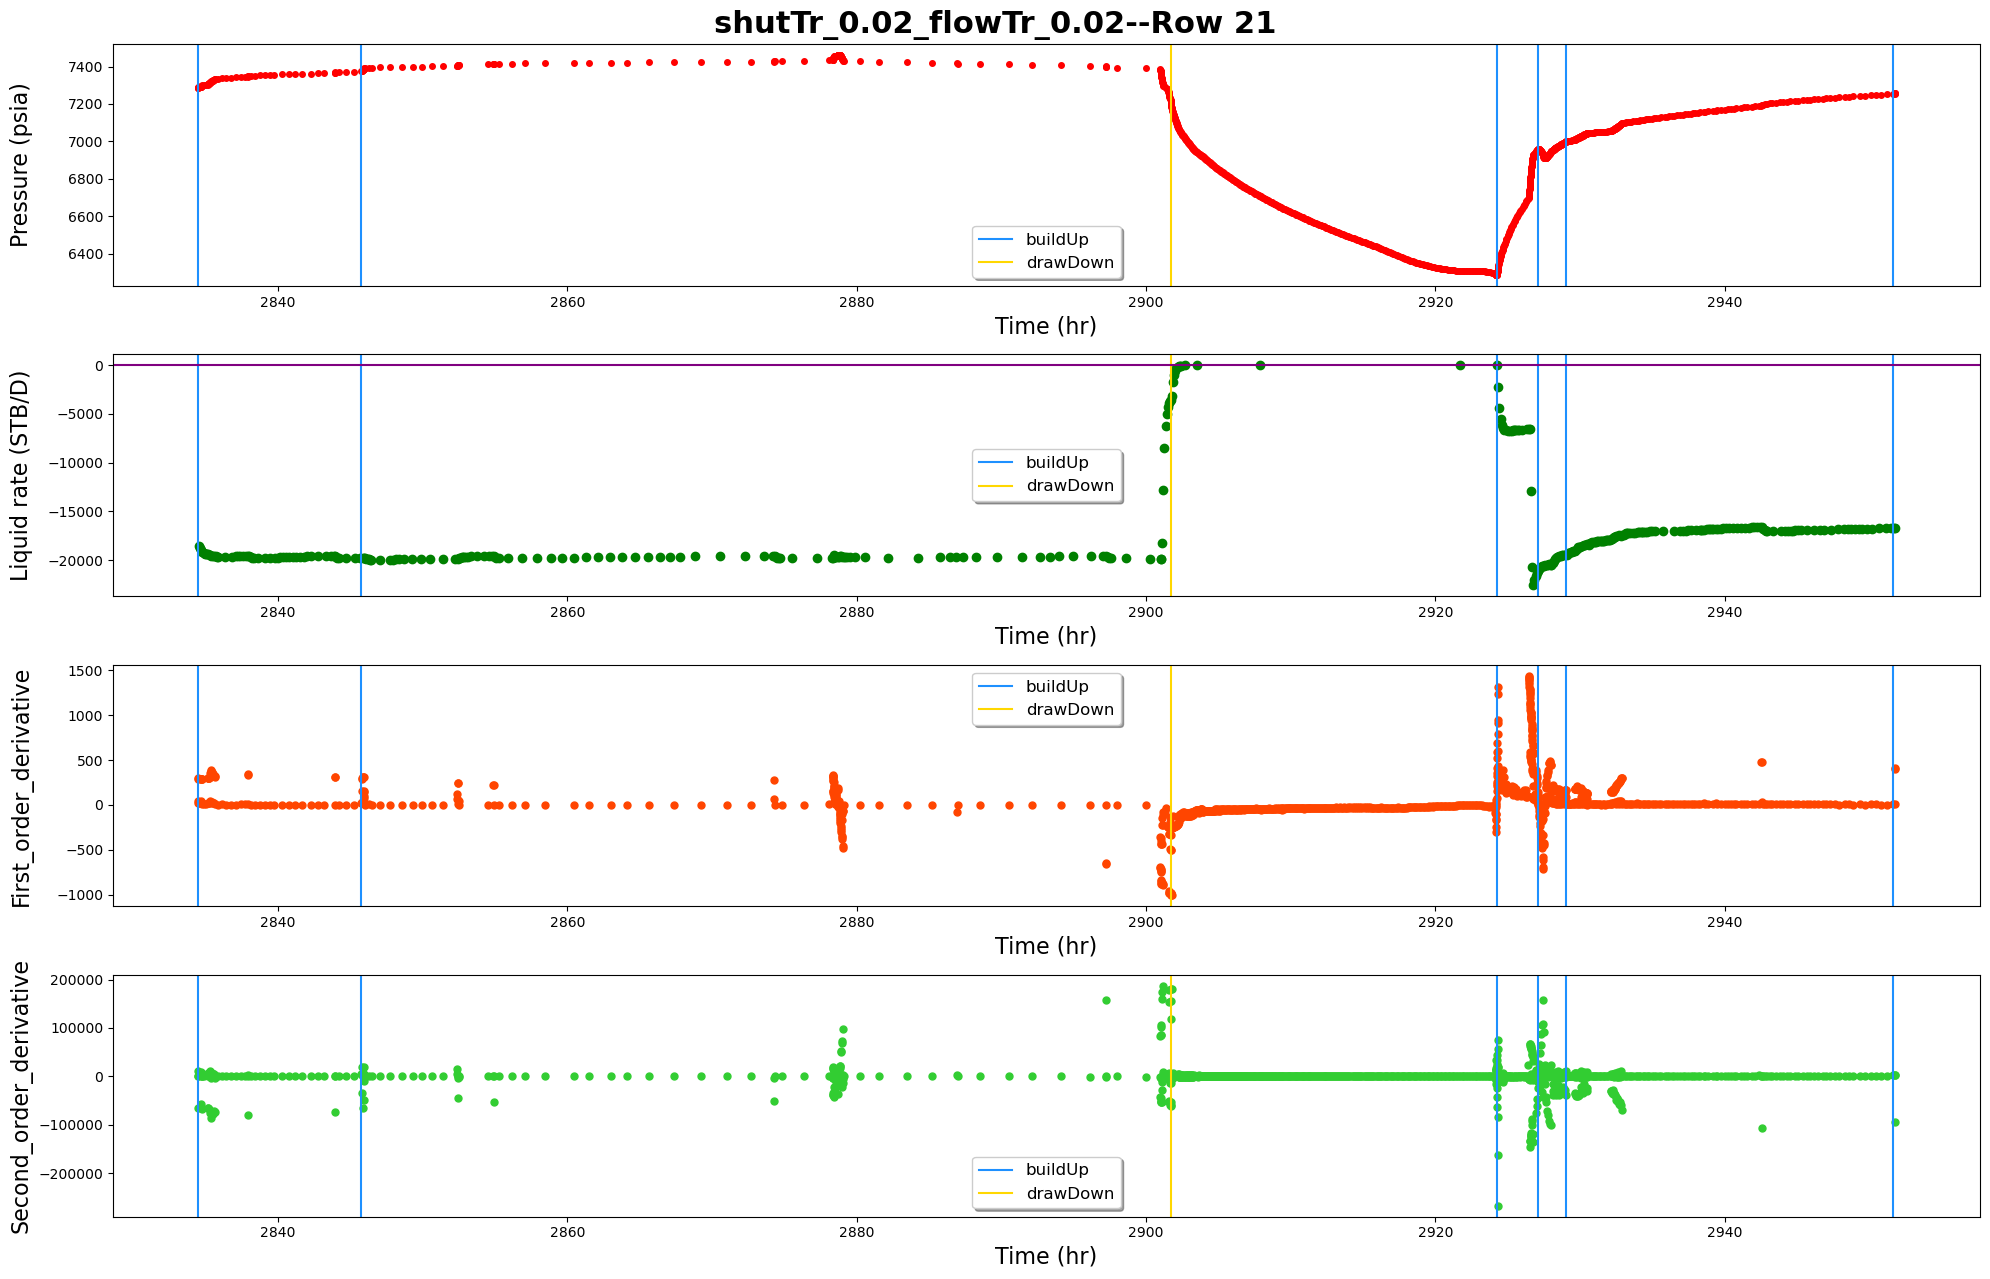

------row 22-----detected points:[25276, 25342, 25775, 25995, 26125, 26172, 26289]


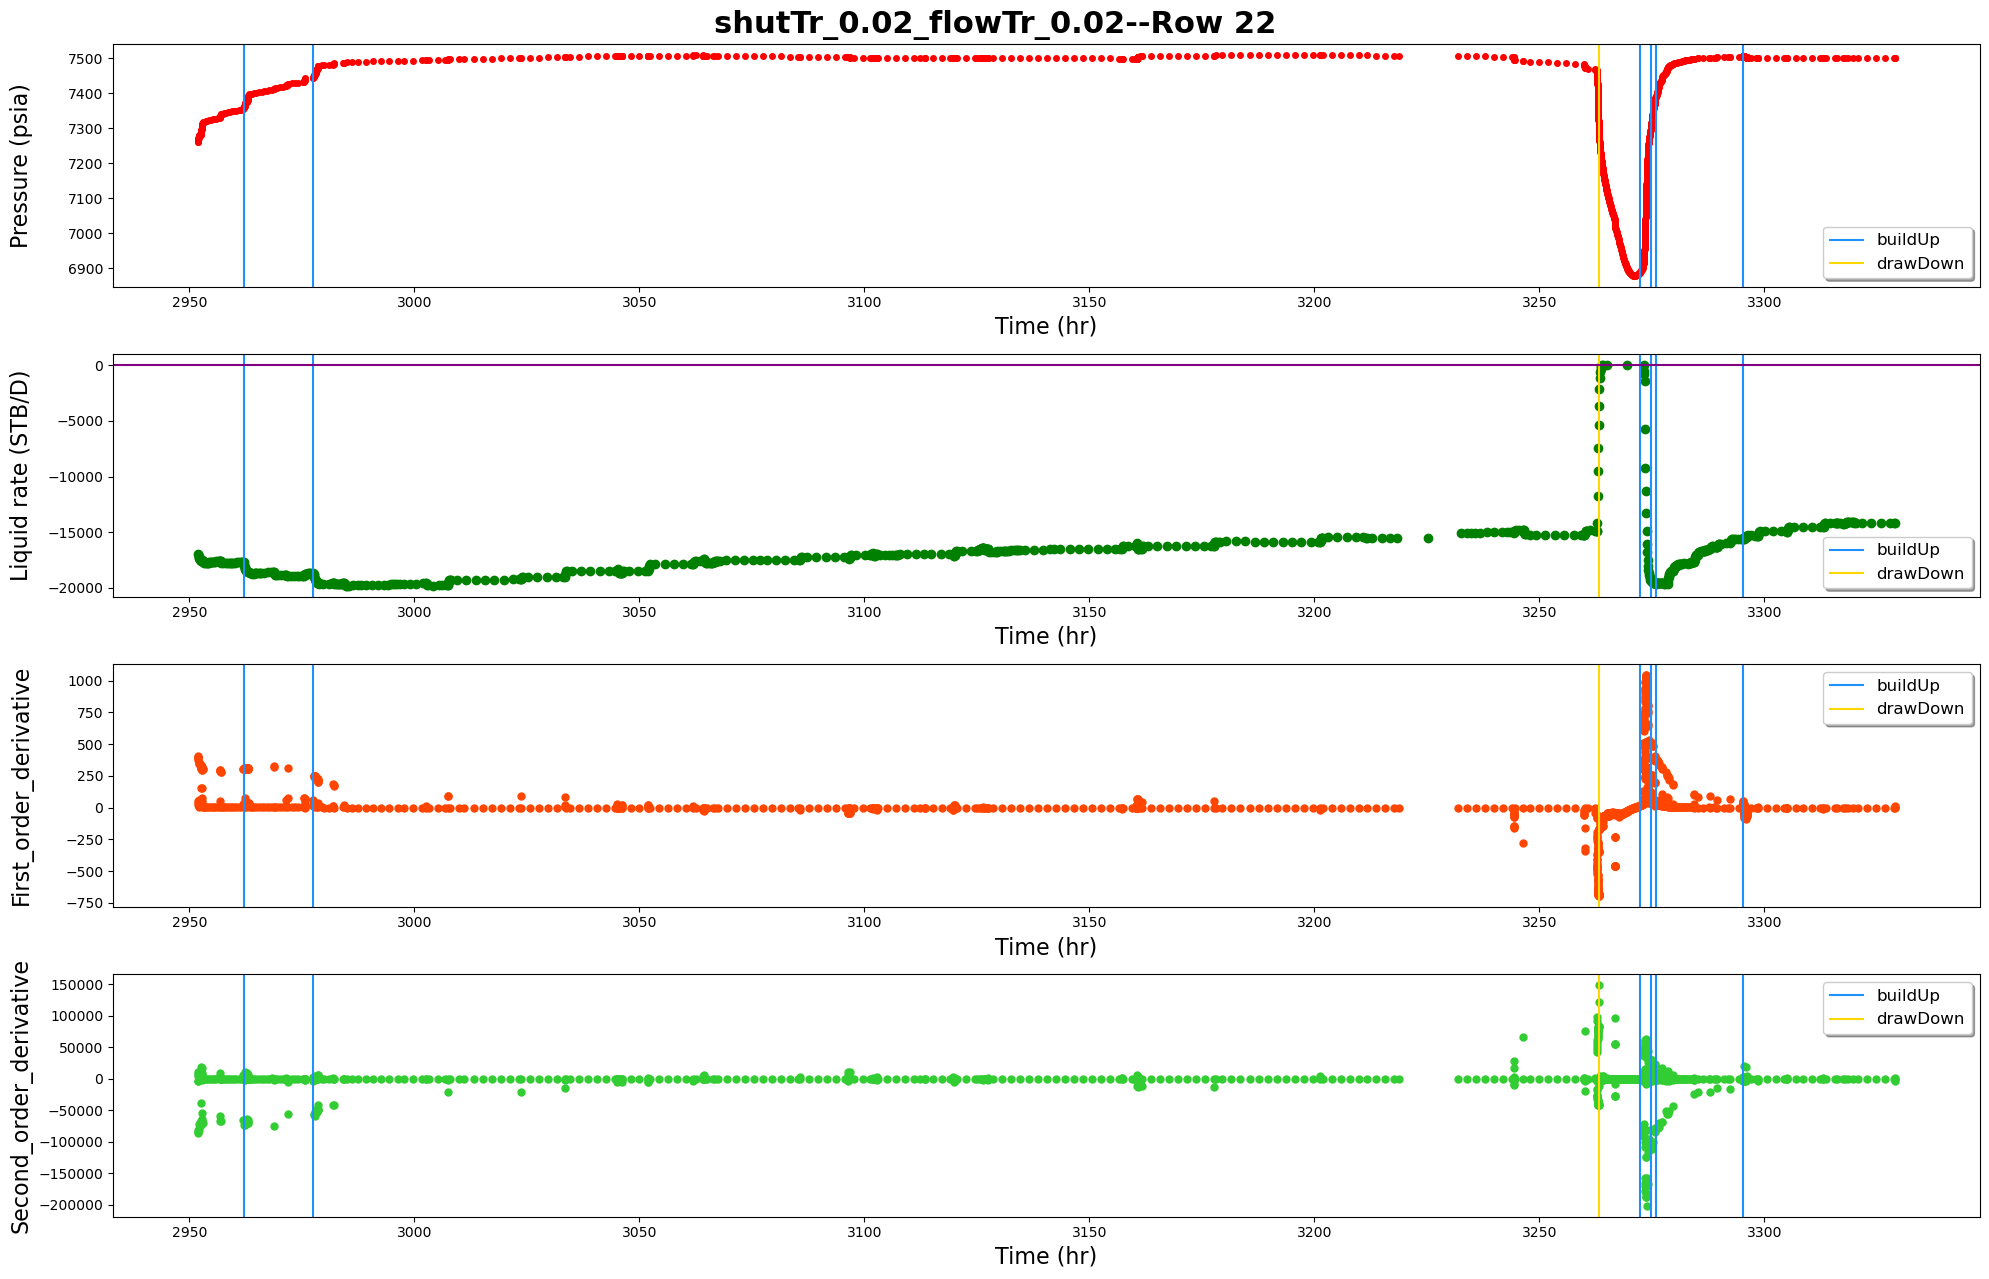

------row 23-----detected points:[26541, 26693, 26763, 27058, 27316, 27514, 27556]


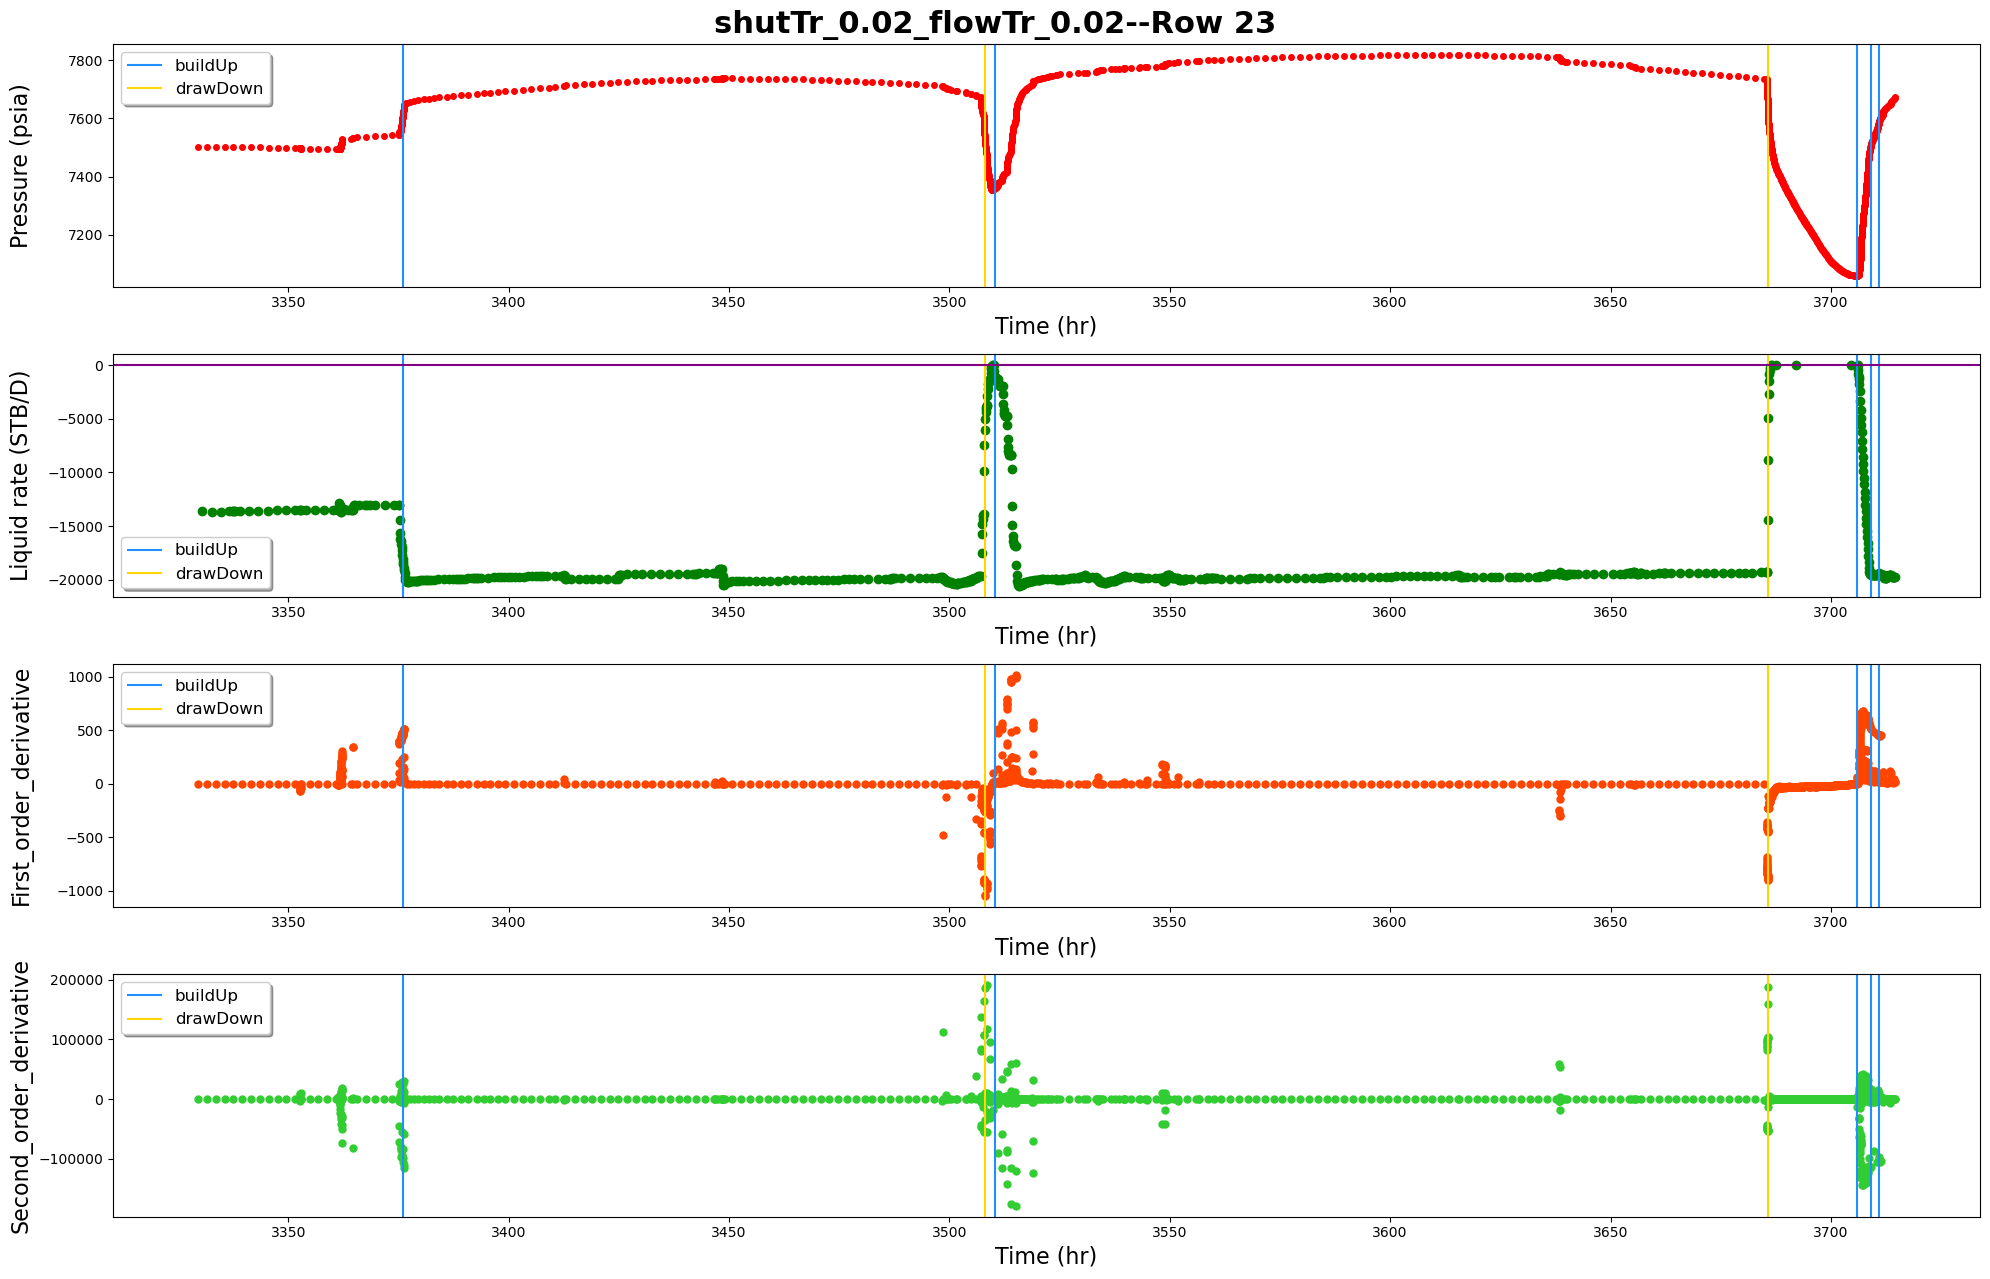

------row 24-----detected points:[27700, 27825, 27963, 28132, 28232, 28332, 28508, 28649, 28784]


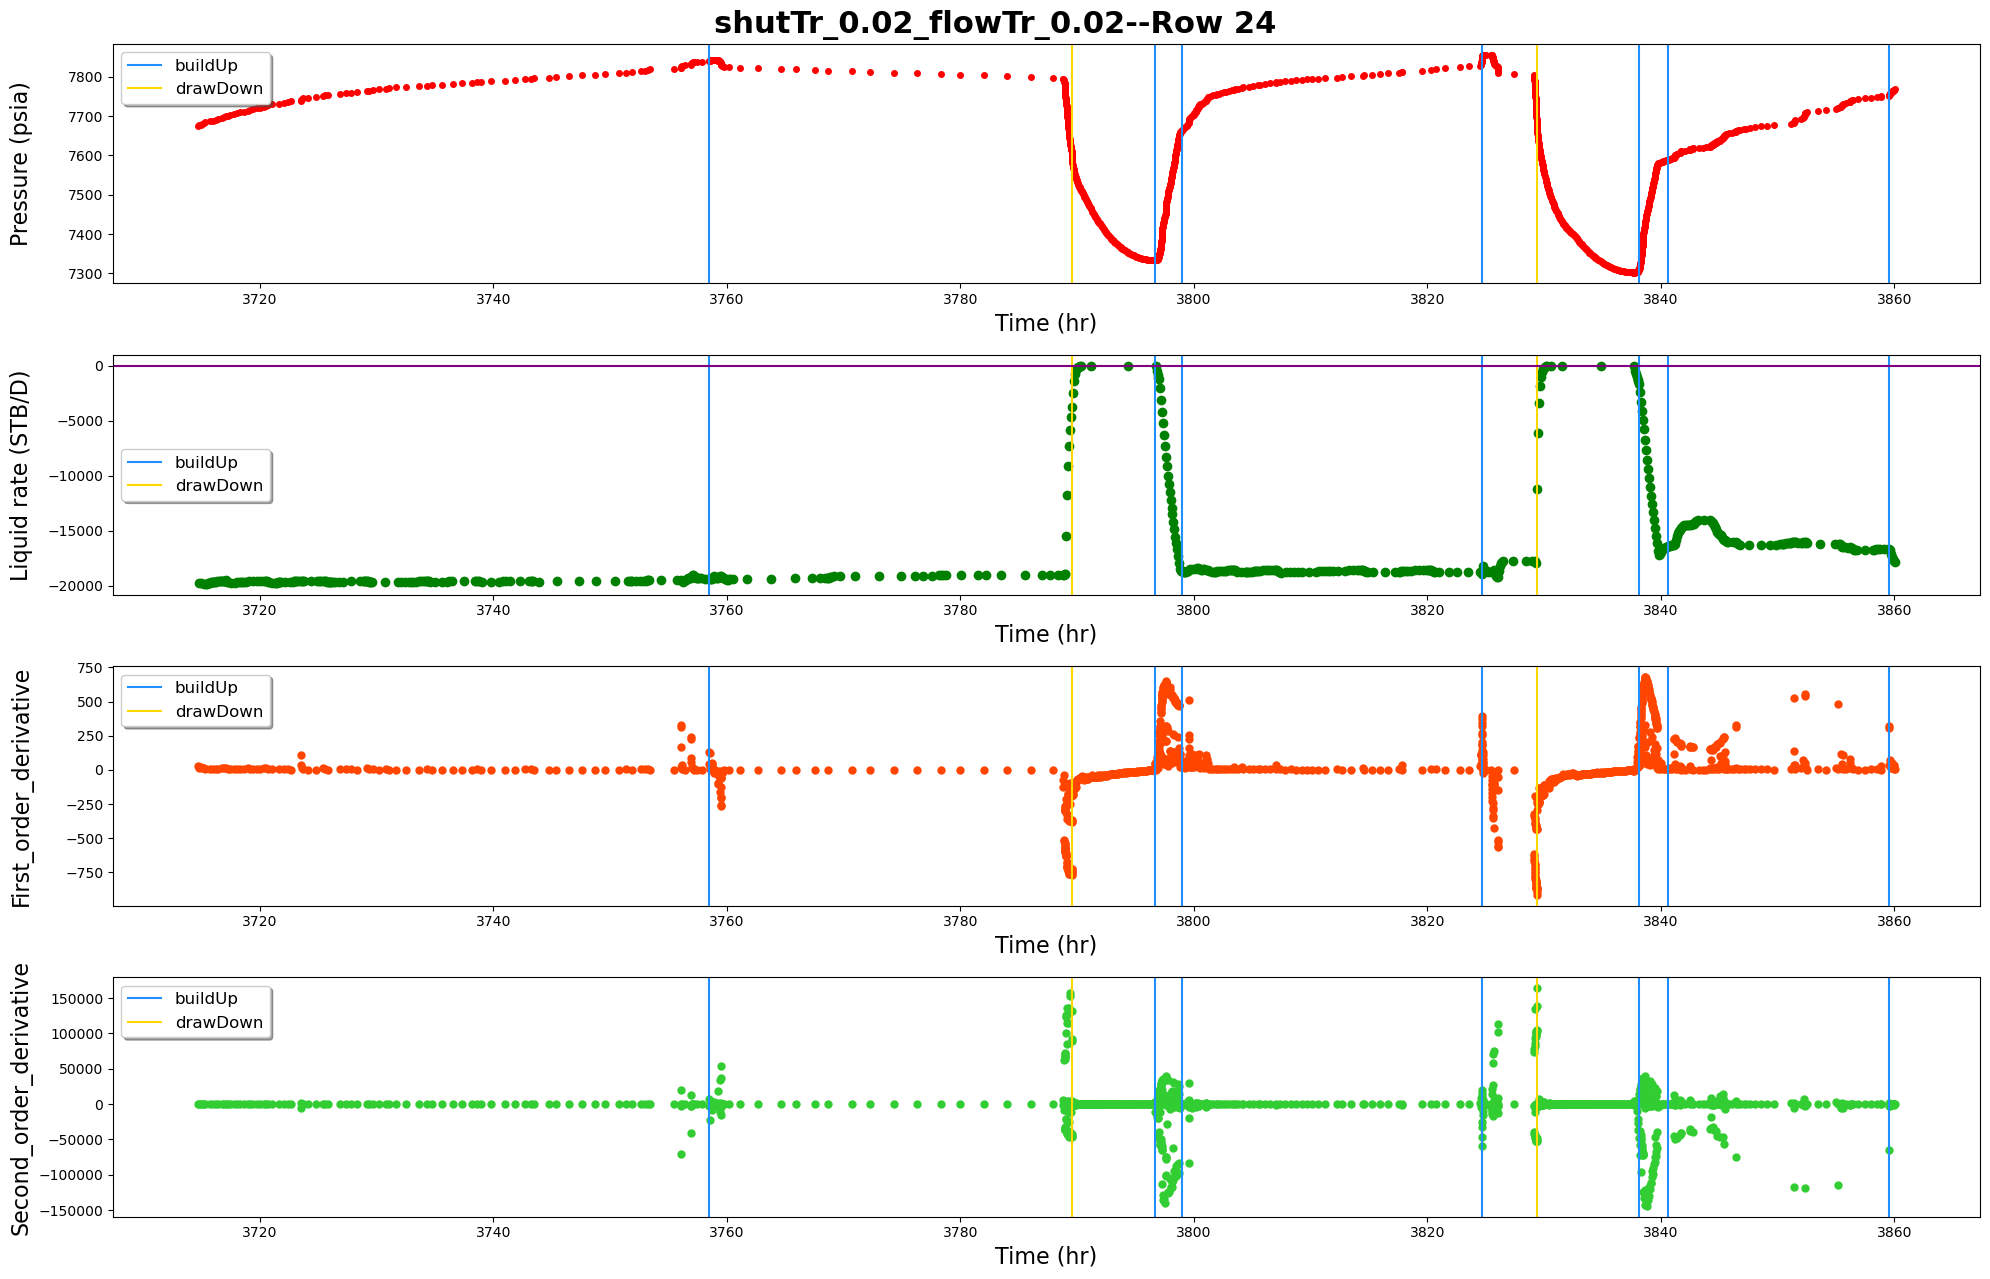

------row 25-----detected points:[28892, 29110, 29213, 29297, 29355, 29476]


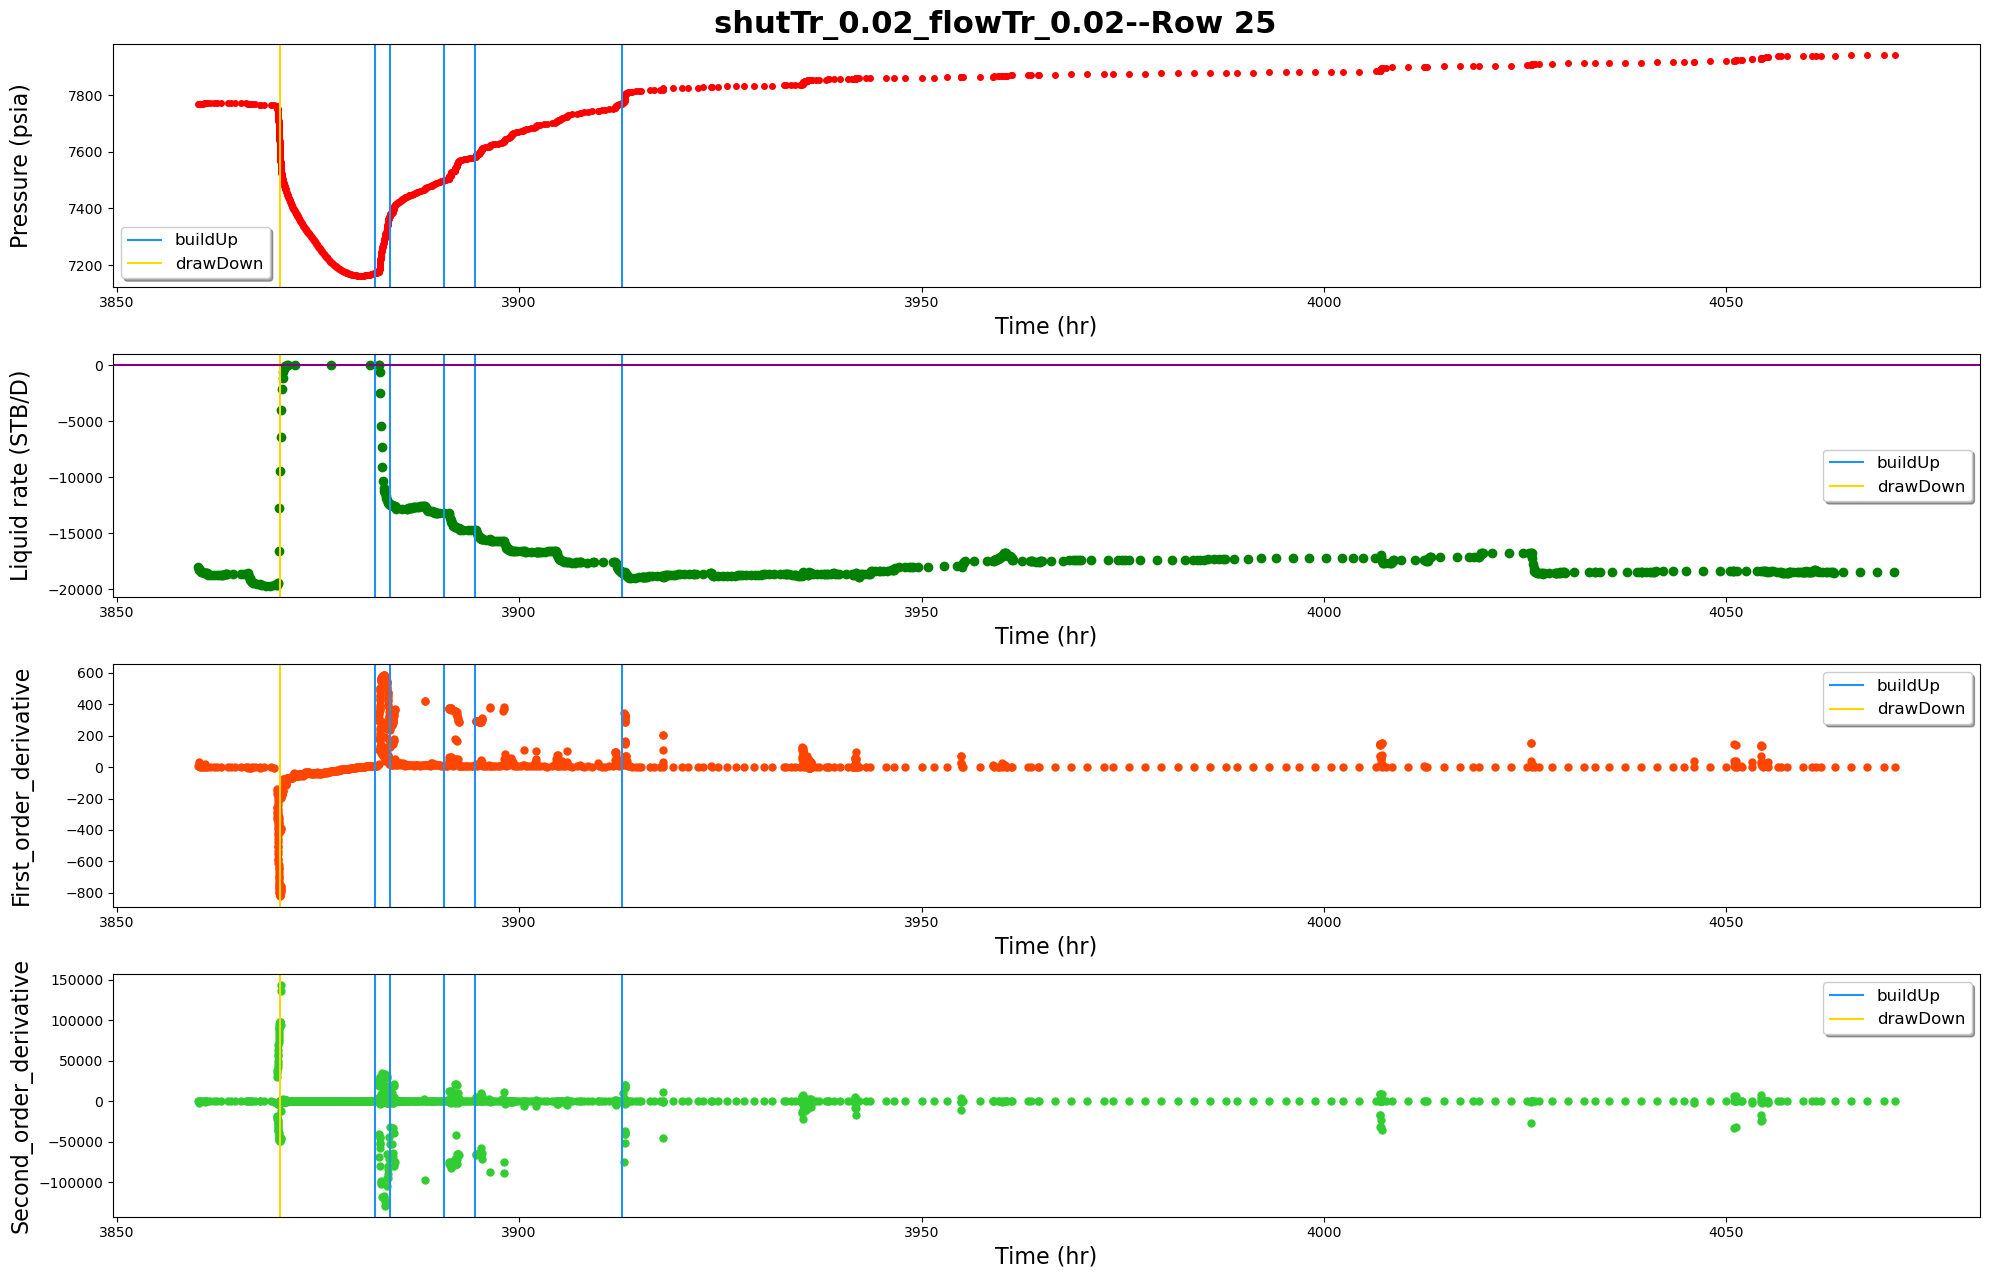

In [22]:
points_type="allPoints"
# points_type="majorTransients"
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=False
folder_name=f"{method}/{points_type}/timeStep_{time_step}"
%run plot_N_save.ipynb